# **Advanced Regression Assignment - Surprise Housing**

## **Problem Statement**
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


## **Business Goal:**

We are required to model the price of dfs with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing useful Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")



## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



## **Reading and Understanding the Data**

In [2]:
## Read the csv file
df = pd.read_csv('train.csv')

## View the first five rows
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
#Find the number of rows and columns
df.shape

(1460, 81)

In [4]:
# Check the data type descriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#summary of numerical columns in the dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

#### **Dataset Findings**
- There are **1460 rows** and **81 columns** in the dataset , which contains 80 independent and 1 dependent variables.
- There are columns of 3 datatypes - int64, float64 and object. 
- **There are some columns with Null values present**

### **Dataset Quality Checks and Cleaning**

#### NULL Percent Check

In [6]:
#finding out the total null values and  null percentage in each column 
def columns_with_null_value_percent(df):
    total = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total_null'])
    percentage = pd.DataFrame(round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending=False)\
                              ,columns=['Null_Percentage'])
    null_percent = pd.concat([total, percentage], axis = 1)
    return null_percent
columns_with_null_value_percent(df)

Total_null  Null_Percentage
PoolQC               1453            99.52
MiscFeature          1406            96.30
Alley                1369            93.77
Fence                1179            80.75
MasVnrType            872            59.73
FireplaceQu           690            47.26
LotFrontage           259            17.74
GarageYrBlt            81             5.55
GarageCond             81             5.55
GarageType             81             5.55
GarageFinish           81             5.55
GarageQual             81             5.55
BsmtFinType2           38             2.60
BsmtExposure           38             2.60
BsmtQual               37             2.53
BsmtCond               37             2.53
BsmtFinType1           37             2.53
MasVnrArea              8             0.55
Electrical              1             0.07
Id                      0             0.00
Functional              0             0.00
Fireplaces              0             0.00
KitchenQual             0             0.00
KitchenAbvGr            0             0.00
BedroomAbvGr            0             0.00
HalfBath                0             0.00
FullBath                0             0.00
BsmtHalfBath            0             0.00
TotRmsAbvGrd            0             0.00
GarageCars              0             0.00
GrLivArea               0             0.00
GarageArea              0             0.00
PavedDrive              0             0.00
WoodDeckSF              0             0.00
OpenPorchSF             0             0.00
EnclosedPorch           0             0.00
3SsnPorch               0             0.00
ScreenPorch             0             0.00
PoolArea                0             0.00
MiscVal                 0             0.00
MoSold                  0             0.00
YrSold                  0             0.00
SaleType                0             0.00
SaleCondition           0             0.00
BsmtFullBath            0             0.00
HeatingQC               0             0.00
LowQualFinSF            0             0.00
LandSlope               0             0.00
OverallQual             0             0.00
HouseStyle              0             0.00
BldgType                0             0.00
Condition2              0             0.00
Condition1              0             0.00
Neighborhood            0             0.00
LotConfig               0             0.00
YearBuilt               0             0.00
Utilities               0             0.00
LandContour             0             0.00
LotShape                0             0.00
Street                  0             0.00
LotArea                 0             0.00
MSZoning                0             0.00
OverallCond             0             0.00
YearRemodAdd            0             0.00
2ndFlrSF                0             0.00
BsmtFinSF2              0             0.00
1stFlrSF                0             0.00
CentralAir              0             0.00
MSSubClass              0             0.00
Heating                 0             0.00
TotalBsmtSF             0             0.00
BsmtUnfSF               0             0.00
BsmtFinSF1              0             0.00
RoofStyle               0             0.00
Foundation              0             0.00
ExterCond               0             0.00
ExterQual               0             0.00
Exterior2nd             0             0.00
Exterior1st             0             0.00
RoofMatl                0             0.00
SalePrice               0             0.00

#### Observation: 
There are total 19 columns in which NA values are present. Lets impute the values in them based on Data Dictionary 

The following categorical columns have one level NA 
   - Alley : NA = No alley access
   - BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement
   - FireplaceQu : NA = No Fireplace
   - GarageType, GarageFinish, GarageQual, GarageCond : NA = No Garage
   - PoolQC : NA = No Pool
   - Fence : NA = No Fence
   - MiscFeature : NA = None

Columns BsmtFinType2 and BsmtExposure conveys 38 properties does not have basement while columns BsmtFinType1, BsmtCond, BsmtQual states that 37 properties does not have basement. So certainly one or two housing property has anomalous data , need to check them 

#### **Null Value Impute**

In [7]:
# NA in Alley column means No Alley, so we will replace NA by it.
df['Alley'].fillna('No Alley', inplace=True)

# NA in PoolQC column means No Pool, so we will replace NA by it.
df['PoolQC'].fillna('No Pool', inplace=True)

#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
df['FireplaceQu'].fillna('No Fireplace', inplace=True)

#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

df['GarageType'].fillna('No Garage', inplace=True) 
df['GarageFinish'].fillna('No Garage', inplace=True) 
df['GarageQual'].fillna('No Garage', inplace=True) 
df['GarageCond'].fillna('No Garage', inplace=True) 

#NA in Fence column means No Fence, so we will replace NA by it.
df['Fence'].fillna('No Fence', inplace=True) 


#NA in MiscFeature column means None, so we will replace NA by it.
df['MiscFeature'].fillna('None', inplace=True) 

#NA in MasVnrType column means No masonry veneer type, so we will replace NA by it.
df['MasVnrType'].fillna('None', inplace=True) 


#NA in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 columns mean No Basement, so we will replace NA by it.

df['BsmtQual'].fillna('No Basement', inplace=True) 
df['BsmtCond'].fillna('No Basement', inplace=True) 
df['BsmtExposure'].fillna('No Basement', inplace=True) 
df['BsmtFinType1'].fillna('No Basement', inplace=True) 
df['BsmtFinType2'].fillna('No Basement', inplace=True) 



In [8]:
## Basement Data Check 

print(df[(df.BsmtFinType2=='No Basement') & (df.BsmtExposure=='No Basement')].shape)
print(df[(df.BsmtFinType2=='No Basement')].shape)
print(df[(df.BsmtExposure=='No Basement')].shape)
print(df[(df.BsmtFinType1=='No Basement') & (df.BsmtCond=='No Basement') & (df.BsmtQual=='No Basement')].shape)

(37, 81)
(38, 81)
(38, 81)
(37, 81)


#### Observation :
 - We can observe two different corrupt rows in BsmtFinType2 & BsmtExposure. Dropping them.


In [9]:
basement_1=df[(df.BsmtFinType2=='No Basement')]
basement_2=df[(df.BsmtFinType1=='No Basement') & (df.BsmtCond=='No Basement') & (df.BsmtQual=='No Basement')]
basement_1[~basement_1.isin(basement_2)].dropna()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
332  333.0        20.0       RL         85.0  10655.0   Pave  No Alley   

    LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
332      IR1         Lvl    AllPub    Inside       Gtl      NridgHt   

    Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
332       Norm       Norm     1Fam     1Story          8.0          5.0   

     YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
332     2003.0        2004.0     Gable  CompShg     VinylSd     VinylSd   

    MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
332    BrkFace       296.0        Gd        TA      PConc       Gd       TA   

    BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
332           No          GLQ      1124.0  No Basement       479.0     1603.0   

     TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
332       3206.0    GasA        Ex          Y      SBrkr    1629.0       0.0   

     LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
332           0.0     1629.0           1.0           0.0       2.0       0.0   

     BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
332           3.0           1.0          Gd           7.0        Typ   

     Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
332         1.0          Gd     Attchd       2003.0          RFn         3.0   

     GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
332       880.0         TA         TA          Y         0.0          0.0   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PoolQC     Fence  \
332            0.0        0.0          0.0       0.0  No Pool  No Fence   

    MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
332        None      0.0    10.0  2009.0       WD        Normal   284000.0

In [10]:
basement_1=df[(df.BsmtExposure=='No Basement')]
basement_2=df[(df.BsmtFinType1=='No Basement') & (df.BsmtCond=='No Basement') & (df.BsmtQual=='No Basement')]
basement_1[~basement_1.isin(basement_2)].dropna()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
948  949.0        60.0       RL         65.0  14006.0   Pave  No Alley   

    LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
948      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   

    Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
948       Norm       Norm     1Fam     2Story          7.0          5.0   

     YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
948     2002.0        2002.0     Gable  CompShg     VinylSd     VinylSd   

    MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
948    BrkFace       144.0        Gd        TA      PConc       Gd       TA   

    BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
948  No Basement          Unf         0.0          Unf         0.0      936.0   

     TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
948        936.0    GasA        Ex          Y      SBrkr     936.0     840.0   

     LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
948           0.0     1776.0           0.0           0.0       2.0       1.0   

     BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
948           3.0           1.0          Gd           7.0        Typ   

     Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
948         1.0          TA     Attchd       2002.0          RFn         2.0   

     GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
948       474.0         TA         TA          Y       144.0         96.0   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PoolQC     Fence  \
948            0.0        0.0          0.0       0.0  No Pool  No Fence   

    MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
948        None      0.0     2.0  2006.0       WD        Normal   192500.0

In [11]:
# From above we notice that rows with Id as 333.0 & 949.0 has erroneous basement related data. So we can drop these rows.
df=df[(df.Id!=333.0) & (df.Id!=949.0)]

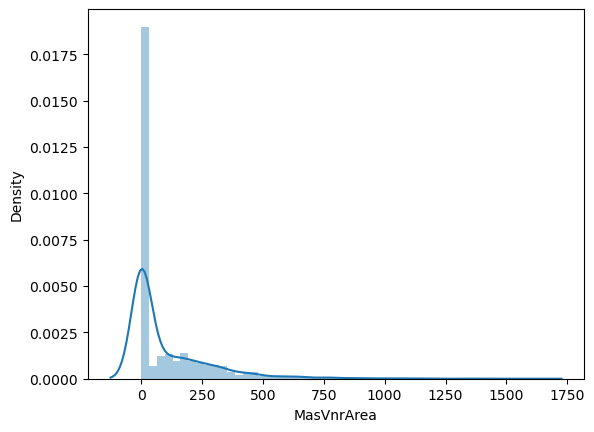

In [12]:
## MasVnrArea This column says masonry veneer area in square feet. There are 8 rows with Null value and Datatype is float
#check distribution plot
sns.distplot(df.MasVnrArea)
plt.show()

In [13]:
## Since the data seems Skewed lets replace the missing value with Median 
df['MasVnrArea'].fillna(df.MasVnrArea.median(), inplace=True)


In [14]:
# Electrical conveys electrical system that the properties have , only 1 value is missing so lets use mode to impute it 
df['Electrical'].fillna(df.Electrical.mode()[0], inplace=True)

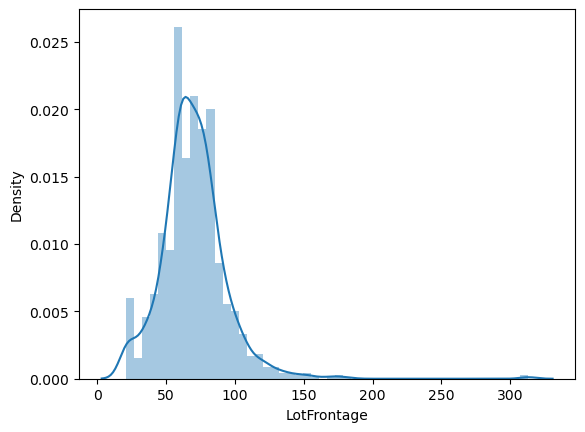

In [15]:
## LotFrontage This column conveys the linear feet of street connected to property, has 259 NA values.

sns.distplot(df.LotFrontage)
plt.show()

In [16]:
## From above we see a lot outliers and hence its right skewed , so imputing missing values with median as datatype is float 

df['LotFrontage'].fillna(df.LotFrontage.median(), inplace=True)

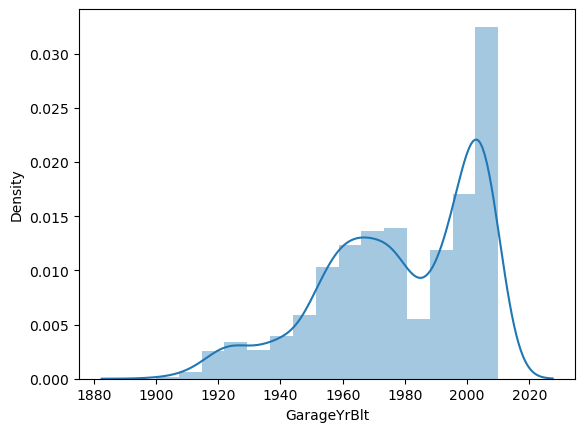

In [17]:
#check the data distribution of 'GarageYrBlt' column
sns.distplot(df.GarageYrBlt)
plt.show()

#### Observation
From above we see that there are 81 NA values and imputation with mean or median (column being numeric) does not seem a viable option here as the data distribution of this column is not normal. It has two different peaks as depicted above. Imputation with some value might create garbage data.  Hence the safest option would be to get derived variable out of this column.

Lets use below derieved logic for GarageYrBlt column:
- 0: NA
- 1: GarageYrBlt<2000 
- 2: GarageYrBlt>=2000

In [18]:
#function to get the derived metric for the GarageYrBlt column:
def derieve_metric_garage_yr_built(x):
    if x<2000:
        return 1
    if x>=2000:
        return 2
    if str(x)=='nan':
        return 0

df['GarageYrBlt']=df['GarageYrBlt'].apply(derieve_metric_garage_yr_built)

In [19]:
df.GarageYrBlt.value_counts()

GarageYrBlt
1    977
2    400
0     81
Name: count, dtype: int64

In [20]:
# Verifying the Null Values after null treatment 
columns_with_null_value_percent(df)

Total_null  Null_Percentage
Id                      0              0.0
CentralAir              0              0.0
GarageYrBlt             0              0.0
GarageType              0              0.0
FireplaceQu             0              0.0
Fireplaces              0              0.0
Functional              0              0.0
TotRmsAbvGrd            0              0.0
KitchenQual             0              0.0
KitchenAbvGr            0              0.0
BedroomAbvGr            0              0.0
HalfBath                0              0.0
FullBath                0              0.0
BsmtHalfBath            0              0.0
BsmtFullBath            0              0.0
GrLivArea               0              0.0
LowQualFinSF            0              0.0
2ndFlrSF                0              0.0
1stFlrSF                0              0.0
GarageFinish            0              0.0
GarageCars              0              0.0
GarageArea              0              0.0
PoolQC                  0              0.0
SaleCondition           0              0.0
SaleType                0              0.0
YrSold                  0              0.0
MoSold                  0              0.0
MiscVal                 0              0.0
MiscFeature             0              0.0
Fence                   0              0.0
PoolArea                0              0.0
GarageQual              0              0.0
ScreenPorch             0              0.0
3SsnPorch               0              0.0
EnclosedPorch           0              0.0
OpenPorchSF             0              0.0
WoodDeckSF              0              0.0
PavedDrive              0              0.0
GarageCond              0              0.0
Electrical              0              0.0
HeatingQC               0              0.0
MSSubClass              0              0.0
Heating                 0              0.0
OverallCond             0              0.0
OverallQual             0              0.0
HouseStyle              0              0.0
BldgType                0              0.0
Condition2              0              0.0
Condition1              0              0.0
Neighborhood            0              0.0
LandSlope               0              0.0
LotConfig               0              0.0
Utilities               0              0.0
LandContour             0              0.0
LotShape                0              0.0
Alley                   0              0.0
Street                  0              0.0
LotArea                 0              0.0
LotFrontage             0              0.0
MSZoning                0              0.0
YearBuilt               0              0.0
YearRemodAdd            0              0.0
RoofStyle               0              0.0
BsmtCond                0              0.0
TotalBsmtSF             0              0.0
BsmtUnfSF               0              0.0
BsmtFinSF2              0              0.0
BsmtFinType2            0              0.0
BsmtFinSF1              0              0.0
BsmtFinType1            0              0.0
BsmtExposure            0              0.0
BsmtQual                0              0.0
RoofMatl                0              0.0
Foundation              0              0.0
ExterCond               0              0.0
ExterQual               0              0.0
MasVnrArea              0              0.0
MasVnrType              0              0.0
Exterior2nd             0              0.0
Exterior1st             0              0.0
SalePrice               0              0.0

#### YearBuilt, YrSold & YearRemodAdd data quality checks
YearBuilt should be less than YrSold, YearBuilt should be less than YearRemodAdd & YearRemodAdd should be less than YrSold


In [21]:

print((df.YearBuilt>df.YrSold).sum())
print((df.YearRemodAdd<df.YearBuilt).sum())
print((df.YearRemodAdd>df.YrSold).sum())

0
0
1


YearRemodAdd more than YrSold, which seems to be an anomaly as all the properties have been sold after construction and/or remodelling. 

In [22]:
#check the anamalous row
print(df[df.YearRemodAdd>df.YrSold].YearRemodAdd)
print(df[df.YearRemodAdd>df.YrSold].YrSold)

523    2008
Name: YearRemodAdd, dtype: int64
523    2007
Name: YrSold, dtype: int64


In [23]:
#drop the anamalous row
df=df[df.YearRemodAdd<=df.YrSold]

#### **Feature Engineering**

In [24]:
##### Derive df Age based on YrSold and YearBuilt and set its name as house_age1.

df['house_age1']=df.YrSold-df.YearBuilt

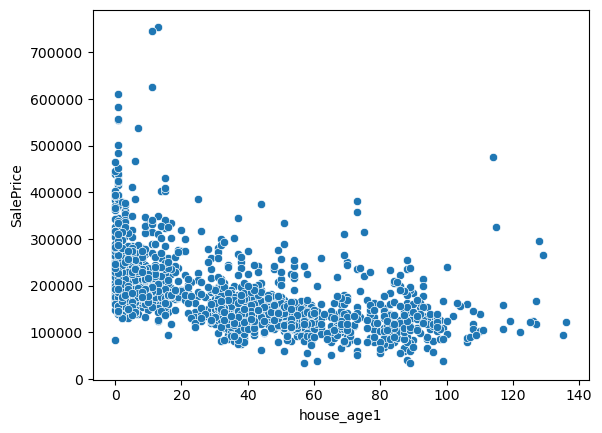

In [25]:
# relation of house_age1 with SalePrice via a scatter plot
sns.scatterplot(x=df.house_age1,y=df.SalePrice)
plt.show()

#### Observation :
- A declining pattern in saleprice vs house_age1 plot.

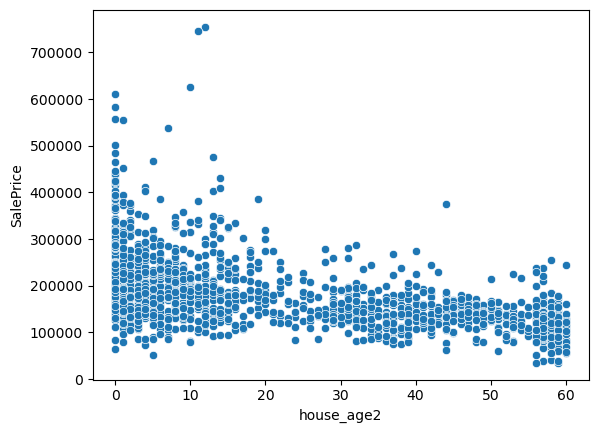

In [26]:
##### Derive df Age based on YrSold and YearRemodAdd and set its name as house_age2.

df['house_age2']=df.YrSold-df.YearRemodAdd
sns.scatterplot(x=df.house_age2,y=df.SalePrice)
plt.show()

##### Observation :

- house_age2 has stronger negative relation with SalePrice as compared to house_age1 column,  house_age2 will be used for model building. We can now drop YearBuilt, YearRemodAdd, YrSold & house_age1 columns

In [27]:
df.drop(['YearBuilt', 'YearRemodAdd','house_age1','YrSold'], axis=1,inplace=True)

In [28]:
#check for columns with more that 85% same values
cols=df.select_dtypes(['int64','float64','object']).columns
skewed_cols={}
for col in cols:
    if max(list(df[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))>=0.85:
        skewed_cols[col]=round(max(list(df[col].value_counts(normalize=True).sort_values(ascending=False).head(1))),2)
pd.DataFrame({'Features':list(skewed_cols.keys()),'Percentage':list(skewed_cols.values())}).sort_values(by='Percentage',ascending=False)


Features  Percentage
0          Street        1.00
26         PoolQC        1.00
3       Utilities        1.00
25       PoolArea        1.00
6      Condition2        0.99
12        Heating        0.98
23      3SsnPorch        0.98
15   LowQualFinSF        0.98
7        RoofMatl        0.98
28        MiscVal        0.96
27    MiscFeature        0.96
4       LandSlope        0.95
17   KitchenAbvGr        0.95
16   BsmtHalfBath        0.94
1           Alley        0.94
18     Functional        0.93
13     CentralAir        0.93
21     PavedDrive        0.92
24    ScreenPorch        0.92
20     GarageCond        0.91
14     Electrical        0.91
9        BsmtCond        0.90
2     LandContour        0.90
19     GarageQual        0.90
11     BsmtFinSF2        0.89
8       ExterCond        0.88
29       SaleType        0.87
5      Condition1        0.86
22  EnclosedPorch        0.86
10   BsmtFinType2        0.86

#### Observation:
The above dataframe shows the features and the corresponding percentage of only one value. Lets drop these predictors since it would not add any value in our model, being highly skewed.

In [29]:
df.drop(list(skewed_cols.keys()),axis=1,inplace=True)

In [30]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr     1Fam     2Story            7            5     Gable   
1      Veenker     1Fam     1Story            6            8     Gable   
2      CollgCr     1Fam     2Story            7            5     Gable   
3      Crawfor     1Fam     2Story            7            5     Gable   
4      NoRidge     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       Gd           No          GLQ         706        150          856   
1       Gd           Gd          ALQ         978        284         1262   
2       Gd           Mn          GLQ         486        434          920   
3       TA           No          ALQ         216        540          756   
4       Gd           Av          GLQ         655        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        Ex       856       854       1710             1         2         1   
1        Ex      1262         0       1262             0         2         0   
2        Ex       920       866       1786             1         2         1   
3        Gd       961       756       1717             1         1         0   
4        Ex      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces   FireplaceQu  \
0             3          Gd             8           0  No Fireplace   
1             3          TA             6           1            TA   
2             3          Gd             6           1            TA   
3             3          Gd             7           1            Gd   
4             4          Gd             9           1            TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  \
0     Attchd            2          RFn           2         548           0   
1     Attchd            1          RFn           2         460         298   
2     Attchd            2          RFn           2         608           0   
3     Detchd            1          Unf           3         642           0   
4     Attchd            2          RFn           3         836         192   

   OpenPorchSF     Fence  MoSold SaleCondition  SalePrice  house_age2  
0           61  No Fence       2        Normal     208500           5  
1            0  No Fence       5        Normal     181500          31  
2           42  No Fence       9        Normal     223500           6  
3           35  No Fence       2       Abnorml     140000          36  
4           84  No Fence      12        Normal     250000           8

In [31]:
df.shape

(1457, 49)

In [32]:
num_col = df.dtypes[df.dtypes != "object"].index
cat_col = df.dtypes[df.dtypes == "object"].index

In [33]:
outliers_percentage={}

for feature in num_col:
    IQR=df[feature].quantile(.75)-df[feature].quantile(.25)
    outliers_count=df[(df[feature]>(df[feature].quantile(.75)+1.5*IQR)) | (df[feature]<(df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

Features  Percentage
5    OverallCond        8.58
2    LotFrontage        7.21
1     MSSubClass        7.07
6     MasVnrArea        6.66
23   OpenPorchSF        5.22
3        LotArea        4.60
25     SalePrice        4.19
9    TotalBsmtSF        4.05
16  BedroomAbvGr        2.40
22    WoodDeckSF        2.20
12     GrLivArea        2.06
17  TotRmsAbvGrd        1.99
8      BsmtUnfSF        1.99
21    GarageArea        1.44
10      1stFlrSF        1.30
7     BsmtFinSF1        0.41
18    Fireplaces        0.34
20    GarageCars        0.34
11      2ndFlrSF        0.14
4    OverallQual        0.14
13  BsmtFullBath        0.07
24        MoSold        0.00
0             Id        0.00
19   GarageYrBlt        0.00
15      HalfBath        0.00
14      FullBath        0.00
26    house_age2        0.00

#### Observation : 
 - Majority of the numeric features have outliers
 - Dropping all the outliers will cause loss of information.
 - Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
 - IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.

### **EDA on the dataset**

#### **Data Visualization**

##### **Univariate Analysis on Numeric Columns**

In [34]:
# Function for Plotting the count plots for numerical features 
def plot_histograms_min_max(df, columns):
    plt.figure(figsize=(25,50))
    for m,column in enumerate(columns):
        min_val = df[column].min()
        max_val = df[column].max()
        plt.subplot(9,4,(m+1))
        plt.tight_layout(h_pad=3,w_pad=3)
        sns.histplot(df[column], kde=True, stat='density')
        plt.title(f'Histogram for {column} (Min: {round(min_val,2)}, Max: {round(max_val,2)})',fontsize=14)
        plt.xlabel(column,fontsize=14)
        plt.ylabel('Frequency',fontsize=14)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlim(min_val, max_val)  # Limit x-axis to min and max values
    plt.show()


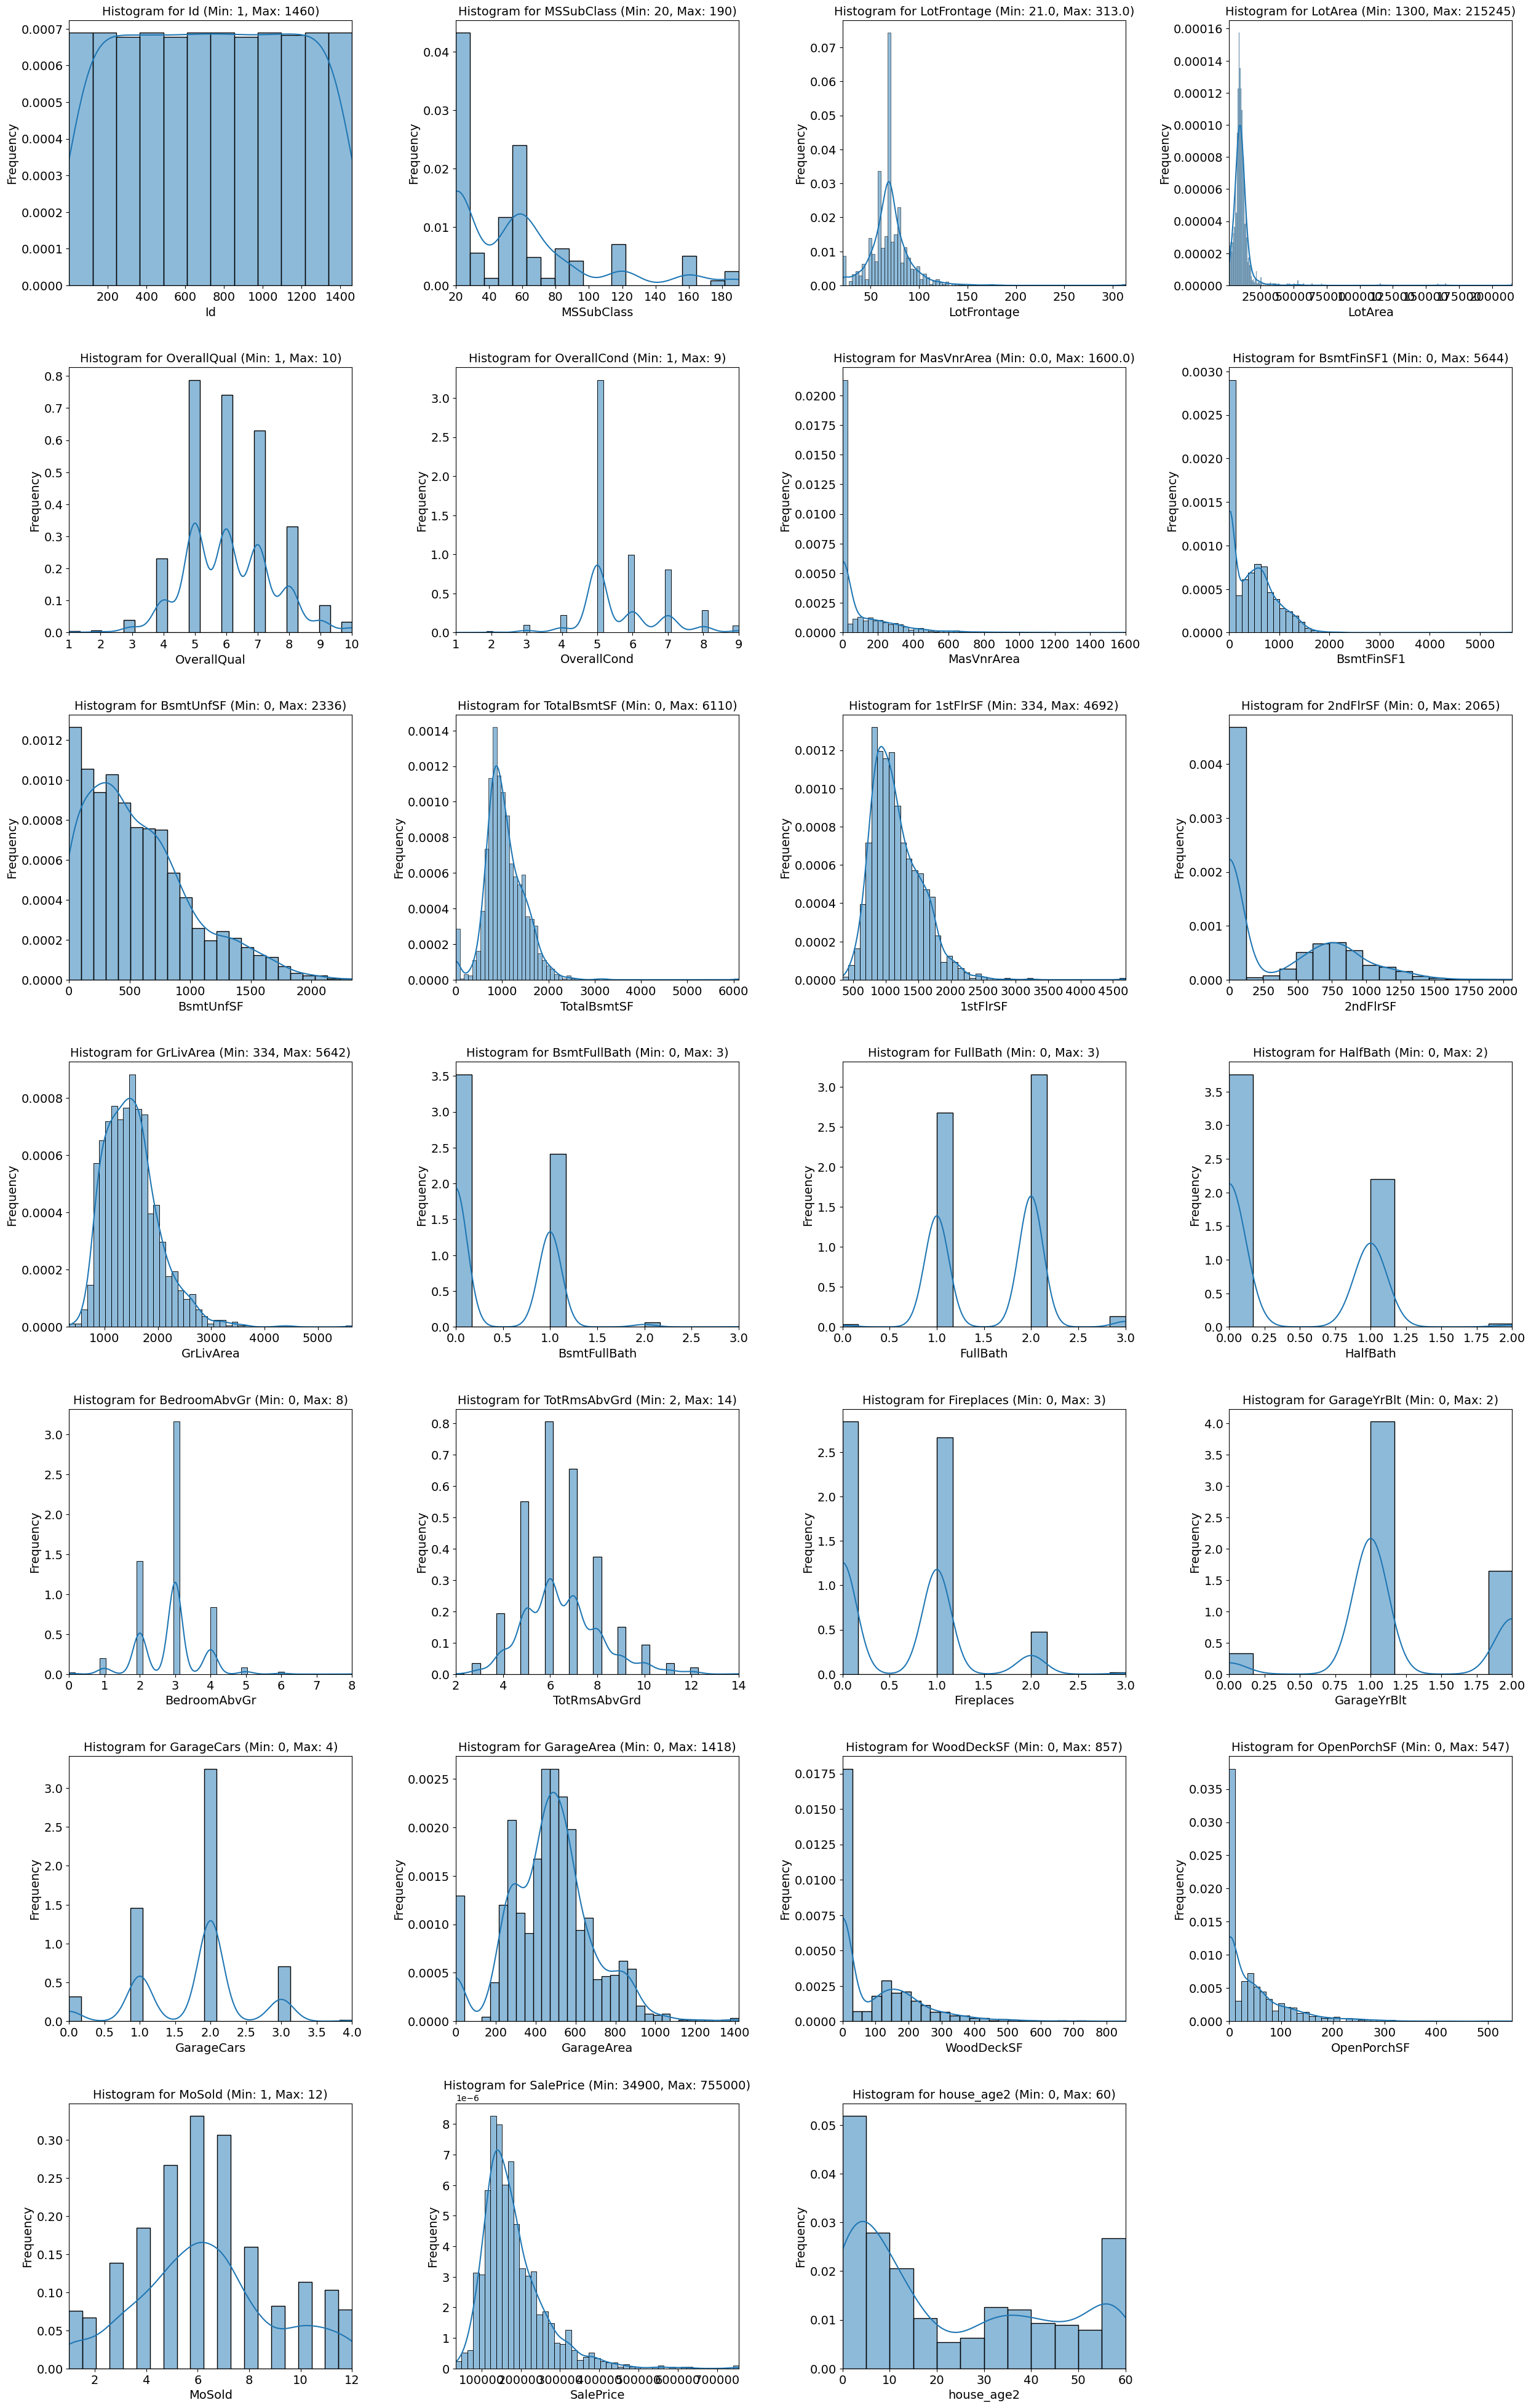

In [35]:
plot_histograms_min_max(df,num_col)

#### Observation:
- Many of the numerical columns are having non-normal distribution.
- Some Features have only one value

In [36]:
# Function for Plotting the Box plots for numerical features 
def plot_boxplot(df, columns):
    plt.figure(figsize=(25,50))
    palette = sns.color_palette("husl", len(columns))
    for m,column in enumerate(columns):
        plt.subplot(9,4,(m+1))
        plt.tight_layout(h_pad=3,w_pad=3)
        sns.boxplot(x=df[column],color=palette[m])
        plt.title(f'Box Plot for {column}',fontsize=14)
        plt.xlabel(column,fontsize=14)
    plt.show()

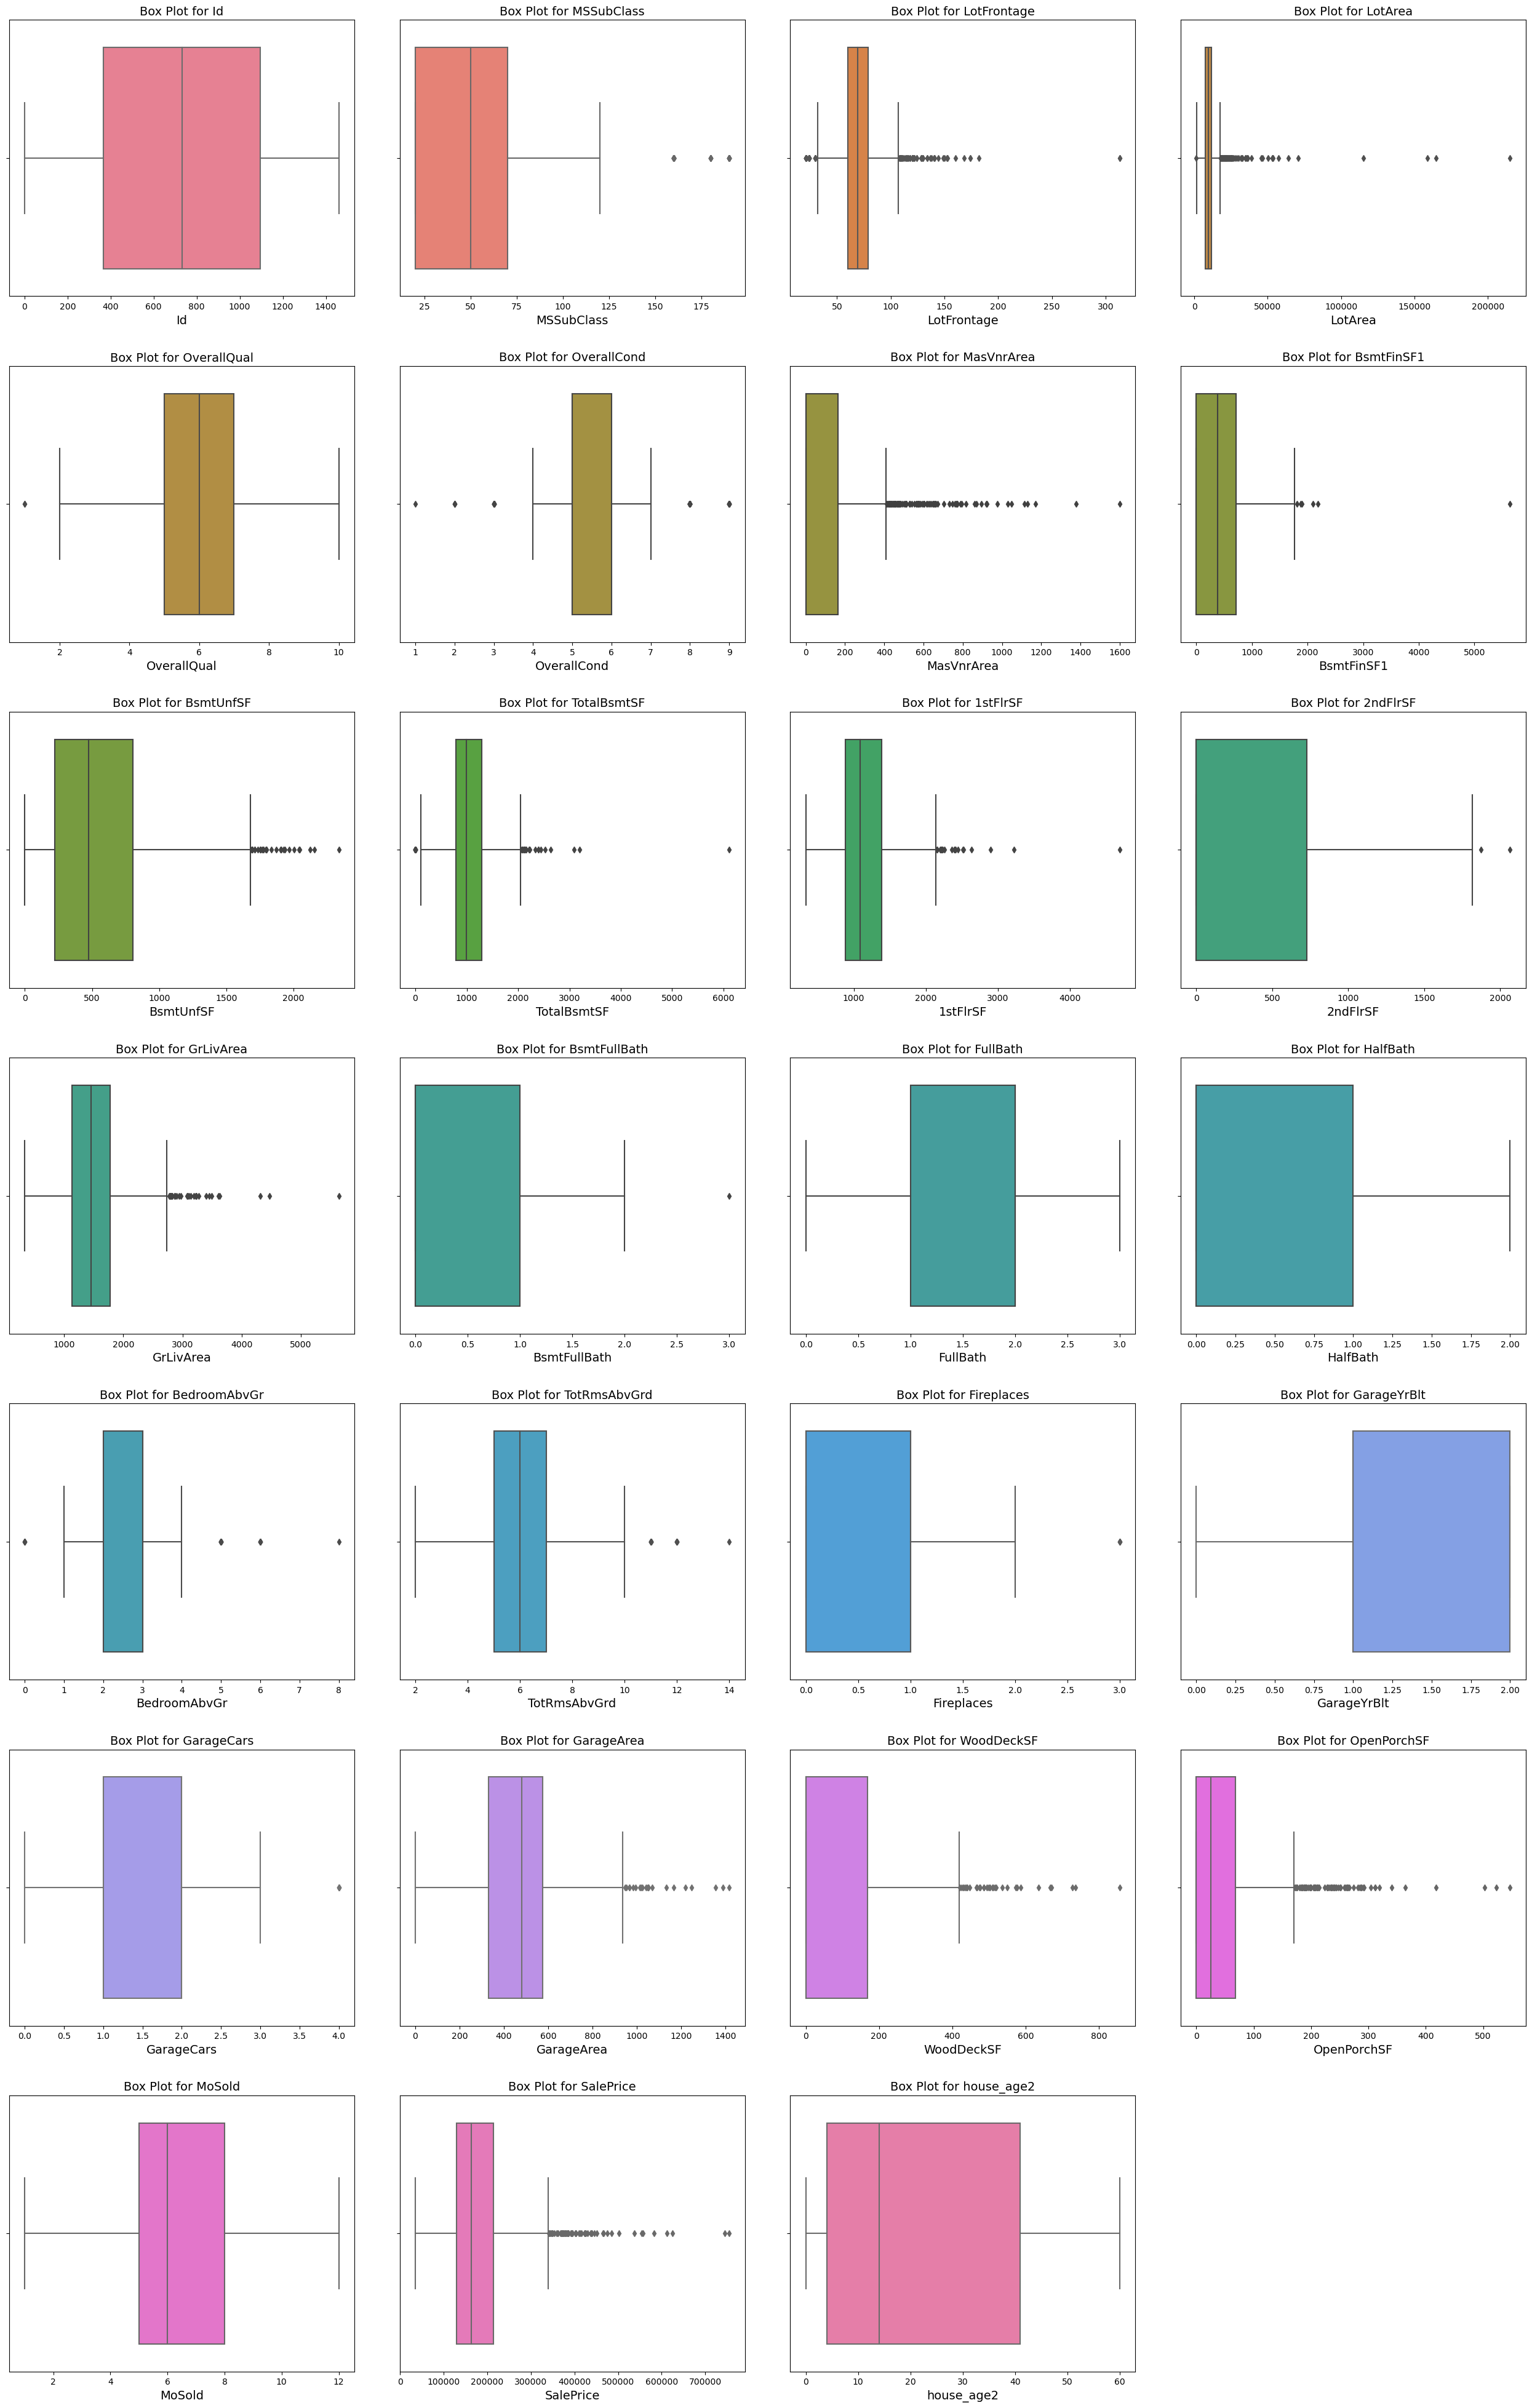

In [37]:
plot_boxplot(df,num_col)

#### Observation :
- Most of the columns have outliers. So, we will require to do Outlier treatment.

##### **Univariate Analysis on Catagorical Columns**

In [38]:
# Function for Plotting the Count plots for Catagorical features 
def plot_count_cat(df, columns):
    plt.figure(figsize=(25,50))
    palette = sns.color_palette("husl", len(columns))
    for m,column in enumerate(columns):
        plt.subplot(11,4,(m+1))
        plt.tight_layout(h_pad=3,w_pad=3)
        sns.countplot(x=column, data=df, palette='husl',order=df[column].value_counts().index)
        plt.xticks(rotation=90) 
        plt.title(f'Count Plot for {column}',fontsize=14)
        plt.xlabel(column,fontsize=14)
        plt.ylabel("Count",fontsize=14)
    plt.show()

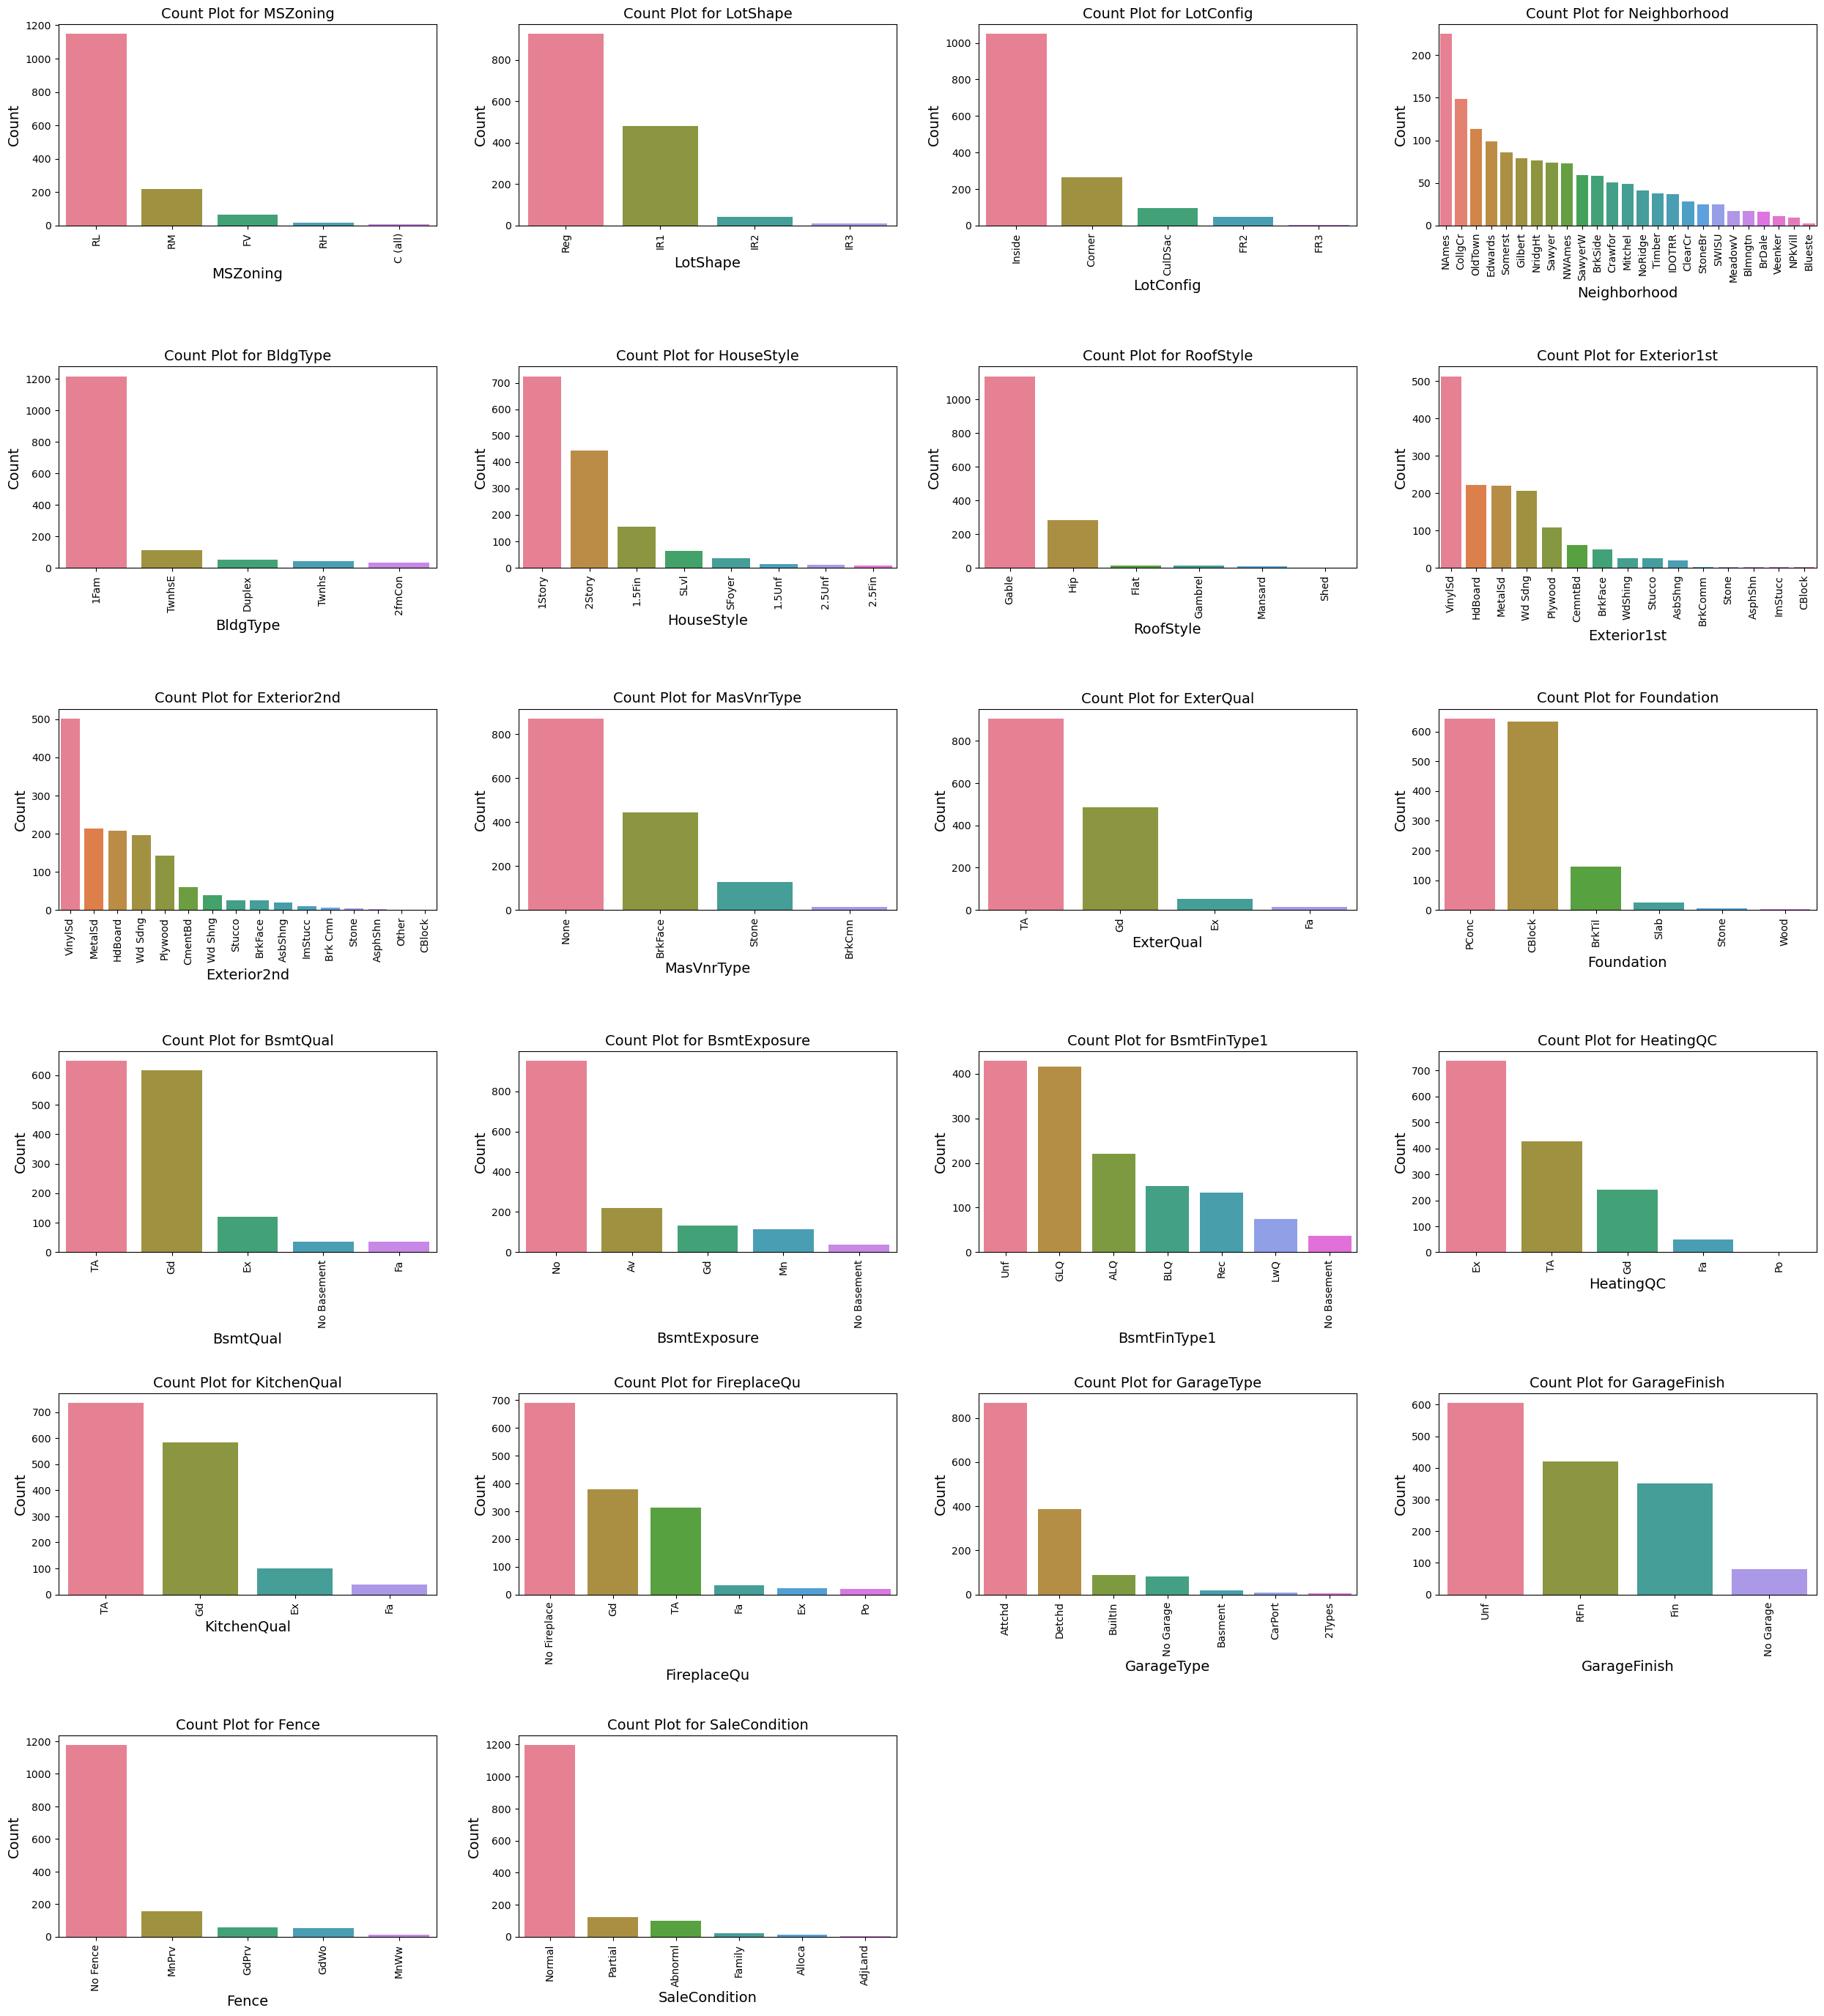

In [39]:
plot_count_cat(df,cat_col)

#### Observation:
- From above value counts and bar plots that there is no column with single unique value that we could remove.

#### **Bivariate Analysis On Numeric Columns**

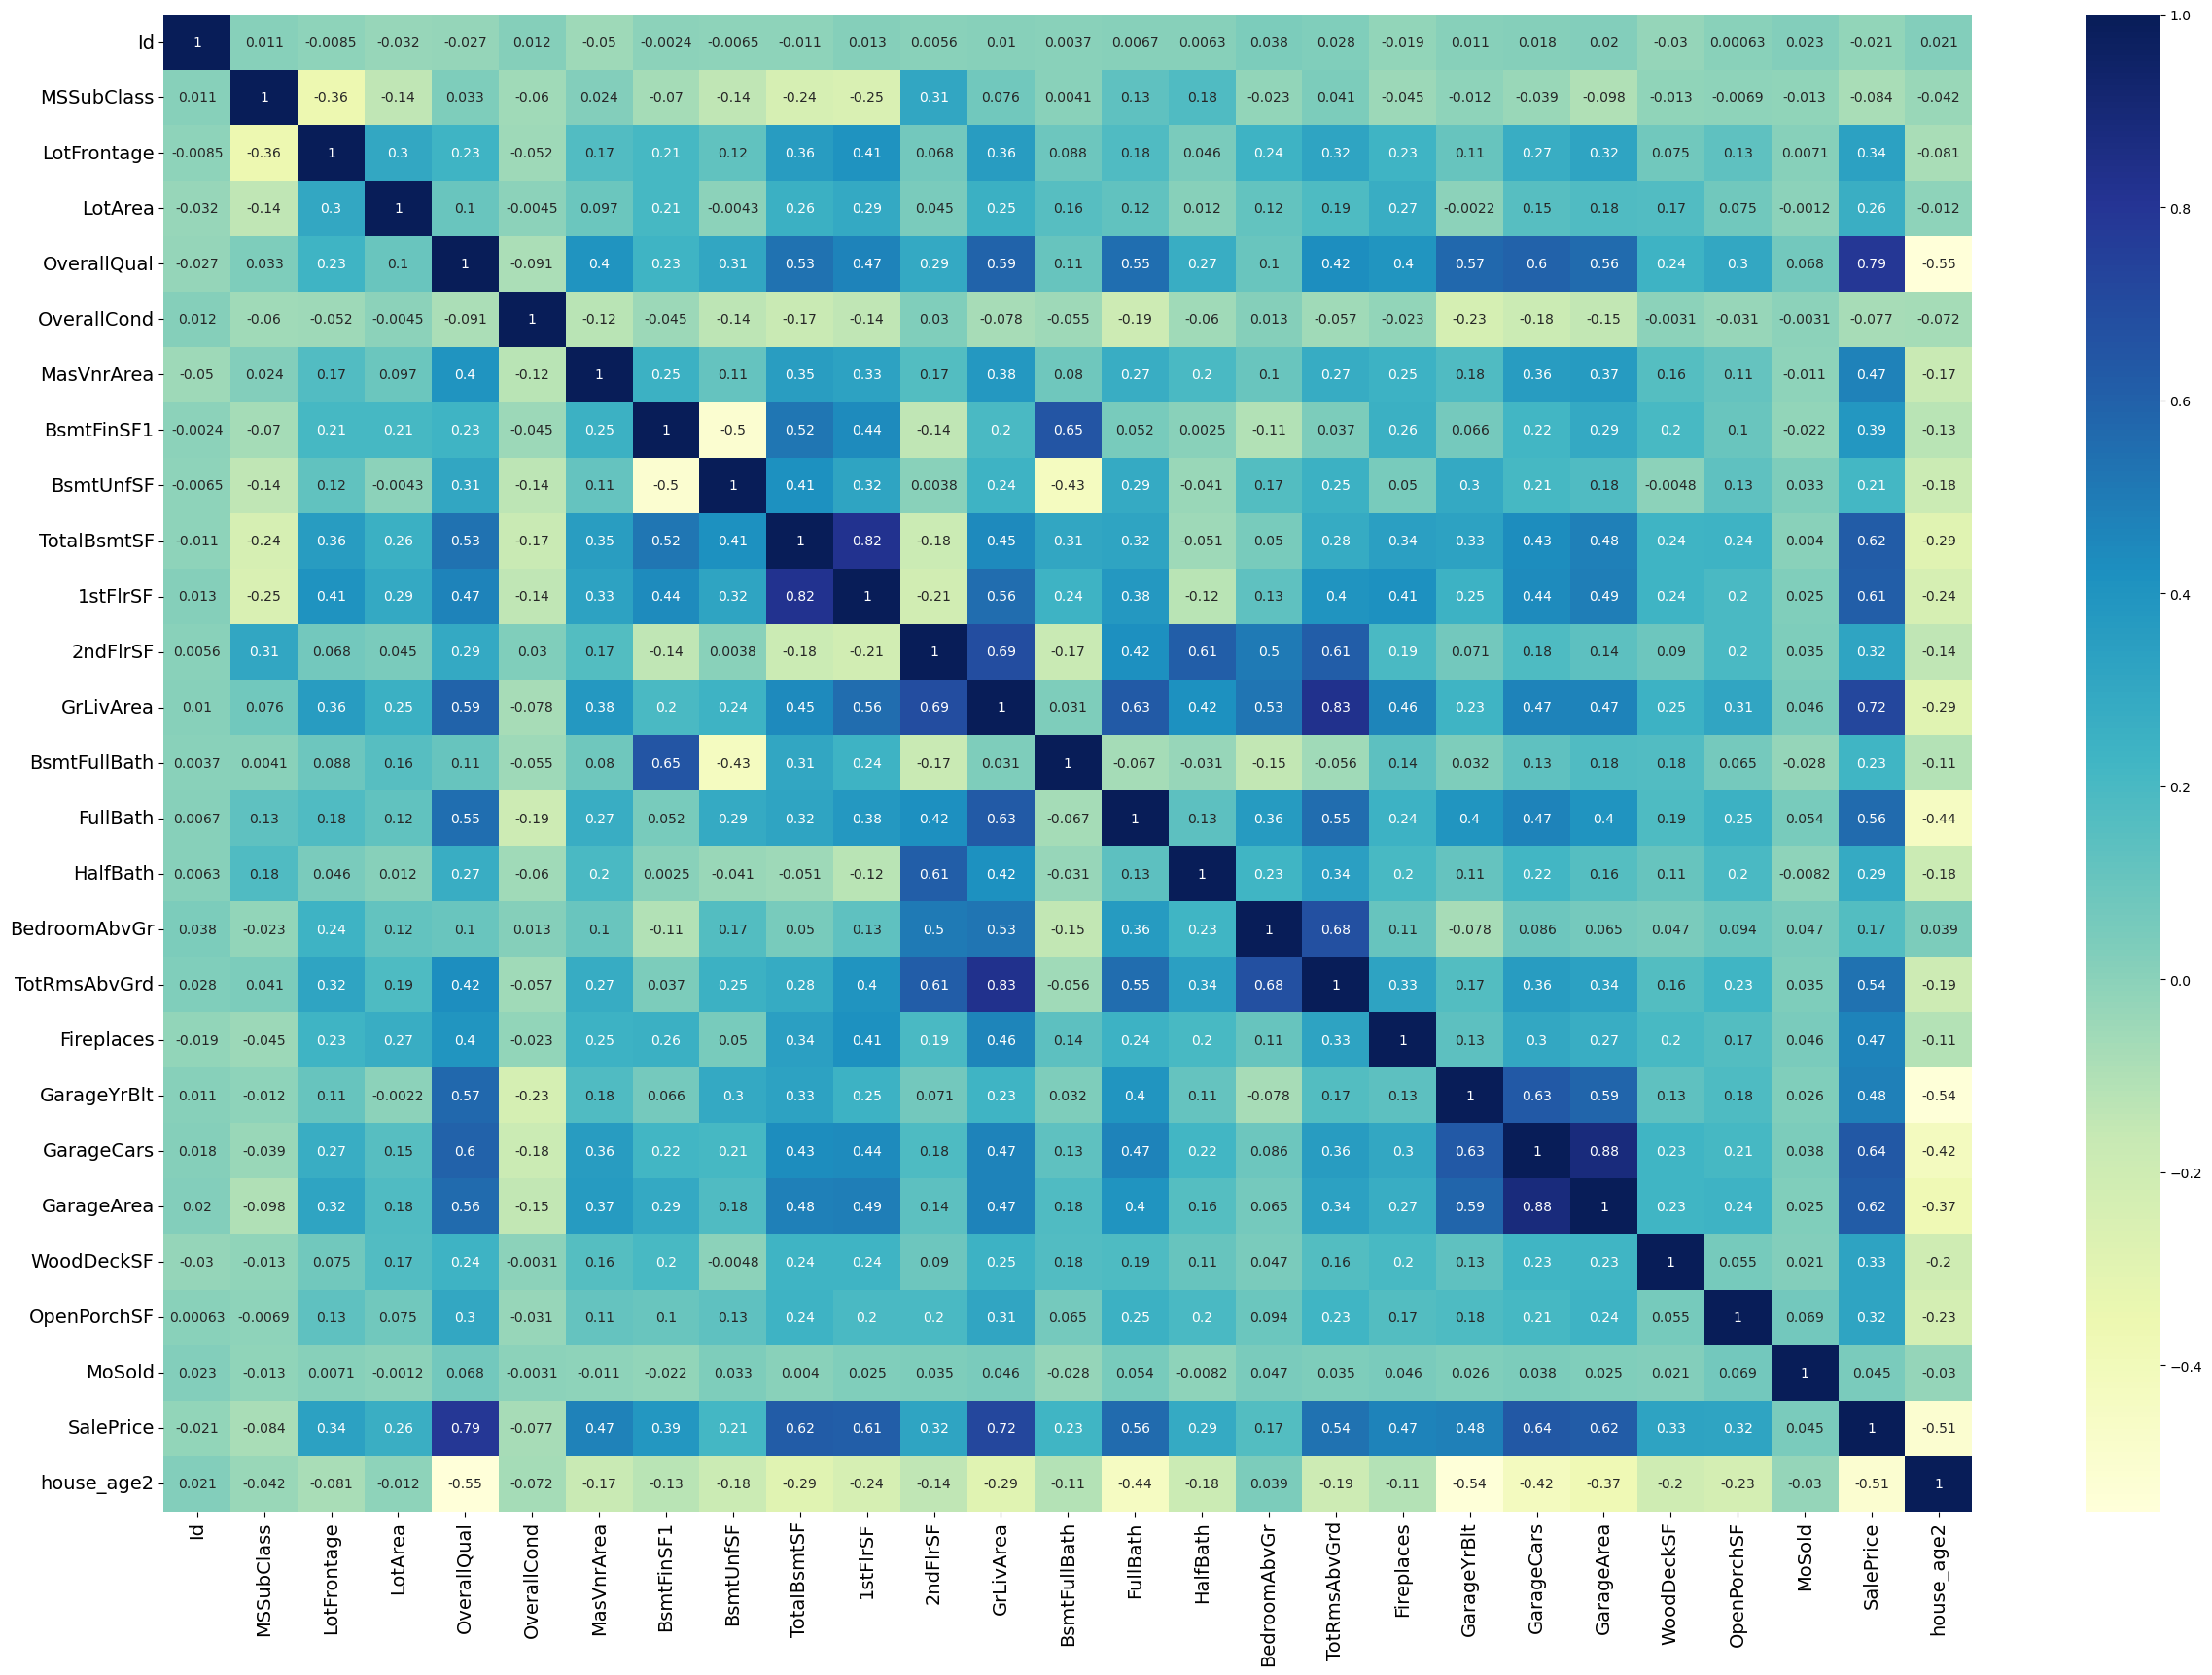

In [40]:
# Let’s check the correlation among variables and remove those independent variables with large correlation.

plt.figure(figsize = (30, 20))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap="YlGnBu",annot_kws={"fontsize":10})
plt.xticks(fontsize=14)

plt.yticks(fontsize=14)

plt.show()

### Observation:
- Following are highly correlated independent variables:
   - TotalBsmtSF & 1stFlrSF have 82% correlation
   - TotRmsAbvGrd & GrLivArea have 83% correlation
   - GarageCars & GarageArea have 88% correlation

So we have to make decision here to remove any one of the two highly correlated variables. Let’s drop 1stFlrSF, TotRmsAbvGrd and GarageArea.

##### **Outlier Treatment**

In [41]:
#### Outlier treatment excluding the target column 
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = df[feature].quantile(.75) - df[feature].quantile(.25) 
        max_value = df[feature].quantile(.75)+1.5*IQR
        min_value = df[feature].quantile(.25)-1.5*IQR
        df[feature][df[feature] > max_value] = max_value
        df[feature][df[feature] < min_value ] = min_value

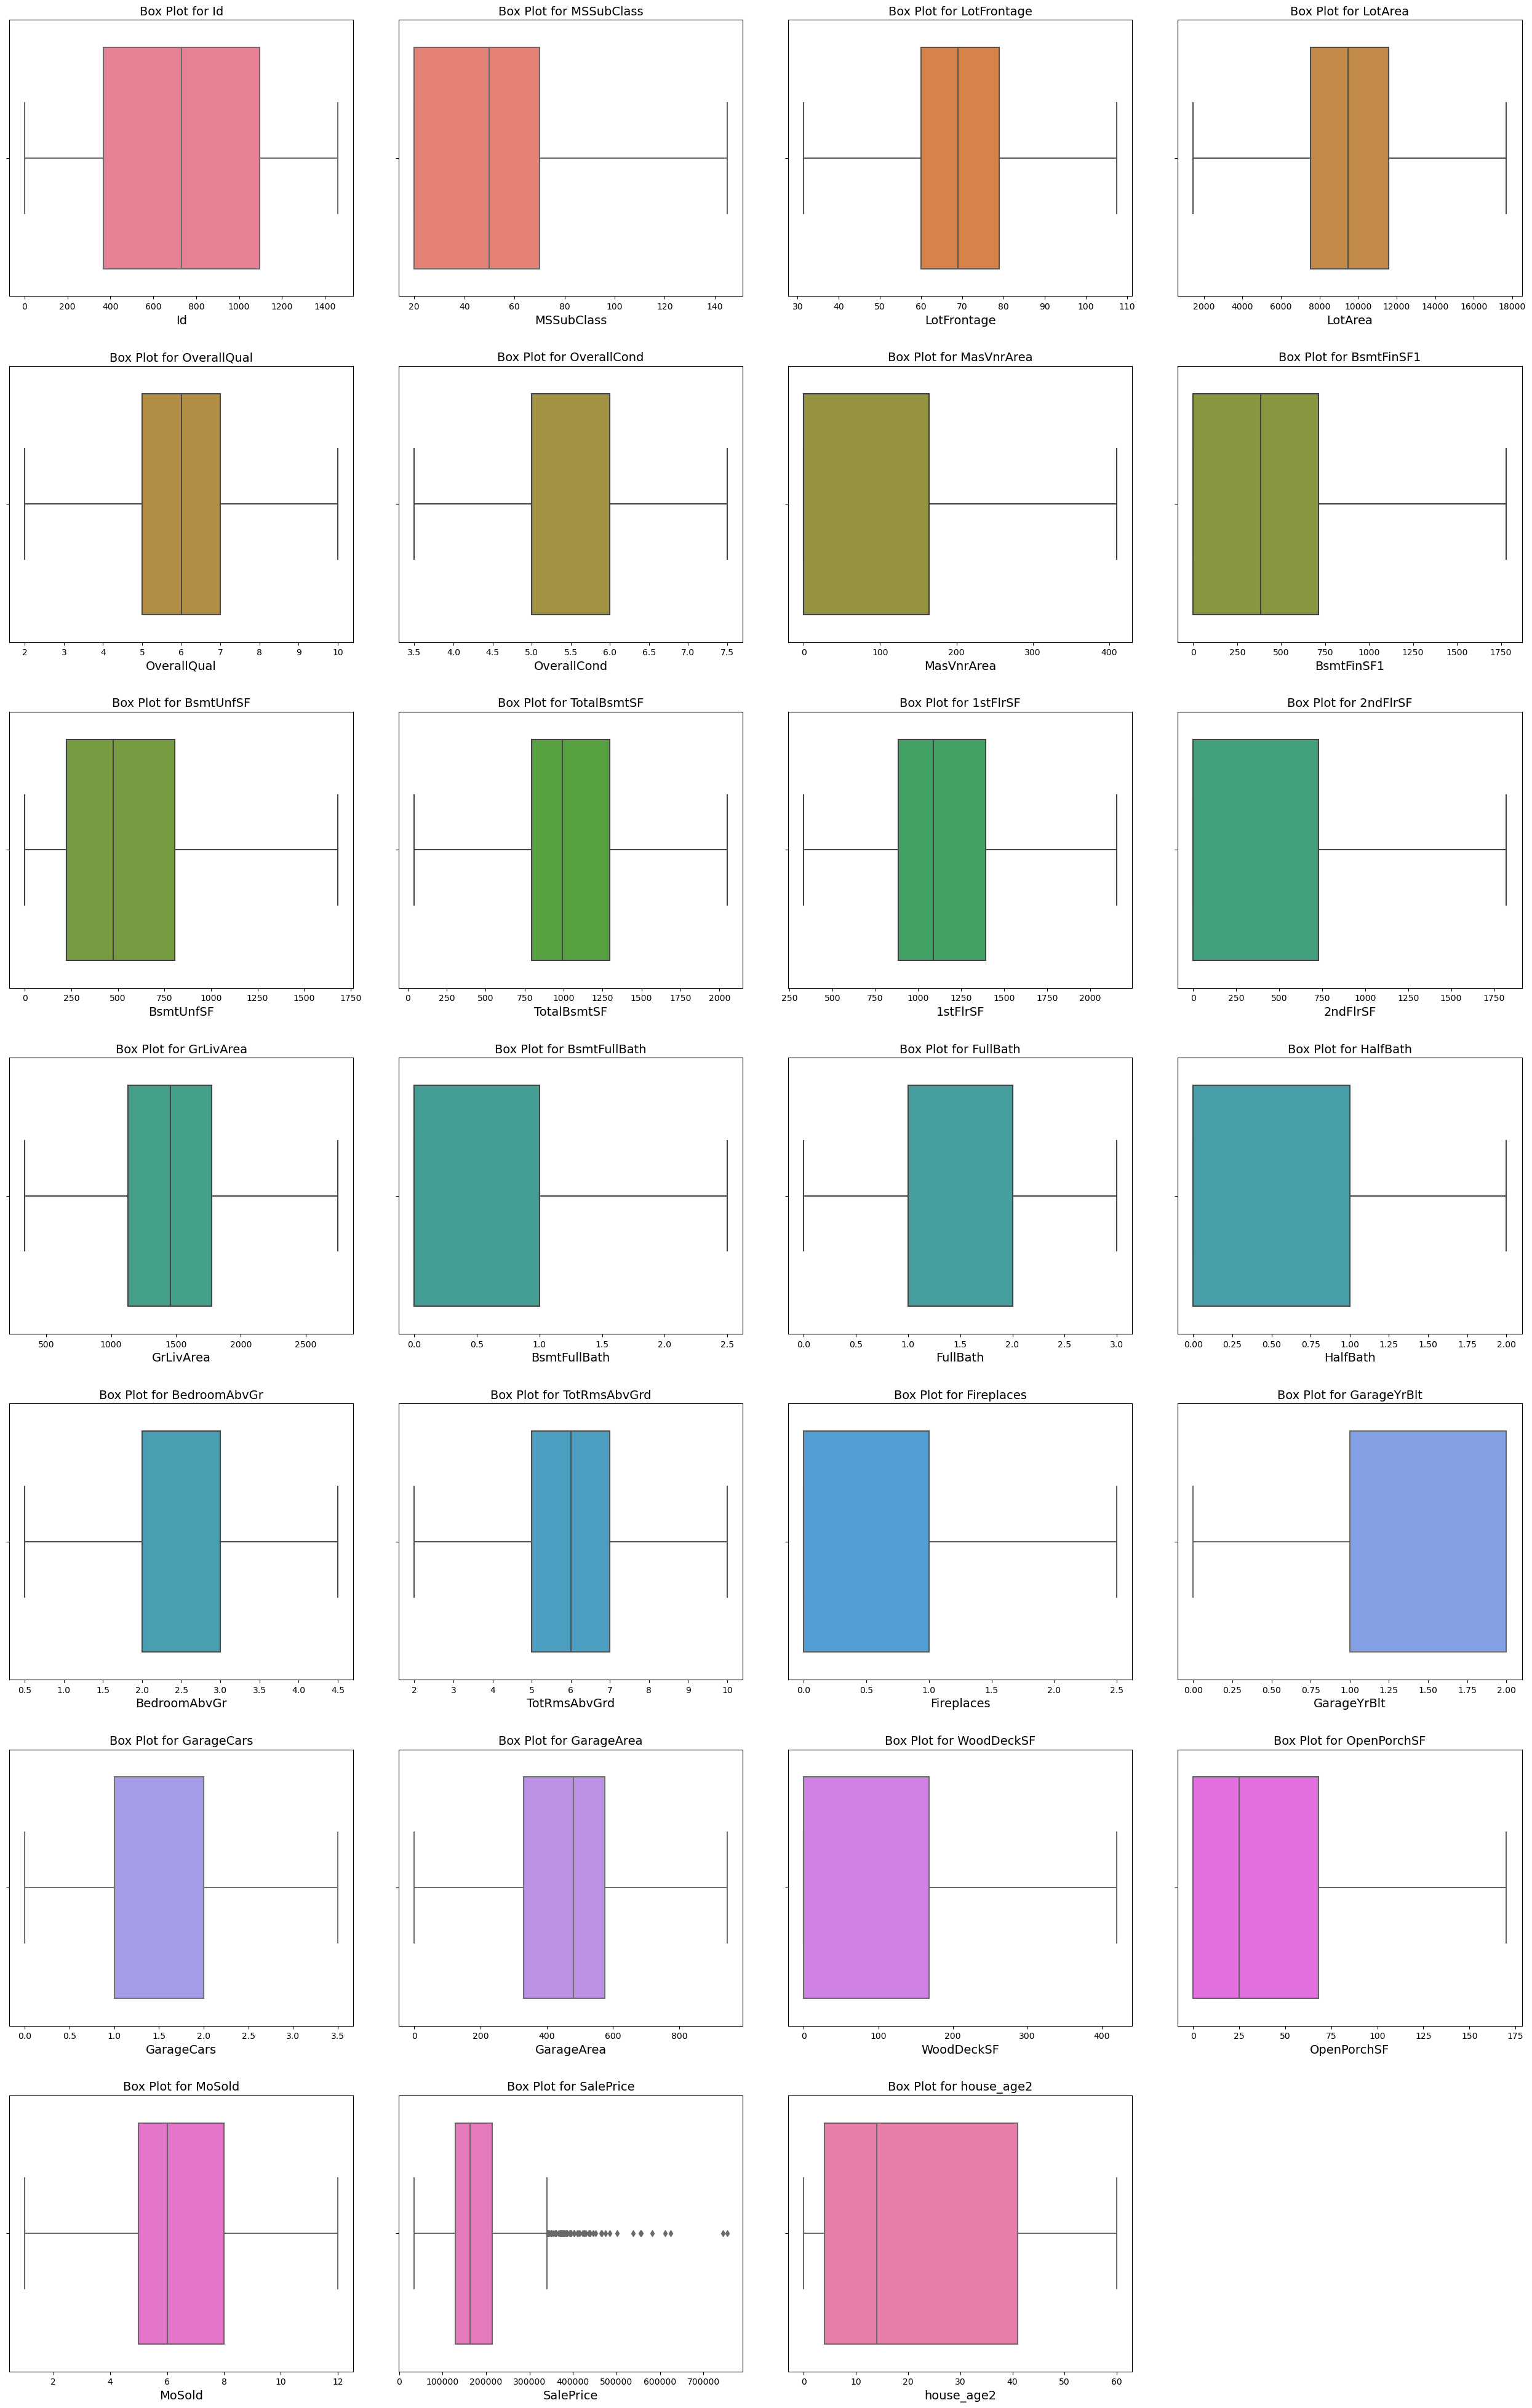

In [42]:
plot_boxplot(df,num_col)

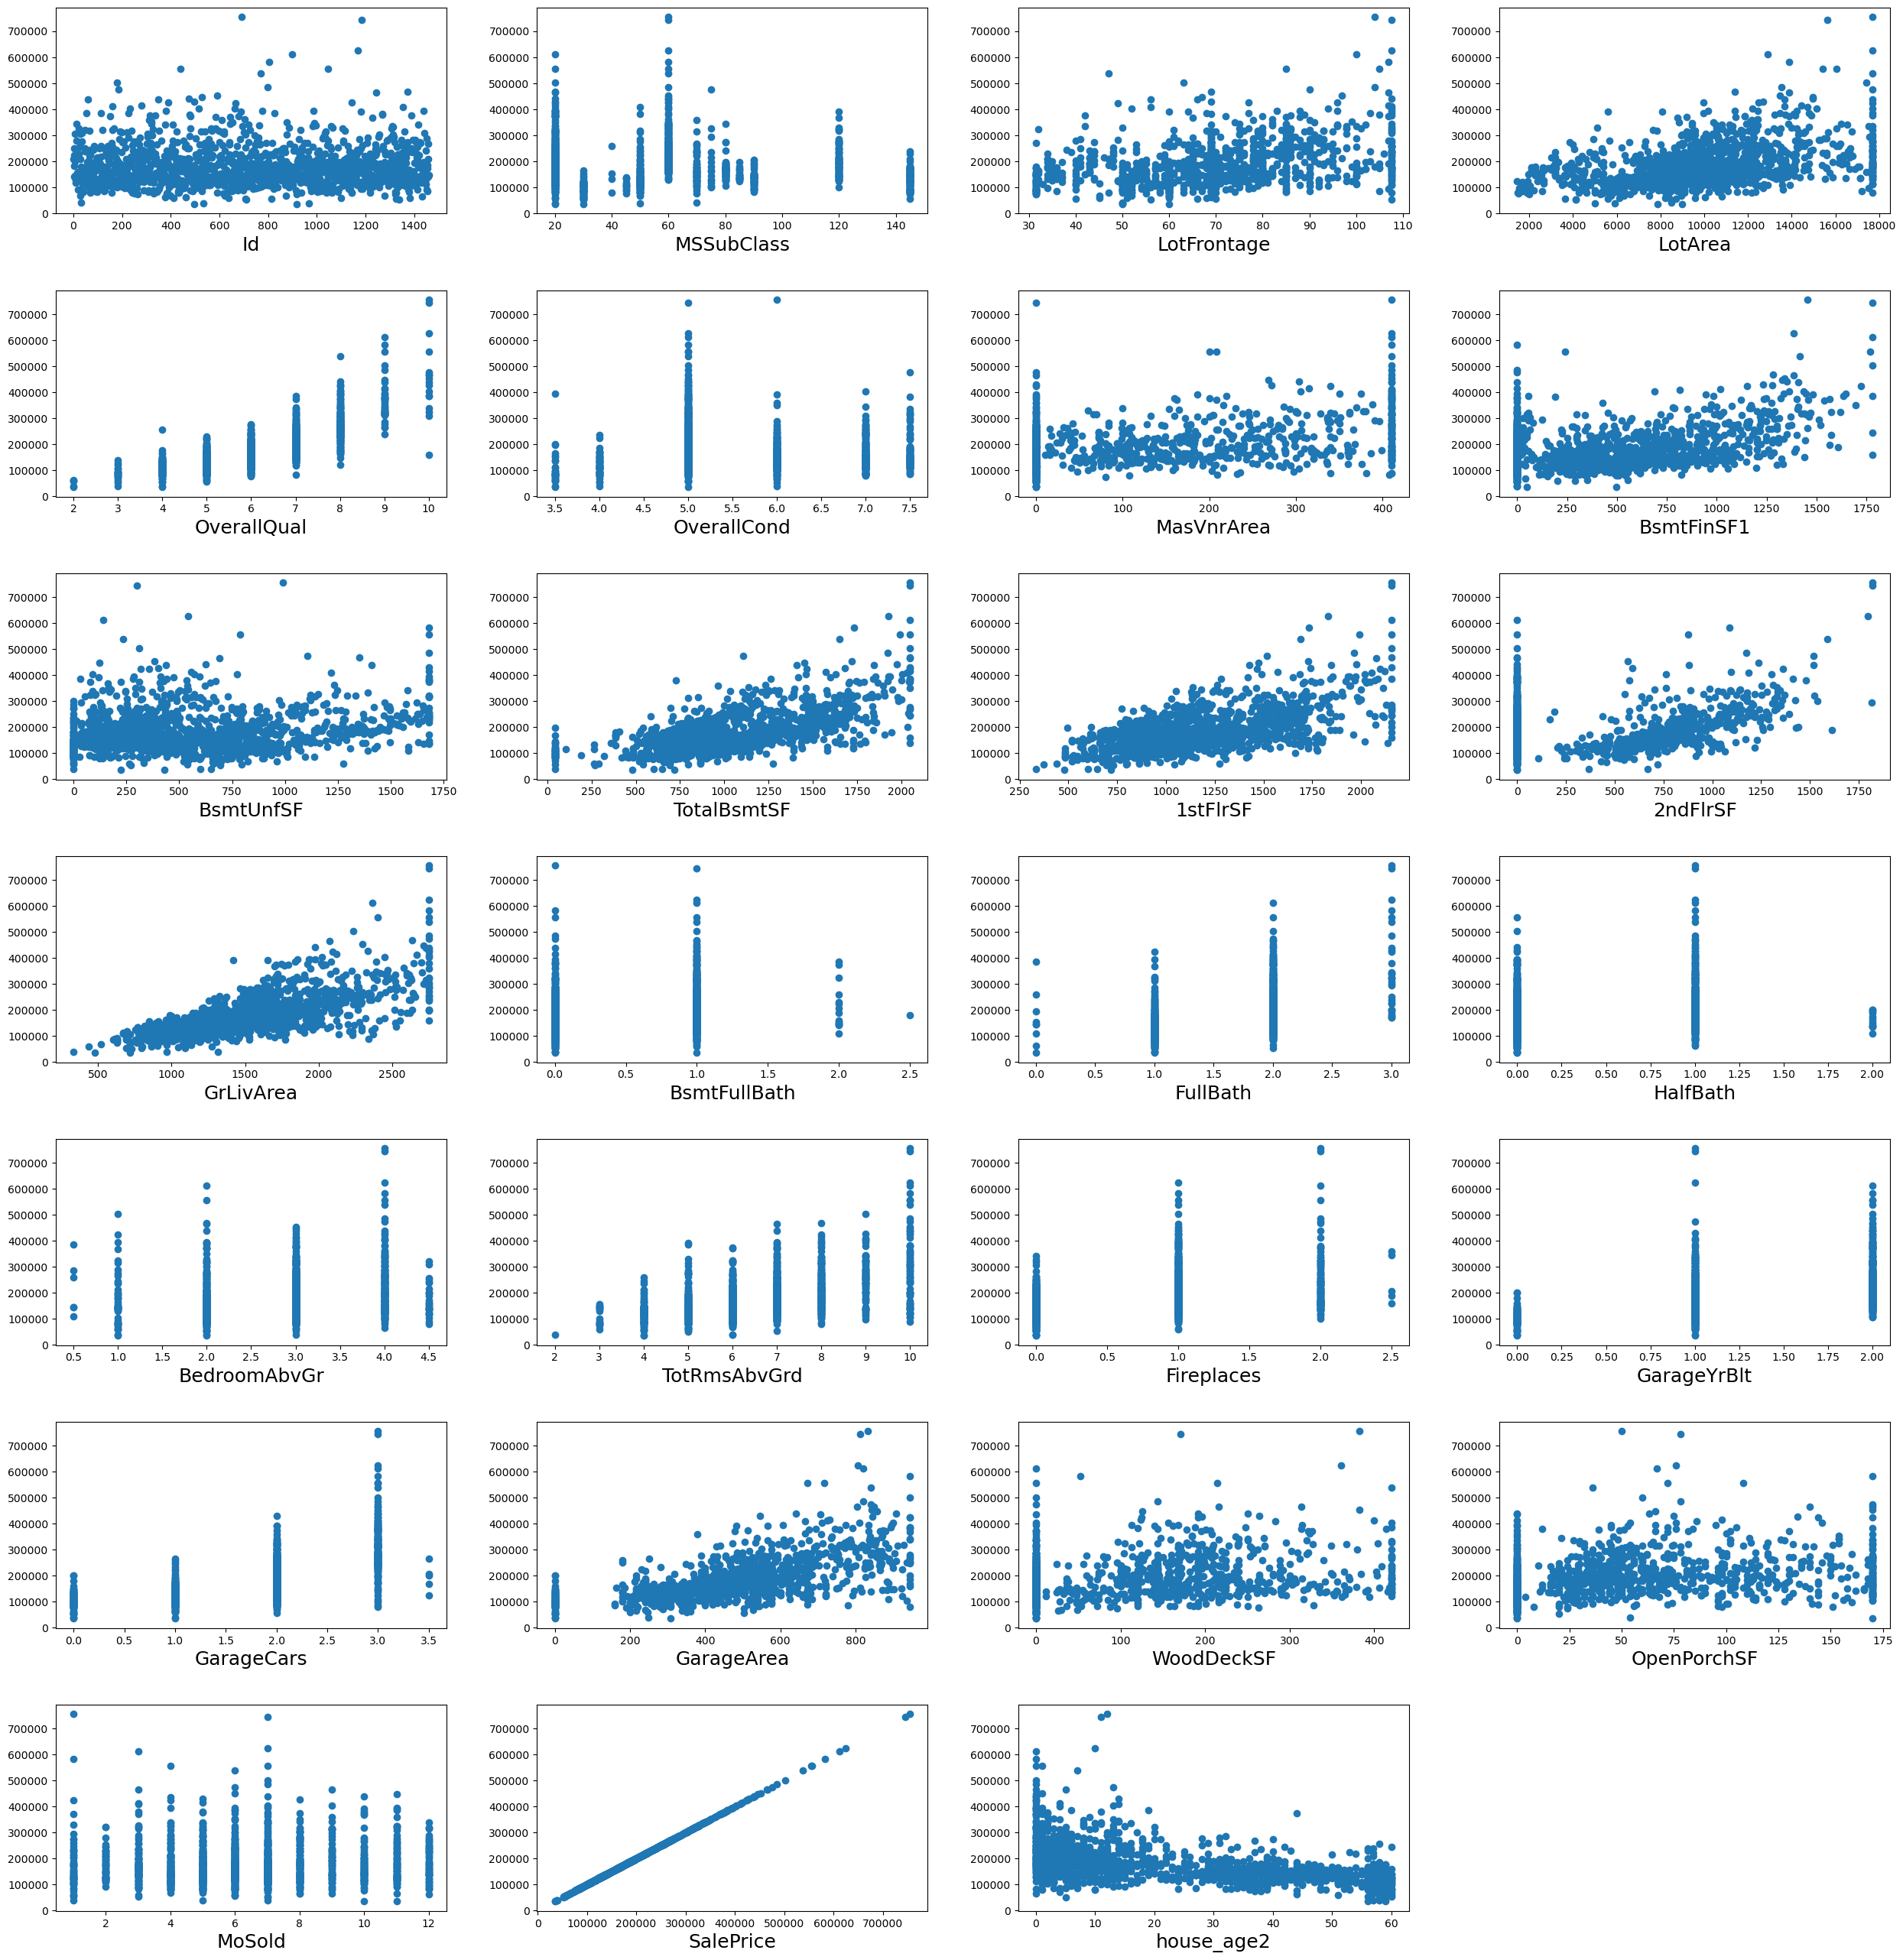

In [43]:
### scatter plot for all numeric data with target variable SalePrice
num_col=list(df.select_dtypes(['int64','float64']))
plt.figure(figsize=(25,40))
for m,n in enumerate(num_col):
    plt.subplot(11,4,(m+1))
    plt.tight_layout(h_pad=3,w_pad=3)
    plt.scatter(df[n],df['SalePrice'])
    plt.xlabel(n,fontsize=18)
plt.show()

#### Observation:
- Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.
- 'MSSubClass' has discrete values
- 'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice.
- Id Column can be dropped since it will not be adding any value to model



In [44]:
# Function for Plotting the Bar plots for Catagorical features 
def plot_barplot_num(df, columns):
    plt.figure(figsize=(25,50))
    palette = sns.color_palette("husl", len(columns))
    for m,column in enumerate(columns):
        plt.subplot(11,4,(m+1))
        plt.tight_layout(h_pad=3,w_pad=3)
        sns.barplot(x = column, y = 'SalePrice', data=df, palette='husl')
        plt.xticks(rotation=90) 
        plt.title(f'Bar Plot for {column}',fontsize=14)
        plt.xlabel(column,fontsize=14)
        plt.ylabel("SalePrice",fontsize=14)
    plt.show()

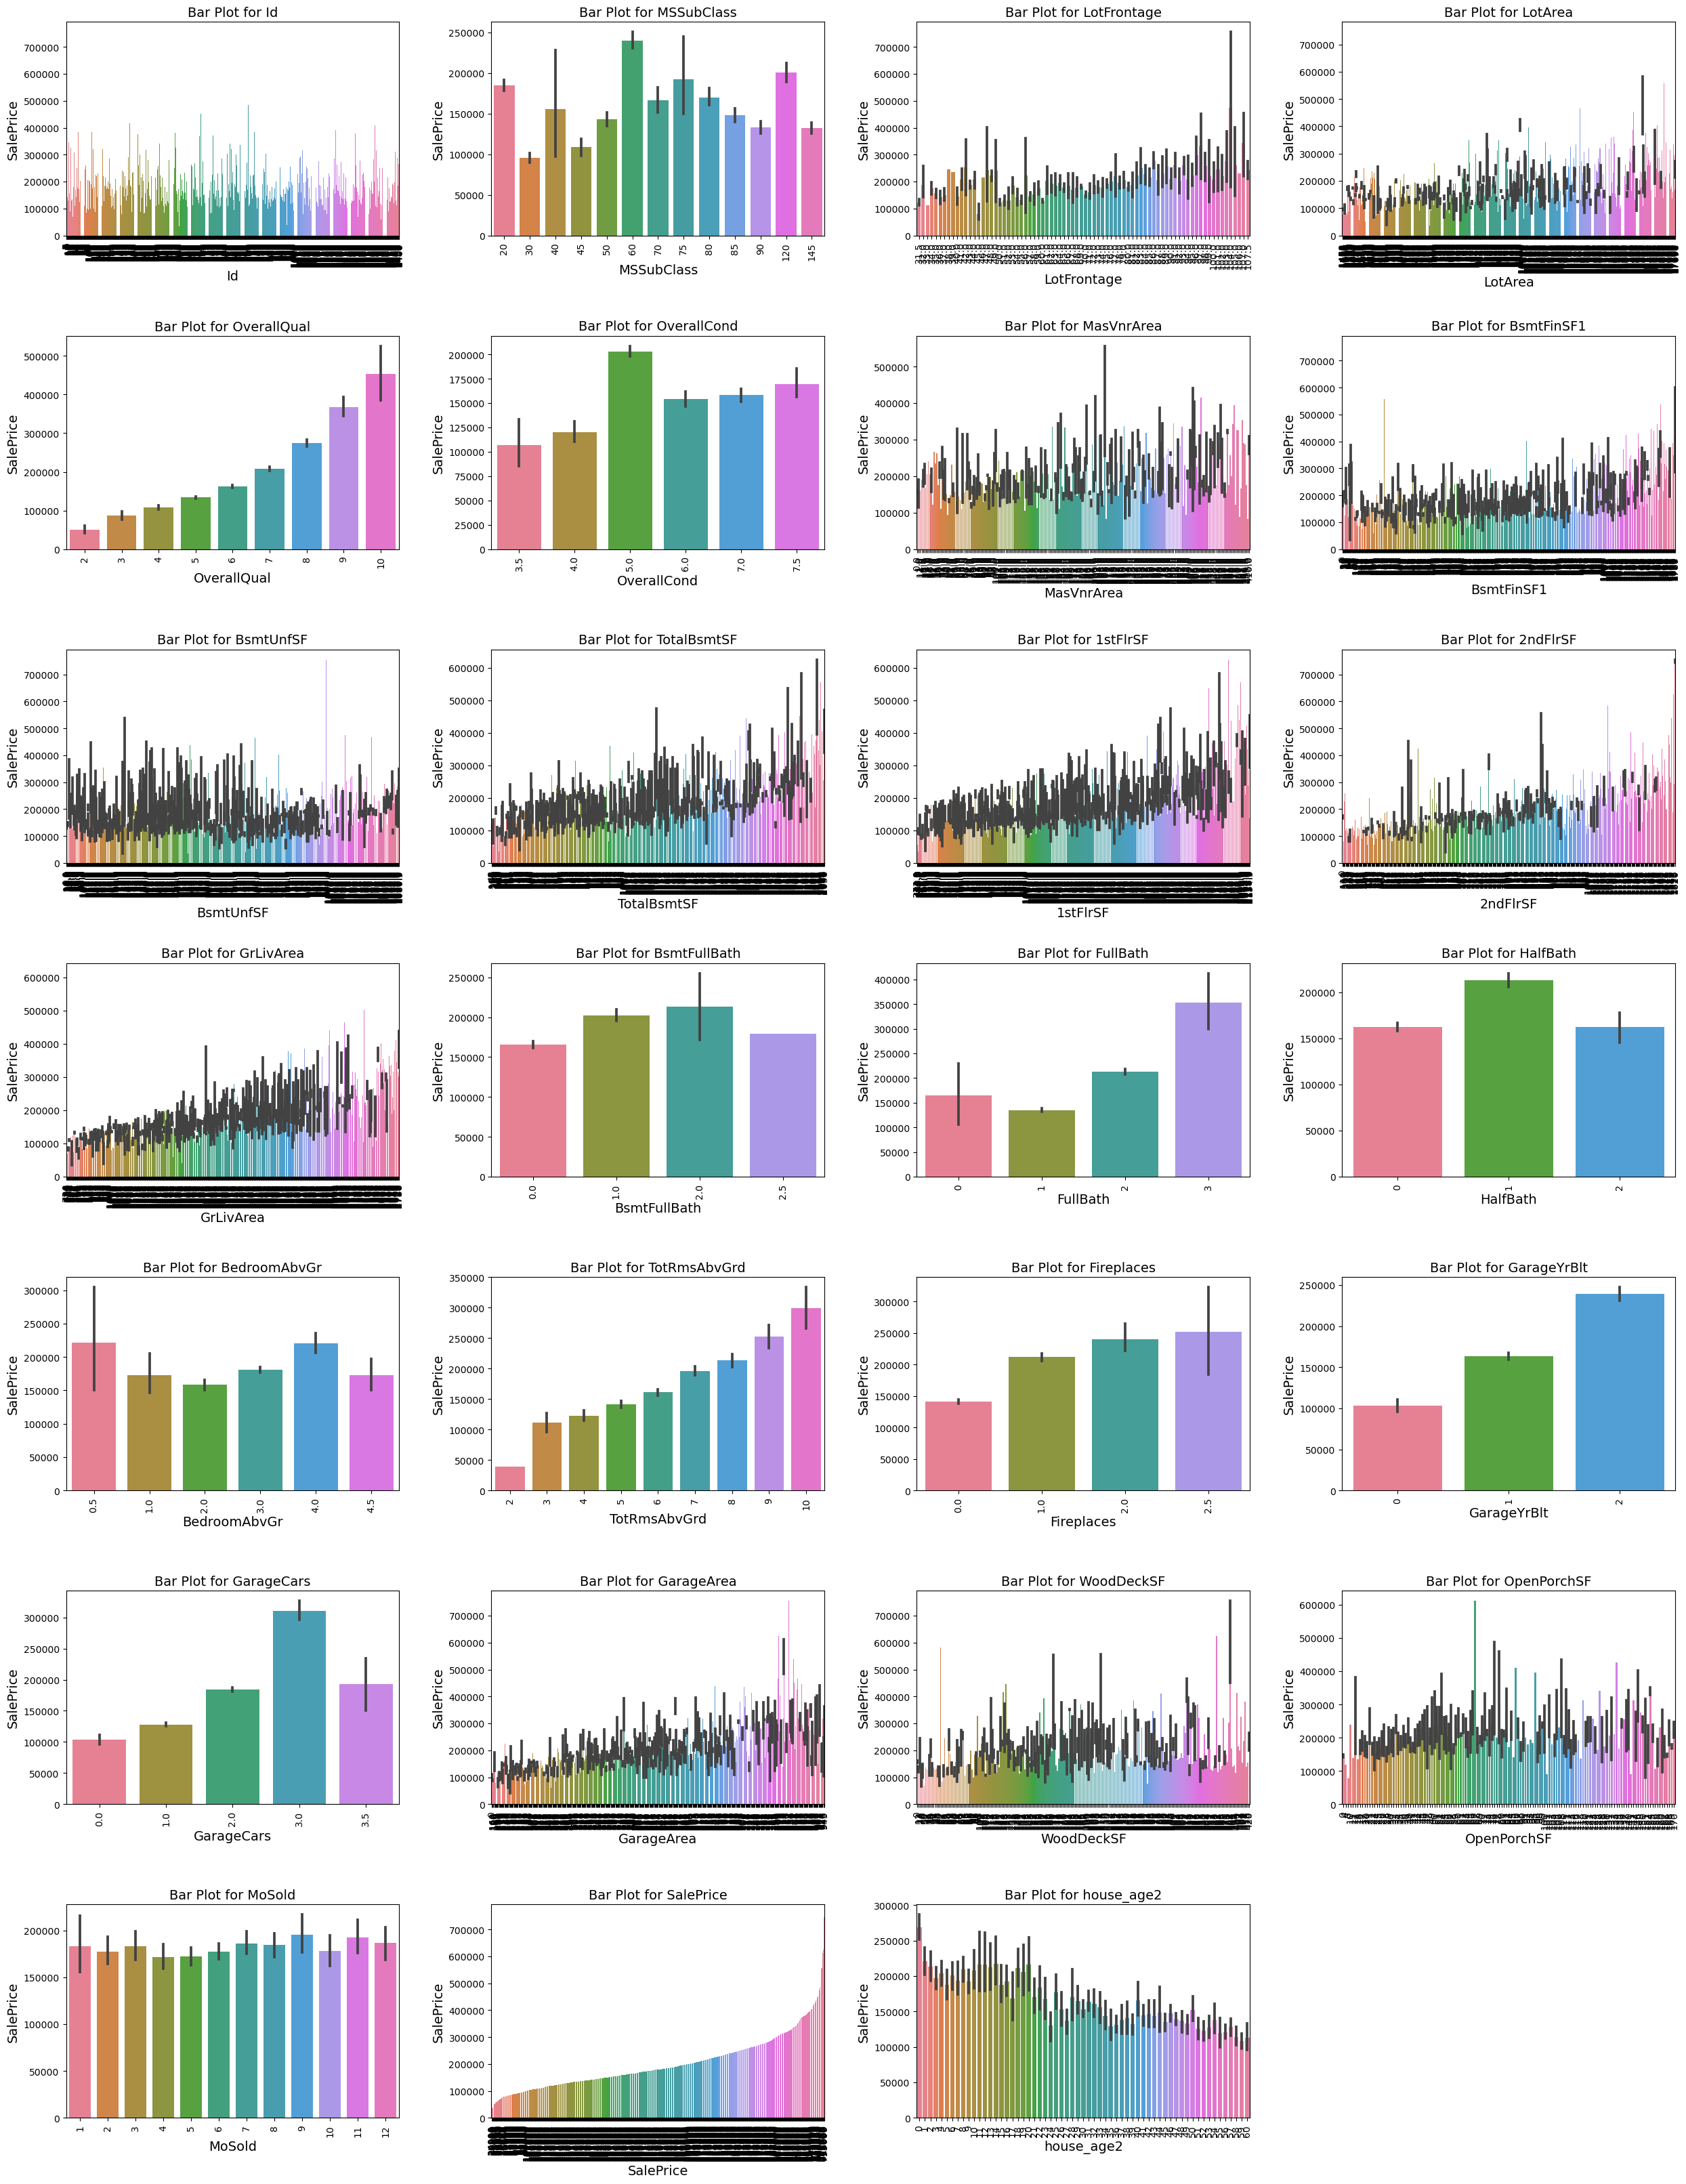

In [45]:
plot_barplot_num(df,num_col)

#### Observation:
- 'MSSubClass' : The SalePrice is Highest for SubClass 60
- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)
- 'MoSold' : SalePrice does not show a strong trend depending on month on which realty is sold
- 'FirePlaces' : SalePrices increases with increase in FirePlace
- 'GarageCars' : GarageCar Capacity of  3 have Highest SalePrice
- 'GarageYrBlt' : Newly Garages Built after year of 2000 have more SalePrice, newer the garage , more is the SalePrice
- 'FullBath' = 3 and 'HalfBath' = 1 have highest SalePrice
- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price


In [46]:
# Based on above Correlation Matrix observation dropping these features
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'], axis=1,inplace=True)
# df.drop(['TotRmsAbvGrd','GarageArea'], axis=1,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1457 non-null   int64  
 1   MSSubClass     1457 non-null   int64  
 2   MSZoning       1457 non-null   object 
 3   LotFrontage    1457 non-null   float64
 4   LotArea        1457 non-null   int64  
 5   LotShape       1457 non-null   object 
 6   LotConfig      1457 non-null   object 
 7   Neighborhood   1457 non-null   object 
 8   BldgType       1457 non-null   object 
 9   HouseStyle     1457 non-null   object 
 10  OverallQual    1457 non-null   int64  
 11  OverallCond    1457 non-null   float64
 12  RoofStyle      1457 non-null   object 
 13  Exterior1st    1457 non-null   object 
 14  Exterior2nd    1457 non-null   object 
 15  MasVnrType     1457 non-null   object 
 16  MasVnrArea     1457 non-null   float64
 17  ExterQual      1457 non-null   object 
 18  Foundation   

In [48]:
### Dropping single value columns and Id Column as it will not add value to model 
df.drop(['Id'] , axis=1,inplace=True)


In [49]:
num_col=list(df.select_dtypes(['int64','float64']))
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'SalePrice',
 'house_age2']

In [50]:
cat_col=list(df.select_dtypes(['object']))
cat_col

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'Fence',
 'SaleCondition']

#### **Bivariate Analysis On Categorical Columns**

In [51]:

ordered_features = ['LotShape', 'HouseStyle', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual','FireplaceQu', 'GarageFinish']

unordered_features = ['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'Fence','SaleCondition' ]


In [52]:
# Function for Plotting the Bar plots for Catagorical features 
def plot_barplot_cat(df, columns):
    plt.figure(figsize=(25,50))
    palette = sns.color_palette("husl", len(columns))
    for m,column in enumerate(columns):
        plt.subplot(6,4,(m+1))
        plt.tight_layout(h_pad=3,w_pad=3)
        sns.barplot(x = column, y = 'SalePrice', data=df, palette='husl')
        plt.xticks(rotation=90) 
        plt.title(f'Bar Plot for {column}',fontsize=14)
        plt.xlabel(column,fontsize=14)
        plt.ylabel("SalePrice",fontsize=14)
    plt.show()

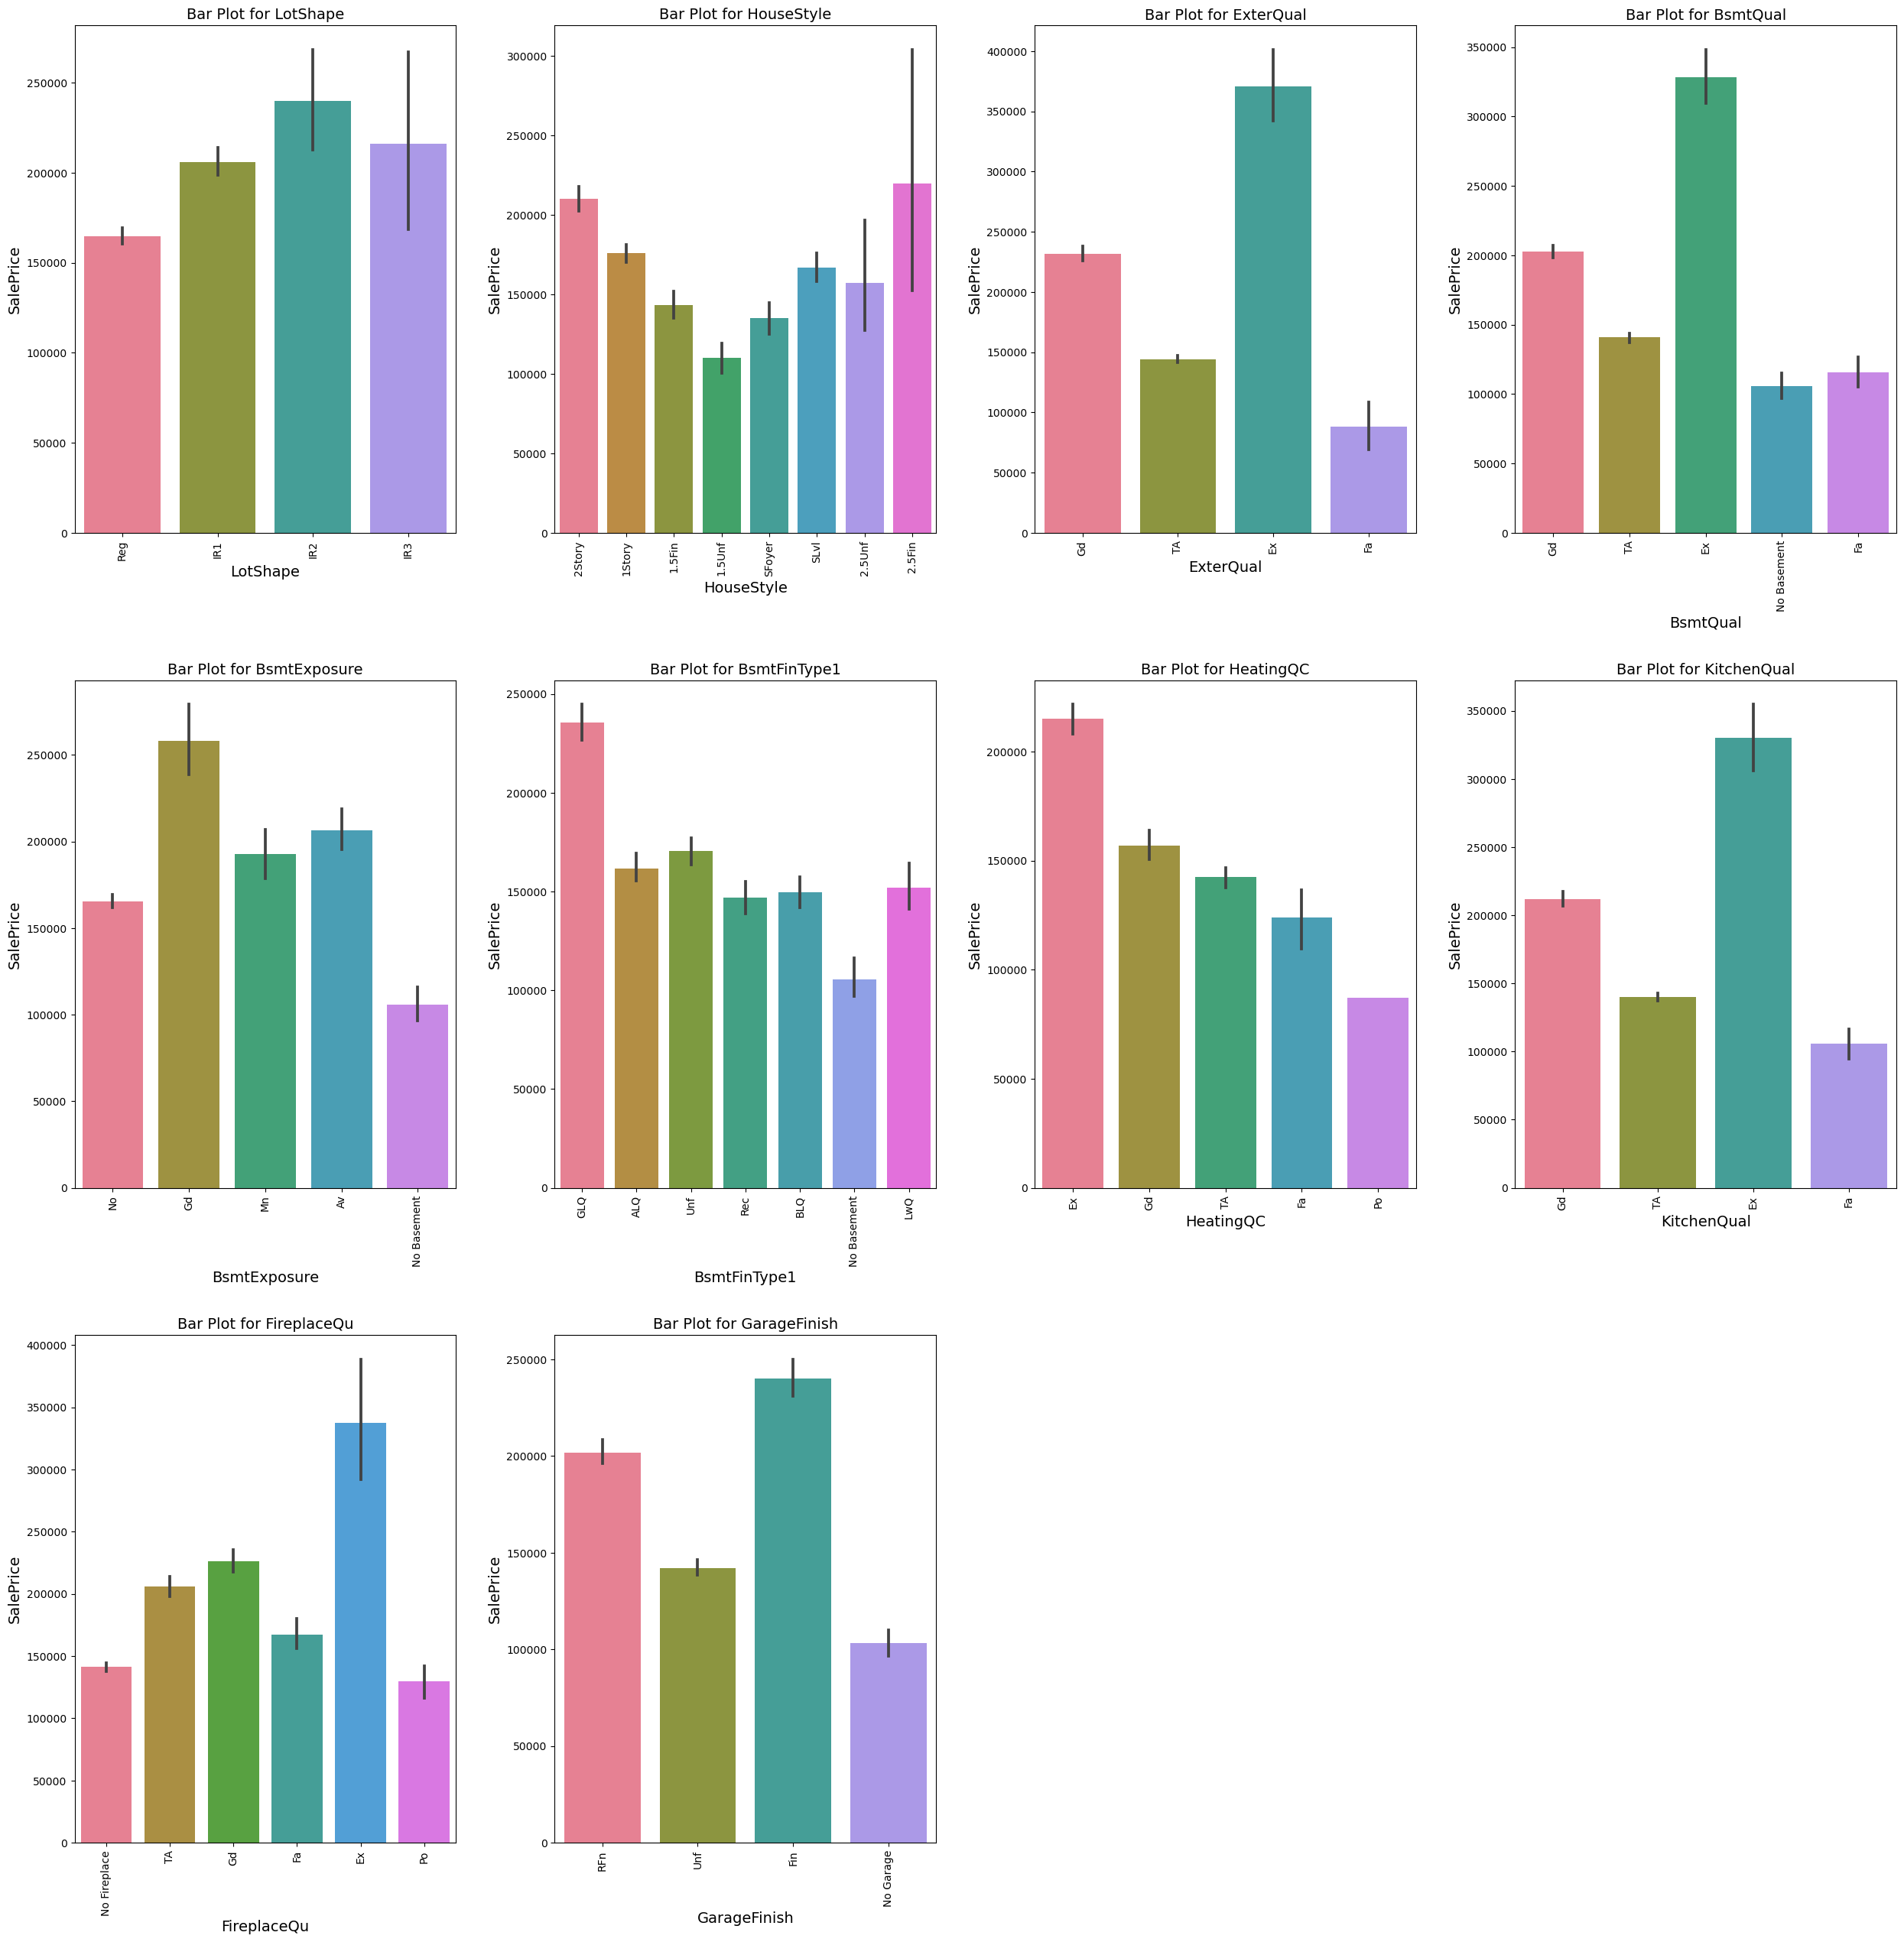

In [53]:
#ordered category features
plot_barplot_cat(df,ordered_features)

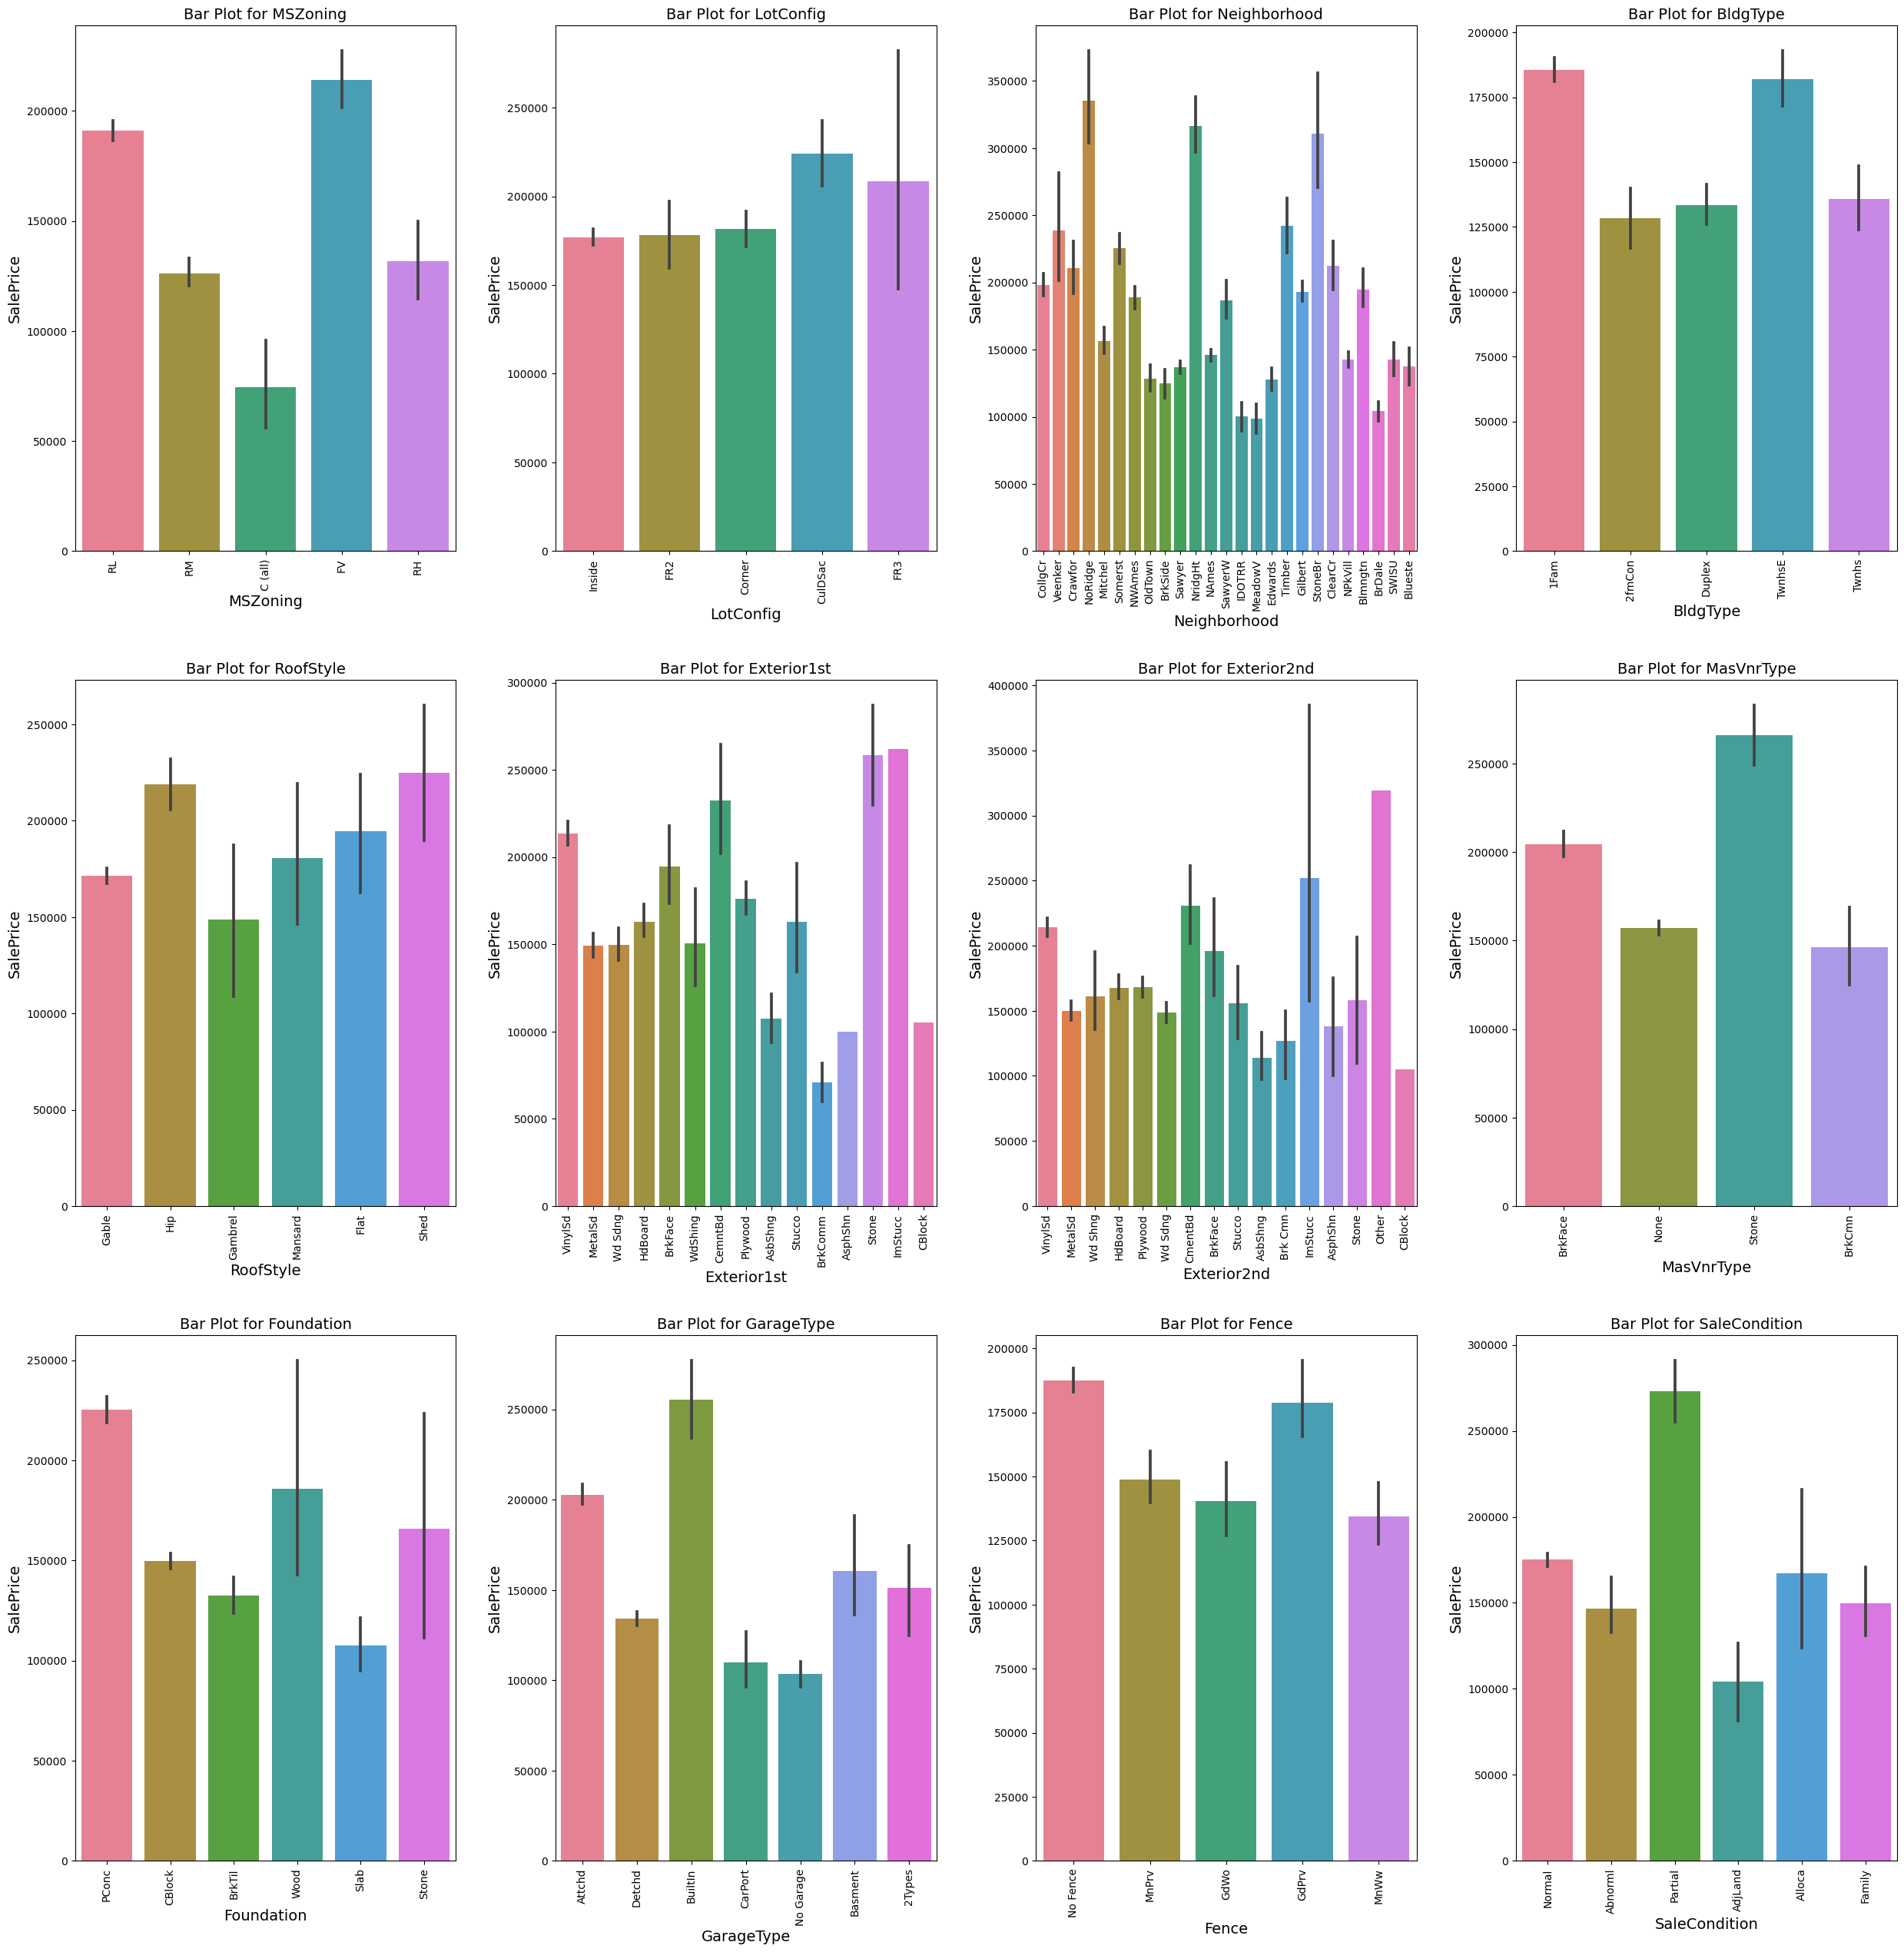

In [54]:
#unordered category features
plot_barplot_cat(df,unordered_features)

In [55]:
# Function for Plotting the Box plots for Catagorical features 
def plot_boxplot_cat(df, columns):
    plt.figure(figsize=(25,50))
    palette = sns.color_palette("husl", len(columns))
    for m,column in enumerate(columns):
        plt.subplot(11,4,(m+1))
        plt.tight_layout(h_pad=3,w_pad=3)
        sns.boxplot(x = column, y = 'SalePrice', data=df, palette='husl')
        plt.xticks(rotation=90) 
        plt.title(f'Bar Plot for {column}',fontsize=14)
        plt.xlabel(column,fontsize=14)
        plt.ylabel("SalePrice",fontsize=14)
    plt.show()




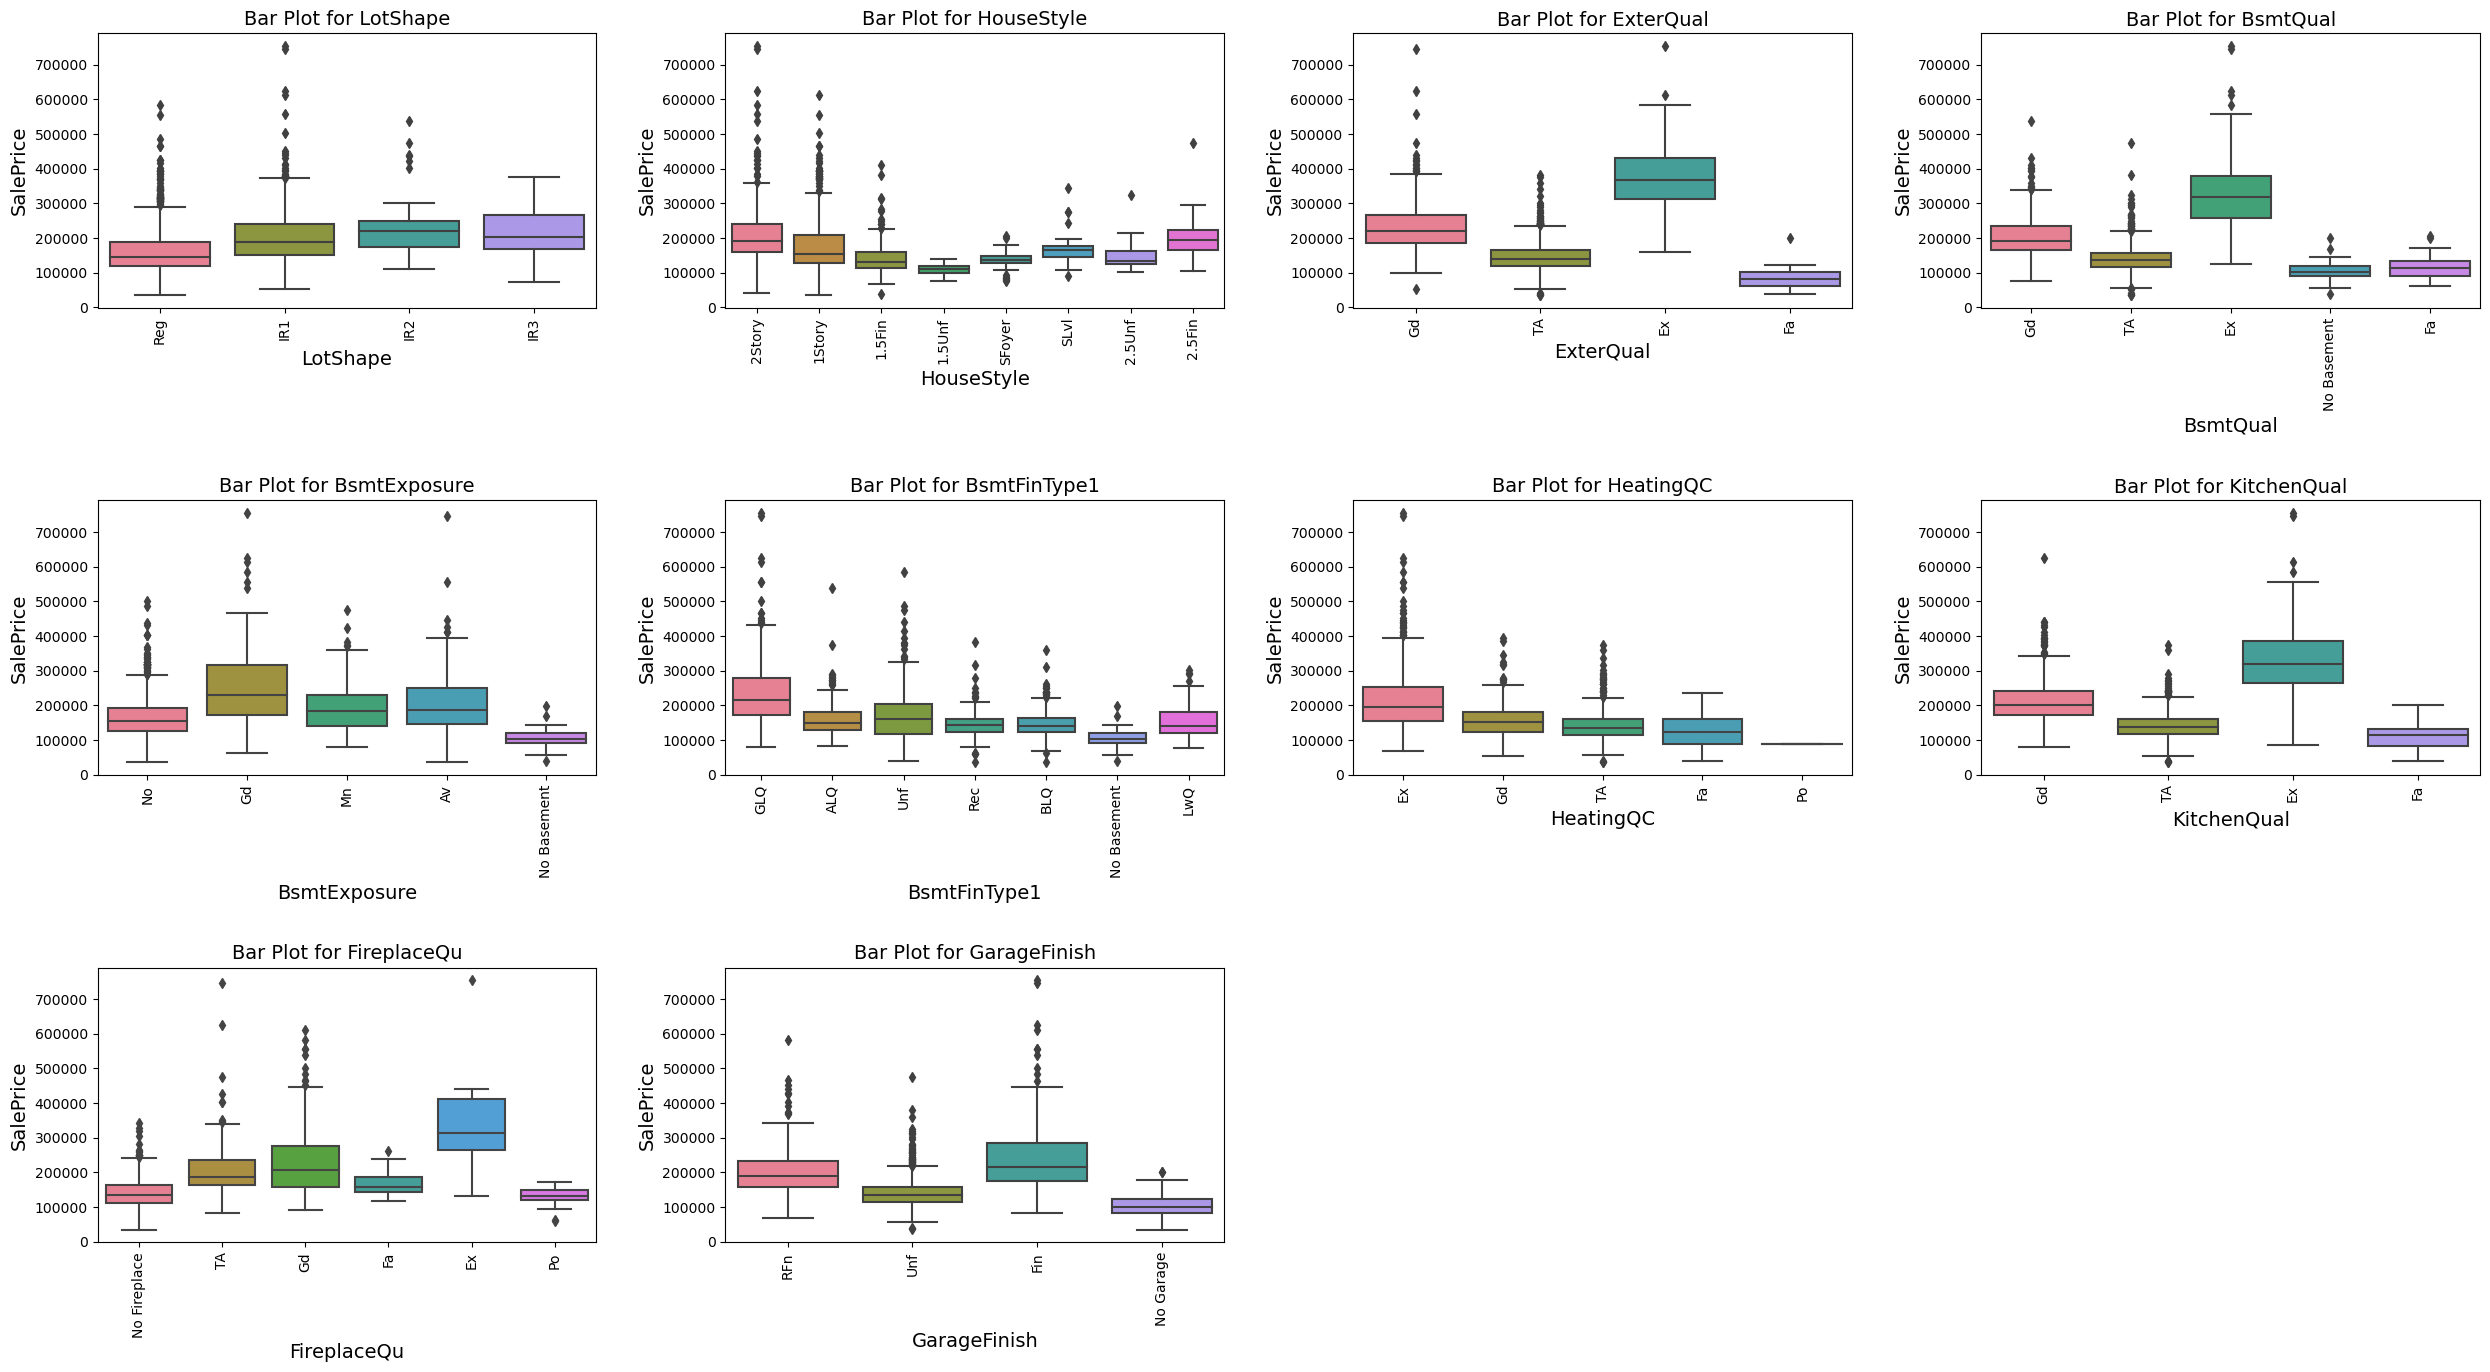

In [56]:
#ordered category features
plot_boxplot_cat(df,ordered_features)

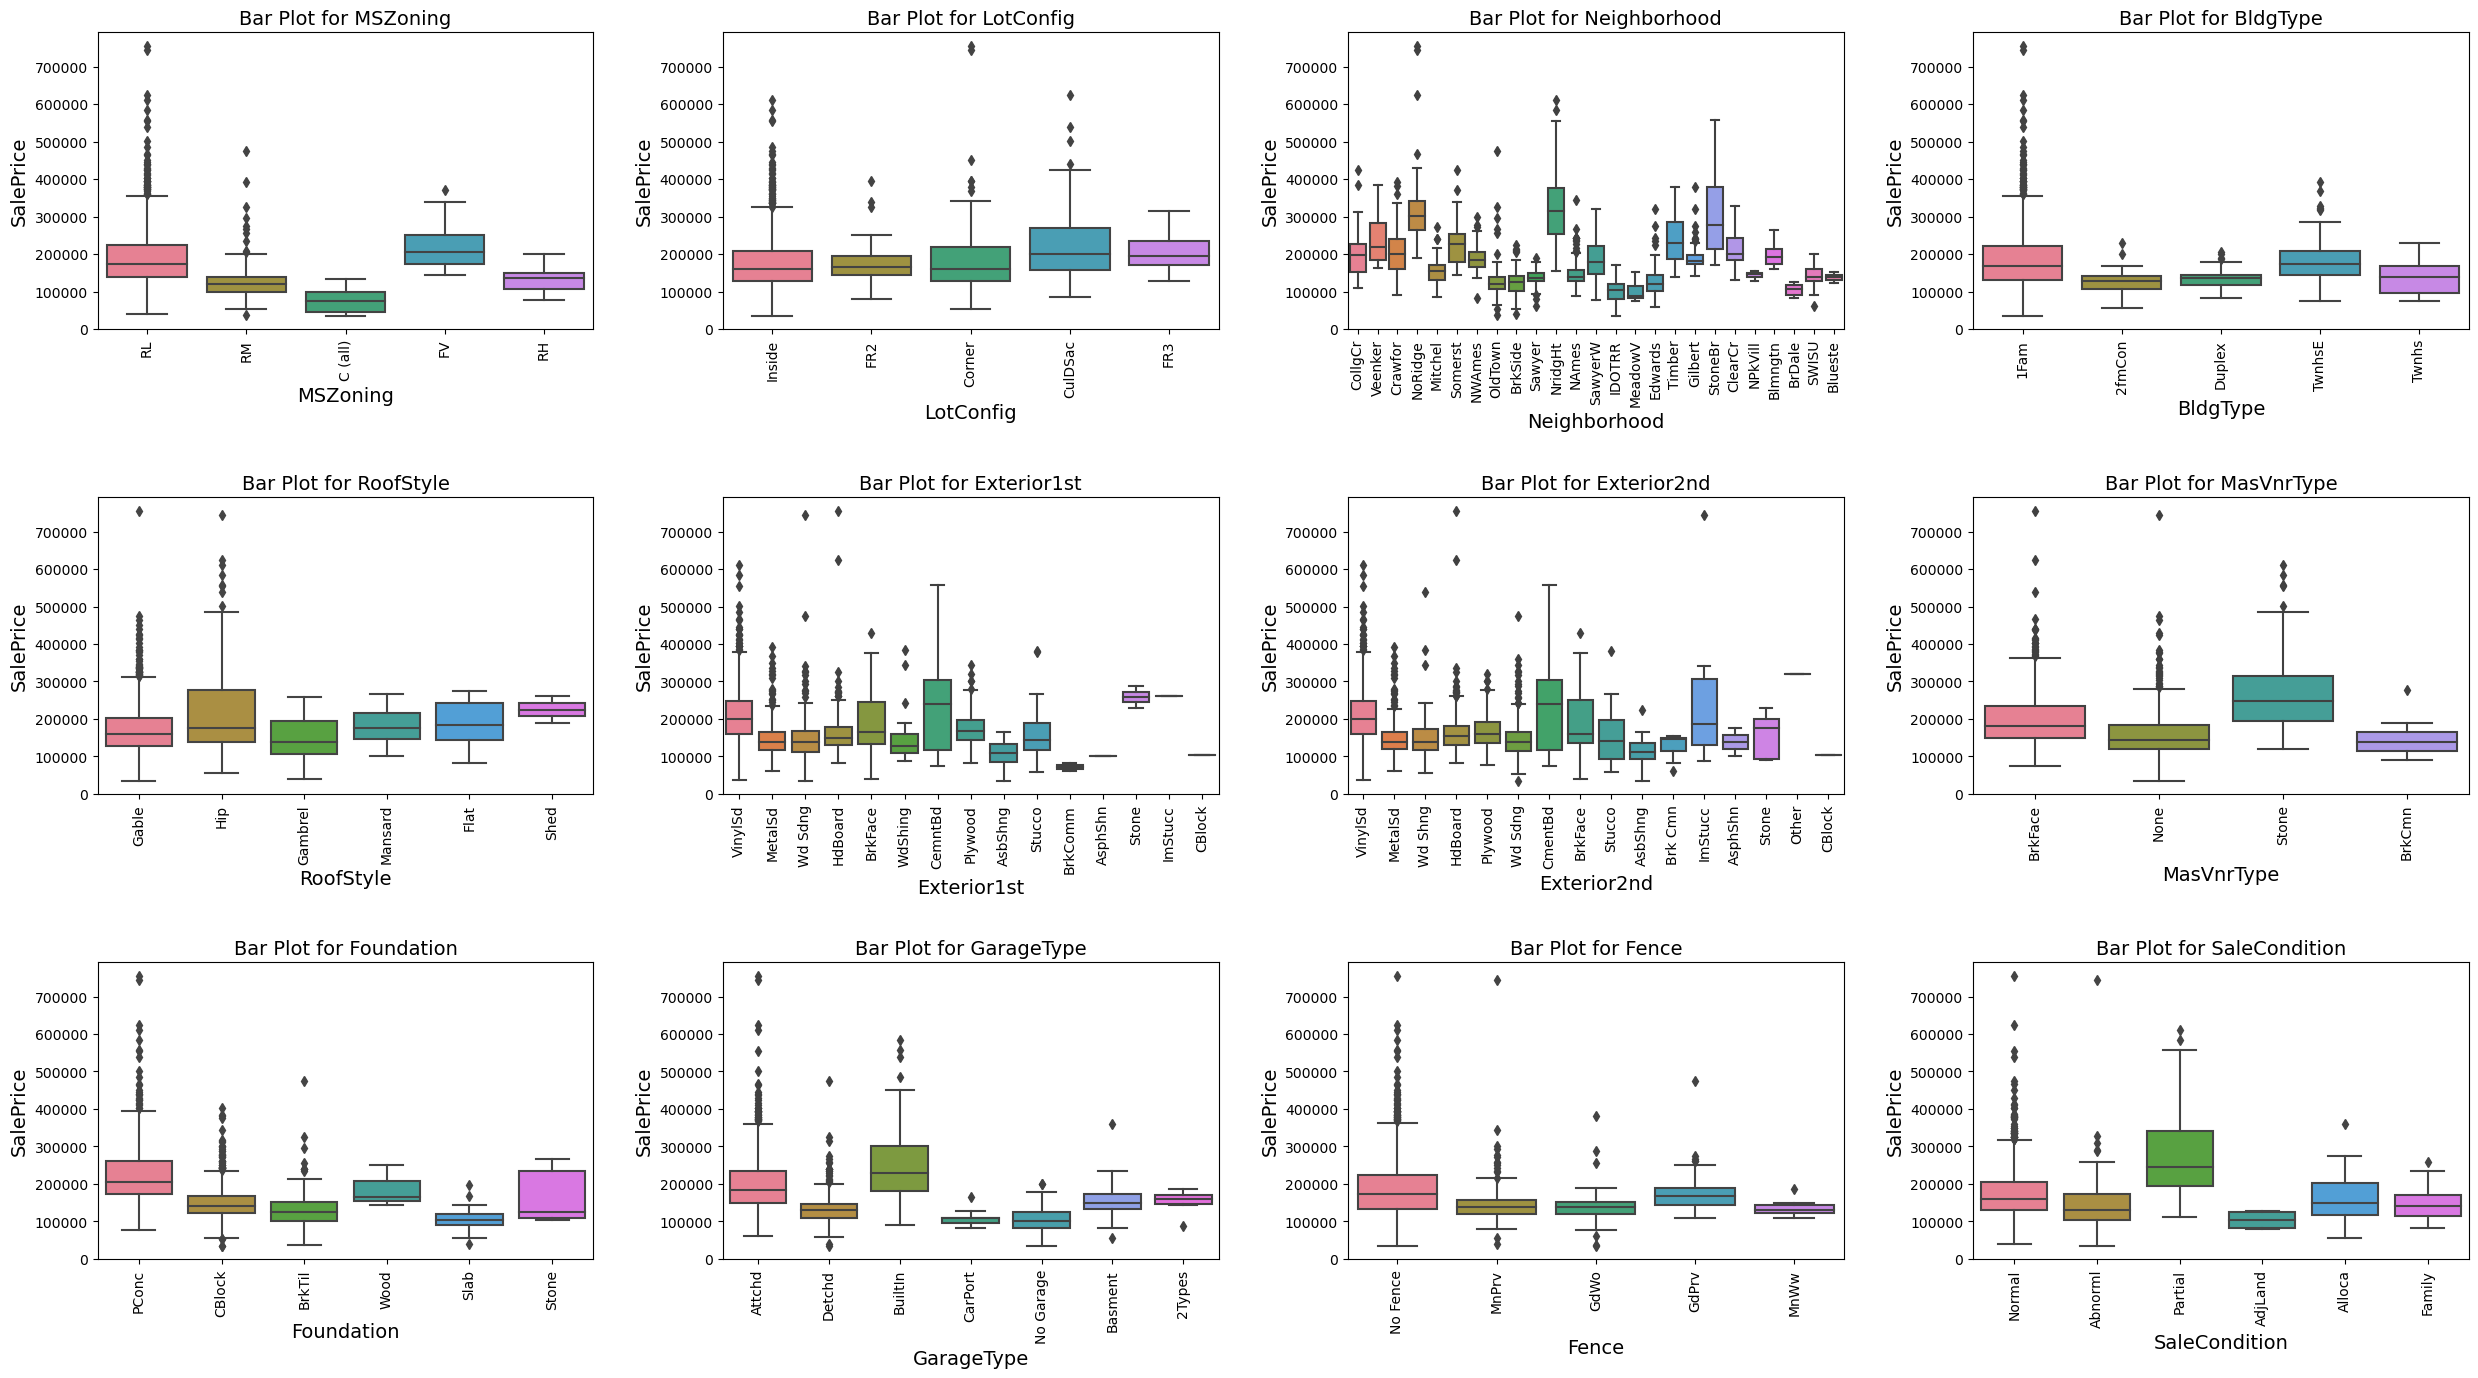

In [57]:
#unordered category features
plot_boxplot_cat(df,unordered_features)

## Observation:


#### Ordered Category Analysis : 
- 'LotShape' : Moderately irregular LotShape have the highest SalePrice
- 'HouseStyle' : 2 storied and 2.5  2nd level Finished houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice
- 'BsmtQual' : Houses with Excelllent Height of Basement have the highest SalePrice
- 'BsmtExposure' : Houses with Good Exposure to walkout or garden level Walls have the highest SalePrice
- 'BsmtFinType1' : Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
-  Houses having excellent HeatingQC and KitchenQuality have the highest SalePrice
- 'FireplaceQu' : SalePrice increases with increase in FirePLace Quality, Excellent having highest SalePrice
- 'GarageFinish' : SalePrice is highest where garage is finished.
- A lot of houses have unfinished basment or no basement (label = No Basement)




#### Unordered Category Analysis 


- Houses classified as MSZoning = FV or Floating Village Residential have the highest SalePrice

- Houses with foundation of poured concrete (Foundation = PConc) have the highest price

- Houses with Single-family detached and townhouse end unit dwelling have highest SalePrice

- Houses with attached and built-in garage have high SalePrice

- Most of the houses do not have fence (Fence= No Fence)

- Houses with Hip and Shed RoofStyle have higher Sale Price 

- Houses with exterior covering of Cement Board , Imitation Stucco, Stone have highest Sale Price above 200k 

- Houses with Stone Masonry Veneer Type have highest SalePrice


- Houses with Sale condition = Partial leads to high SalePrice

- Houses in neighborhood of Northridge , Northridge Heights and Stone Brook have highest SalePrice . Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns




#### **Label Encoding for Ordered Categorical Features**

In [58]:
#Label Encoding for Ordered Categorical Features

df['LotShape'] = df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['HouseStyle'] = df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df['GarageFinish'].map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
df['FireplaceQu'] = df['FireplaceQu'].map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [59]:
# Checking the features after encoding

df[ordered_features].info()



<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1457 non-null   int64
 1   HouseStyle    1457 non-null   int64
 2   ExterQual     1457 non-null   int64
 3   BsmtQual      1457 non-null   int64
 4   BsmtExposure  1457 non-null   int64
 5   BsmtFinType1  1457 non-null   int64
 6   HeatingQC     1457 non-null   int64
 7   KitchenQual   1457 non-null   int64
 8   FireplaceQu   1457 non-null   int64
 9   GarageFinish  1457 non-null   int64
dtypes: int64(10)
memory usage: 125.2 KB


In [60]:
df.select_dtypes('object').columns

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType',
       'Fence', 'SaleCondition'],
      dtype='object')

#### **One Hot Encoding for Unordered Categorical Features**

In [61]:
# # # One hot Encoding using dummy variables for Unorderd Features , and dropping highly skewed categorical features after one hot encoding

dummy_df = pd.get_dummies(df[unordered_features], drop_first=True, dtype=int)
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

#Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

# Adding the dummy variables to the original dataframe
df = pd.concat([df,dummy_df],axis=1)

# Dropping the redundant columns
df = df.drop(unordered_features,axis=1)

['MSZoning_FV', 'MSZoning_RH', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab', 'Foundation_Stone'

In [62]:
df.shape

(1457, 72)

In [63]:
df.head()

MSSubClass  LotFrontage  LotArea  LotShape  HouseStyle  OverallQual  \
0          60         65.0     8450         3           3            7   
1          20         80.0     9600         3           0            6   
2          60         68.0    11250         0           3            7   
3          70         60.0     9550         0           3            7   
4          60         84.0    14260         0           3            8   

   OverallCond  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
0          5.0       196.0          3         4             1             6   
1          7.5         0.0          2         4             4             5   
2          5.0       162.0          3         4             2             6   
3          5.0         0.0          2         3             1             5   
4          5.0       350.0          3         4             3             6   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
0         706      150.0          856          4       854       1710   
1         978      284.0         1262          4         0       1262   
2         486      434.0          920          4       866       1786   
3         216      540.0          756          3       756       1717   
4         655      490.0         1145          4      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  \
0           1.0         2         1           3.0            3         0.0   
1           0.0         2         0           3.0            2         1.0   
2           1.0         2         1           3.0            3         1.0   
3           1.0         1         0           3.0            3         1.0   
4           1.0         2         1           4.0            3         1.0   

   FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  WoodDeckSF  \
0            0            2             2         2.0           0   
1            3            1             2         2.0         298   
2            3            2             2         2.0           0   
3            4            1             1         3.0           0   
4            3            2             2         3.0         192   

   OpenPorchSF  MoSold  SalePrice  house_age2  MSZoning_RL  MSZoning_RM  \
0           61       2     208500           5            1            0   
1            0       5     181500          31            1            0   
2           42       9     223500           6            1            0   
3           35       2     140000          36            1            0   
4           84      12     250000           8            1            0   

   LotConfig_CulDSac  LotConfig_Inside  Neighborhood_CollgCr  \
0                  0                 1                     1   
1                  0                 0                     0   
2                  0                 1                     1   
3                  0                 0                     0   
4                  0                 0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NWAmes  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_Sawyer  Neighborhood_Somerst  BldgType_TwnhsE  \
0                    0 

### **Model Building**

#### Target Variable 
SalePrice is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 180839.87 and sigma = 79450.44



Text(0.5, 1.0, 'SalePrice distribution')

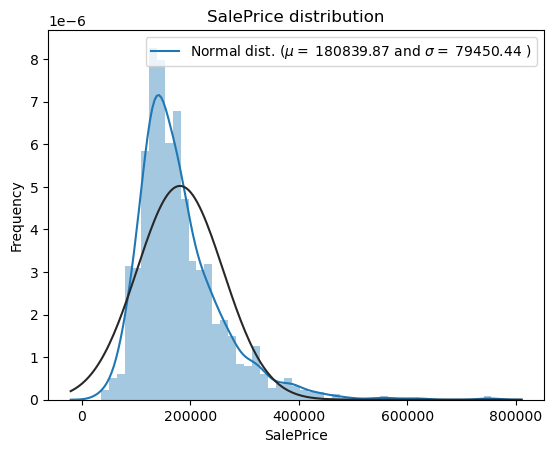

In [64]:
from scipy.stats import norm

sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

##### Observation:
- The Distribution is observed to be right-skewed


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

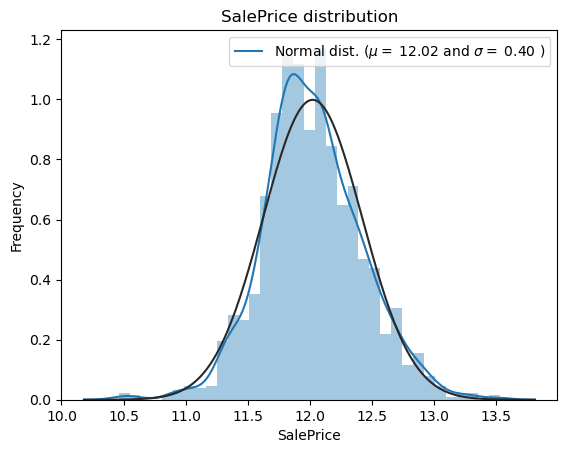

In [65]:
### Tranforming the skewed dependent variable by taking log and checked whether it will be normally distributed or not.
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

##### Observation:
- By applying log transformation on dependent column, we get normal distribution of data from originally right skewed distribution. Hence it seem correct to use this transformation on SalePrice column

In [66]:
df['SalePrice']=np.log(df['SalePrice'])

### **Train/Test Split**

### We will split the dataset into 70:30 ratio using the train_test_split method in sklearn

In [67]:
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 27)

In [68]:
df_train.head()

MSSubClass  LotFrontage  LotArea  LotShape  HouseStyle  OverallQual  \
1298          60        107.5    17690         2           3           10   
248           60         72.0    11317         3           3            7   
109           20        105.0    11751         0           0            6   
1361          20        107.5    16158         0           0            7   
674           20         80.0     9200         3           0            6   

      OverallCond  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  \
1298          5.0       410.0          4         5             4   
248           5.0       101.0          3         4             1   
109           6.0       410.0          2         4             1   
1361          5.0        16.0          3         5             3   
674           6.0         0.0          2         3             1   

      BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  \
1298             6        1780      466.0         2050          4       950   
248              1           0      840.0          840          4       828   
109              4         705     1139.0         1844          4         0   
1361             5        1274      256.0         1530          4         0   
674              3         892      244.0         1136          2         0   

      GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
1298       2748           2.0         2         1           3.0            4   
248        1668           0.0         2         1           3.0            3   
109        1844           0.0         2         0           3.0            2   
1361       1530           1.0         2         0           3.0            3   
674        1136           1.0         1         0           3.0            2   

      Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
1298         2.5            4            2             3         2.0   
248          0.0            0            2             2         2.0   
109          1.0            3            1             2         2.0   
1361         1.0            4            2             3         2.0   
674          1.0            4            1             2         1.0   

      WoodDeckSF  OpenPorchSF  MoSold  SalePrice  house_age2  MSZoning_RL  \
1298         214          170       1   2.483484           0            1   
248          144           68       9   2.493265           4            1   
109            0          122       1   2.497723          33            1   
1361         168           36       6   2.523201           4            1   
674          420            0       7   2.472278          43            1   

      MSZoning_RM  LotConfig_CulDSac  LotConfig_Inside  Neighborhood_CollgCr  \
1298            0                  0                 0                     0   
248             0                  0                 1                     1   
109             0                  0                 1                     0   
1361            0                  0                 1                     0   
674             0                  0                 1                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_NAmes  \
1298                     1                     0                   0   
248                      0                     0                   0   
109                      0                     0                   0   
1361                     0                     0                   0   
674                      0                     0                   1   

      Neighborhood_NWAmes  Neighborhood_NridgHt  Neighborhood_OldTown  \
1298                    0                     0                     0   
248                     0                     0                     0   
109                     1                     0                     0   
1361                    0                     0                     0   
674

In [69]:
df_train.shape

(1019, 72)

#### **Rescaling the feature variables**
From the data, we can see temp, hum and windspeed have larger and decimal values compared to others. We can normalized the numbers using the MinMax method and have all the numbers within 0 and 1 range. MinMax also takes care of outliers

In [70]:
scaler=MinMaxScaler()
df_train_transformed=scaler.fit_transform(df_train)#convert the scalled data array into dataframe
df_train_transformed=pd.DataFrame(df_train_transformed, columns=df_train.columns)
df_test_transformed=scaler.transform(df_test)#convert the scalled data array into dataframe
df_test_transformed=pd.DataFrame(df_test_transformed, columns=df_test.columns)

In [71]:
y_train=df_train_transformed['SalePrice']
X_train=df_train_transformed.drop('SalePrice',axis=1)
y_test=df_test_transformed['SalePrice']
X_test=df_test_transformed.drop('SalePrice',axis=1)

In [72]:
X_train.shape

(1019, 71)

#### **Building a Linear Regression Model** 

In [73]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(X_tr_scaled,y_train,n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n_features_to_select=n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols



In [74]:

def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model

def vif(X) : 
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [75]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.5f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.5f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.5f' % rss_train)
    print("RSS (Test) =", '%.5f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.5f' % mse_train)
    print("MSE (Test) =", '%.5f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [76]:
# Checking top features
selected_features = top_n_features(X_train,y_train,75)

Top 75 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'house_age2', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_Inside', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_

In [77]:
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        10:13:57   Log-Likelihood:                 1846.2
No. Observations:                1019   AIC:                            -3548.
Df Residuals:                     947   BIC:                            -3194.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [78]:
vif(X_train[selected_features])

                 Features    VIF
14            TotalBsmtSF  82.44
17              GrLivArea  60.05
59        MasVnrType_None  57.97
9                BsmtQual  55.04
51    Exterior1st_VinylSd  42.72
5             OverallQual  41.31
56    Exterior2nd_VinylSd  41.28
46        RoofStyle_Gable  34.98
32            MSZoning_RL  34.64
25            GarageYrBlt  33.22
63      GarageType_Attchd  32.63
58     MasVnrType_BrkFace  29.06
19               FullBath  28.59
8               ExterQual  23.96
49    Exterior1st_MetalSd  23.70
21           BedroomAbvGr  23.68
54    Exterior2nd_MetalSd  23.31
13              BsmtUnfSF  22.89
27             GarageCars  21.73
15              HeatingQC  21.23
22            KitchenQual  18.48
2                 LotArea  17.43
12             BsmtFinSF1  17.34
65      GarageType_Detchd  14.73
1             LotFrontage  13.82
16               2ndFlrSF  12.57
26           GarageFinish  12.42
11           BsmtFinType1  11.29
68         Fence_No Fence  11.13
24        

In [79]:
#Model 
lm = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        10:13:59   Log-Likelihood:                 1846.2
No. Observations:                1019   AIC:                            -3548.
Df Residuals:                     947   BIC:                            -3194.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [80]:
## let’s check out the R2 scores on the retaining dataset.

In [81]:

X_train_sm = sm.add_constant(X_train[selected_features])
y_train_pred = lm.predict(X_train_sm)

In [82]:
# Use the LR model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[selected_features]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new, has_constant='add')

In [83]:
y_pred = lm.predict(X_test_new)

In [84]:
rfe_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.90929
R-Squared (Test) = 0.88780
RSS (Train) = 1.59214
RSS (Test) = 0.74711
MSE (Train) = 0.00156
MSE (Test) = 0.00171
RMSE (Train) = 0.04
RMSE (Test) = 0.04


### Observation :
- From above , we see that our model is highly overfitting. So lets use Ridge/Lasso Regression Techniques for regularising the overfitting

In [86]:
# Function for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test,y_test, params, model):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  cv_results= pd.DataFrame(model_cv.cv_results_)
  #plotting R2 score vs alpha value
  plt.figure(figsize=(6,4))
  # plt.subplot(1, 2, 1)
  plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
  plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
  plt.xlabel('alpha')
  plt.ylabel('Negative Mean Absolute Error')
  plt.xscale('log')
  plt.legend()
  plt.show()
 
  alpha_r2 = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha_r2))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha_r2)
  print("===================================")
  metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

  return final_model, y_train_pred, y_pred, metrics

#### **Ridge Regression**

Fitting 5 folds for each of 27 candidates, totalling 135 fits


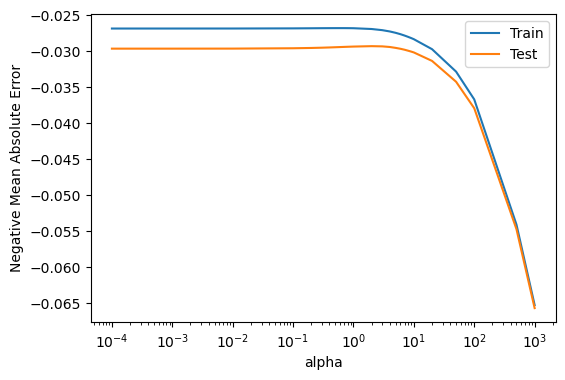

Optimum alpha for ridge is 2.000000
ridge  Regression with  2.0
R-Squared (Train) = 0.90804
R-Squared (Test) = 0.89039
RSS (Train) = 1.61415
RSS (Test) = 0.72984
MSE (Train) = 0.00158
MSE (Test) = 0.00167
RMSE (Train) = 0.04
RMSE (Test) = 0.04


In [87]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, ridge_y_train_predicted, ridge_y_test_predicted, ridge_metrics = build_model(X_train, y_train, X_test, y_test, params, model='ridge')

In [88]:
#Ridge model parameters
model_parameters = list(ridge_final_model.coef_)
model_parameters.insert(0, ridge_final_model.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
var_coef = list(zip(cols, model_parameters))
var_coef = [x for x in var_coef if abs(x[-1] != 0)]
df2 = {'Feature':list(list(zip(*var_coef))[0]),'Coeff':list(list(zip(*var_coef))[1])}
params = pd.DataFrame(data = df2)
params.reindex(params.Coeff.abs().sort_values(ascending = False).index)

Feature  Coeff
6             OverallQual  0.148
18              GrLivArea  0.135
0                constant  0.129
15            TotalBsmtSF  0.102
7             OverallCond  0.062
28             GarageCars  0.056
20               FullBath  0.045
3                 LotArea  0.040
13             BsmtFinSF1  0.031
45   Neighborhood_Somerst  0.031
71  SaleCondition_Partial  0.030
33            MSZoning_RL  0.029
38   Neighborhood_Edwards -0.026
43   Neighborhood_OldTown -0.025
41    Neighborhood_NWAmes -0.025
21               HalfBath  0.024
17               2ndFlrSF  0.022
32             house_age2 -0.021
53    Exterior1st_Wd Sdng -0.021
25            FireplaceQu  0.021
70   SaleCondition_Normal  0.020
63       Foundation_PConc  0.020
16              HeatingQC  0.017
1              MSSubClass -0.017
23            KitchenQual  0.017
14              BsmtUnfSF -0.016
42   Neighborhood_NridgHt  0.016
56    Exterior2nd_Plywood  0.016
51    Exterior1st_Plywood -0.015
52    Exterior1st_VinylSd -0.015
49    Exterior1st_HdBoard -0.014
35      LotConfig_CulDSac  0.014
11           BsmtExposure  0.014
19           BsmtFullBath  0.014
58    Exterior2nd_Wd Sdng  0.013
55    Exterior2nd_MetalSd  0.013
67   GarageType_No Garage -0.013
44    Neighborhood_Sawyer -0.013
46        BldgType_TwnhsE  0.012
47        RoofStyle_Gable -0.012
5              HouseStyle  0.011
50    Exterior1st_MetalSd -0.011
26            GarageYrBlt  0.011
40     Neighborhood_NAmes -0.010
2             LotFrontage  0.010
57    Exterior2nd_VinylSd  0.009
54    Exterior2nd_HdBoard  0.009
22           BedroomAbvGr  0.009
48          RoofStyle_Hip -0.009
27           GarageFinish  0.009
12           BsmtFinType1  0.009
39   Neighborhood_Gilbert -0.009
29             WoodDeckSF  0.008
65     GarageType_BuiltIn  0.008
64      GarageType_Attchd  0.007
8              MasVnrArea -0.007
62      Foundation_CBlock  0.007
68            Fence_MnPrv  0.006
69         Fence_No Fence  0.006
4                LotShape -0.004
30            OpenPorchSF  0.004
59     MasVnrType_BrkFace  0.004
60        MasVnrType_None -0.004
66      GarageType_Detchd  0.003
31                 MoSold  0.003
61       MasVnrType_Stone  0.003
36       LotConfig_Inside  0.003
37   Neighborhood_CollgCr -0.002
9               ExterQual  0.001
34            MSZoning_RM  0.001
24             Fireplaces  0.001
10               BsmtQual  0.001

#### **Lasso Regression**

Fitting 5 folds for each of 12 candidates, totalling 60 fits


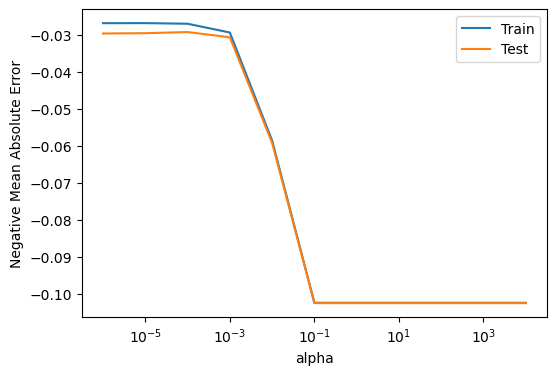

Optimum alpha for lasso is 0.000100
lasso  Regression with  0.0001
R-Squared (Train) = 0.90784
R-Squared (Test) = 0.89262
RSS (Train) = 1.61758
RSS (Test) = 0.71504
MSE (Train) = 0.00159
MSE (Test) = 0.00163
RMSE (Train) = 0.04
RMSE (Test) = 0.04


In [89]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, lasso_y_train_predicted, lasso_y_test_predicted, lasso_metrics = build_model(X_train, y_train, X_test, y_test, params, model='lasso')

In [90]:
#Lasso model parameters
model_parameters = list(lasso_final_model.coef_)
model_parameters.insert(0, lasso_final_model.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
var_coef = list(zip(cols, model_parameters))
var_coef = [x for x in var_coef if abs(x[-1] != 0)]
df2 = {'Feature':list(list(zip(*var_coef))[0]),'Coeff':list(list(zip(*var_coef))[1])}
params = pd.DataFrame(data = df2)
params.reindex(params.Coeff.abs().sort_values(ascending = False).index)

Feature  Coeff
6             OverallQual  0.173
16              GrLivArea  0.170
0                constant  0.121
13            TotalBsmtSF  0.109
7             OverallCond  0.064
24             GarageCars  0.056
3                 LotArea  0.040
18               FullBath  0.037
39   Neighborhood_Somerst  0.031
12              BsmtUnfSF -0.030
59  SaleCondition_Partial  0.030
29            MSZoning_RL  0.027
37   Neighborhood_OldTown -0.024
19               HalfBath  0.022
35    Neighborhood_NWAmes -0.021
32   Neighborhood_Edwards -0.021
52       Foundation_PConc  0.020
21            FireplaceQu  0.019
58   SaleCondition_Normal  0.019
28             house_age2 -0.019
14              HeatingQC  0.017
11             BsmtFinSF1  0.016
36   Neighborhood_NridgHt  0.014
9            BsmtExposure  0.013
55   GarageType_No Garage -0.013
20            KitchenQual  0.013
1              MSSubClass -0.012
22            GarageYrBlt  0.011
46    Exterior1st_Wd Sdng -0.011
10           BsmtFinType1  0.011
30      LotConfig_CulDSac  0.011
17           BsmtFullBath  0.009
5              HouseStyle  0.008
23           GarageFinish  0.008
48    Exterior2nd_Plywood  0.007
38    Neighborhood_Sawyer -0.007
25             WoodDeckSF  0.007
51      Foundation_CBlock  0.006
40        BldgType_TwnhsE  0.006
34     Neighborhood_NAmes -0.005
56            Fence_MnPrv  0.004
57         Fence_No Fence  0.004
54     GarageType_BuiltIn  0.004
44    Exterior1st_Plywood -0.004
4                LotShape -0.004
50        MasVnrType_None -0.003
53      GarageType_Attchd  0.003
15               2ndFlrSF  0.003
45    Exterior1st_VinylSd -0.003
41        RoofStyle_Gable -0.003
49    Exterior2nd_Wd Sdng  0.003
2             LotFrontage  0.003
8              MasVnrArea -0.003
33   Neighborhood_Gilbert -0.003
47    Exterior2nd_MetalSd  0.002
26            OpenPorchSF  0.002
43    Exterior1st_HdBoard -0.002
42          RoofStyle_Hip -0.002
31       LotConfig_Inside  0.002
27                 MoSold  0.001

In [91]:
len(params) 

60

In [92]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': rfe_metrics
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.909292          0.908038          0.907843
1   R2 Score (Test)           0.887801          0.890395          0.892617
2       RSS (Train)           1.592144          1.614146          1.617582
3        RSS (Test)           0.747115          0.729841          0.715043
4       MSE (Train)           0.001562          0.001584          0.001587
5        MSE (Test)           0.001706          0.001666          0.001633
6      RMSE (Train)           0.039528          0.039800          0.039842
7       RMSE (Test)           0.041301          0.040820          0.040404

In [93]:


#get dictionary containing all the variables and coefficients after lasso regression
lasso_dict=dict(zip(X_train.columns,lasso_final_model.coef_))#filter dictionary for only non-zero coefficients
final_dict={}
for i in lasso_dict:
    if lasso_dict[i]!=0:
        final_dict[i]= round(lasso_dict[i],3)    #rounding coefficient to 3 significant digits
final_dict

{'MSSubClass': -0.012,
 'LotFrontage': 0.003,
 'LotArea': 0.04,
 'LotShape': -0.004,
 'HouseStyle': 0.008,
 'OverallQual': 0.173,
 'OverallCond': 0.064,
 'MasVnrArea': -0.003,
 'BsmtExposure': 0.013,
 'BsmtFinType1': 0.011,
 'BsmtFinSF1': 0.016,
 'BsmtUnfSF': -0.03,
 'TotalBsmtSF': 0.109,
 'HeatingQC': 0.017,
 '2ndFlrSF': 0.003,
 'GrLivArea': 0.17,
 'BsmtFullBath': 0.009,
 'FullBath': 0.037,
 'HalfBath': 0.022,
 'KitchenQual': 0.013,
 'FireplaceQu': 0.019,
 'GarageYrBlt': 0.011,
 'GarageFinish': 0.008,
 'GarageCars': 0.056,
 'WoodDeckSF': 0.007,
 'OpenPorchSF': 0.002,
 'MoSold': 0.001,
 'house_age2': -0.019,
 'MSZoning_RL': 0.027,
 'LotConfig_CulDSac': 0.011,
 'LotConfig_Inside': 0.002,
 'Neighborhood_Edwards': -0.021,
 'Neighborhood_Gilbert': -0.003,
 'Neighborhood_NAmes': -0.005,
 'Neighborhood_NWAmes': -0.021,
 'Neighborhood_NridgHt': 0.014,
 'Neighborhood_OldTown': -0.024,
 'Neighborhood_Sawyer': -0.007,
 'Neighborhood_Somerst': 0.031,
 'BldgType_TwnhsE': 0.006,
 'RoofStyle_Gable':

In [94]:
len(final_dict)

60

In [95]:
#sorting the coefficient dictionary
import operator
final_dict= dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))
#printing the final model equation
a= ' + '.join(([str(b)+' * '+str(a) for a,b in final_dict.items()])) 
print("Sales Price = {0}+ [ {1} ]".format(round(lasso_final_model.intercept_,3),a))

Sales Price = 0.121+ [ 0.173 * OverallQual + 0.17 * GrLivArea + 0.109 * TotalBsmtSF + 0.064 * OverallCond + 0.056 * GarageCars + 0.04 * LotArea + 0.037 * FullBath + 0.031 * Neighborhood_Somerst + 0.03 * SaleCondition_Partial + 0.027 * MSZoning_RL + 0.022 * HalfBath + 0.02 * Foundation_PConc + 0.019 * FireplaceQu + 0.019 * SaleCondition_Normal + 0.017 * HeatingQC + 0.016 * BsmtFinSF1 + 0.014 * Neighborhood_NridgHt + 0.013 * BsmtExposure + 0.013 * KitchenQual + 0.011 * BsmtFinType1 + 0.011 * GarageYrBlt + 0.011 * LotConfig_CulDSac + 0.009 * BsmtFullBath + 0.008 * HouseStyle + 0.008 * GarageFinish + 0.007 * WoodDeckSF + 0.007 * Exterior2nd_Plywood + 0.006 * BldgType_TwnhsE + 0.006 * Foundation_CBlock + 0.004 * GarageType_BuiltIn + 0.004 * Fence_MnPrv + 0.004 * Fence_No Fence + 0.003 * LotFrontage + 0.003 * 2ndFlrSF + 0.003 * Exterior2nd_Wd Sdng + 0.003 * GarageType_Attchd + 0.002 * OpenPorchSF + 0.002 * LotConfig_Inside + 0.002 * Exterior2nd_MetalSd + 0.001 * MoSold + 0.0 * MasVnrType_Brk

### **Residual Analysis**

#### **Residuals must be normally distributed**
- **As we can see from the distribution below, our residuals are normally distributed.**

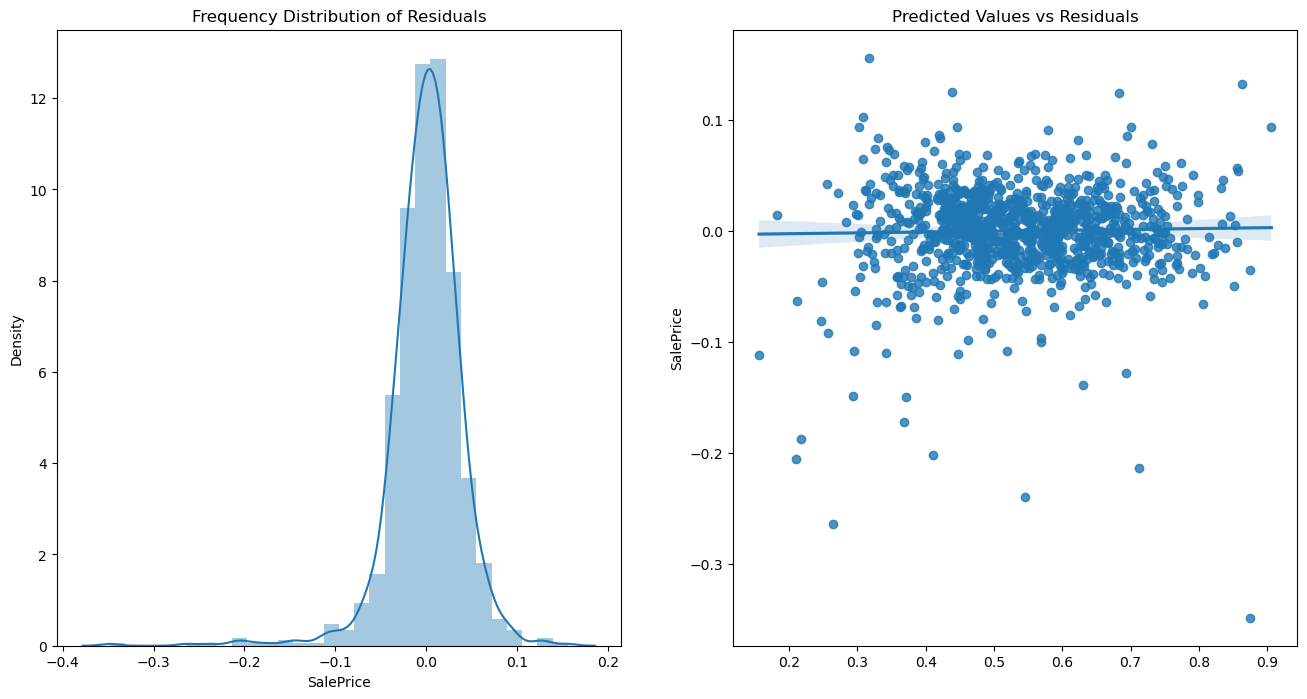

In [96]:

# Plot the histogram of the error terms
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-lasso_y_train_predicted, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(x=lasso_y_train_predicted,y=y_train-lasso_y_train_predicted,ax=ax[1])
plt.show()

In [97]:
# Mean of Residuals
(y_train-lasso_y_train_predicted).mean()

-2.549481724850703e-17

- Residual errors follow a normal distribution with mean=0
- Variance of Errors doesnt follow any trends
- Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.



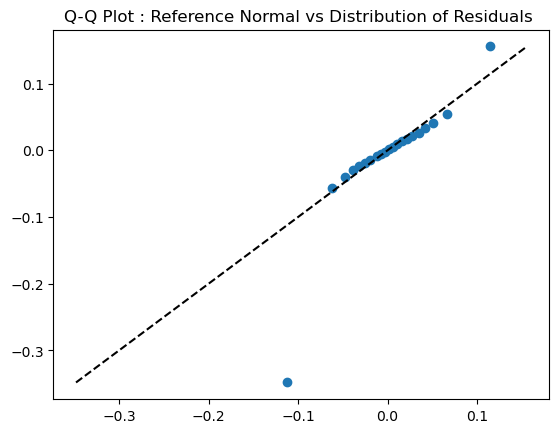

In [98]:
# Verifying the normality of distribution of residuals 
mean = (y_train-lasso_y_train_predicted).mean()
std = (y_train-lasso_y_train_predicted).std()

ref_normal = np.random.normal(mean,std,(y_train-lasso_y_train_predicted).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - lasso_y_train_predicted , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()



##### **This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data.**

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

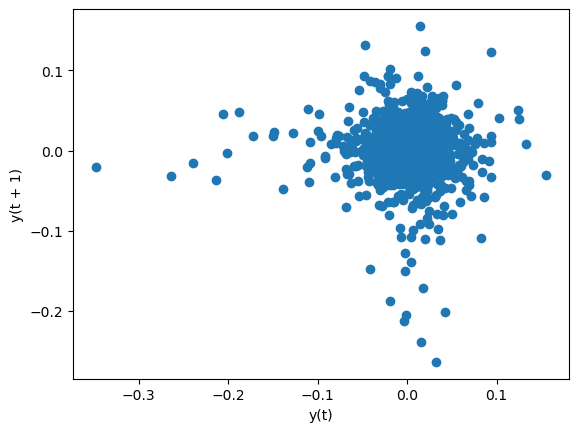

In [99]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-lasso_y_train_predicted)

##### **Lagplot of residuals shows no trend. Hence the error terms have constant variance**

#### **No Heteroskedasticity**
- **From the below scatter plot, we do not see a funnel like pattern and most of the points are centered around zero. So we do not have any heteroskedasticity.**

Text(0, 0.5, 'Residuals')

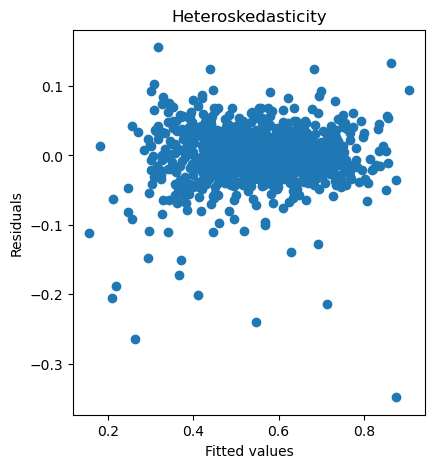

In [100]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Heteroskedasticity")
plt.scatter(lasso_y_train_predicted, (y_train-lasso_y_train_predicted))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

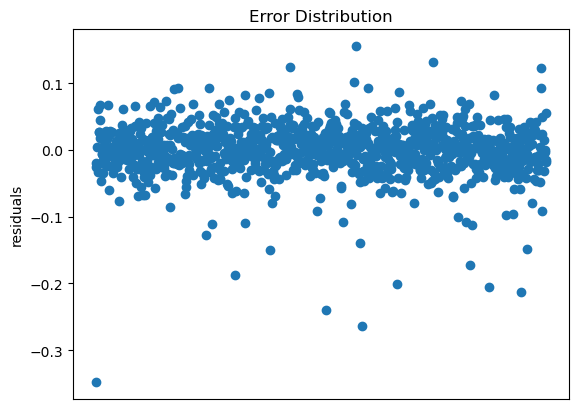

In [101]:
x= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x,y_train-lasso_y_train_predicted)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

#### **Residual Analysis on Test Data**

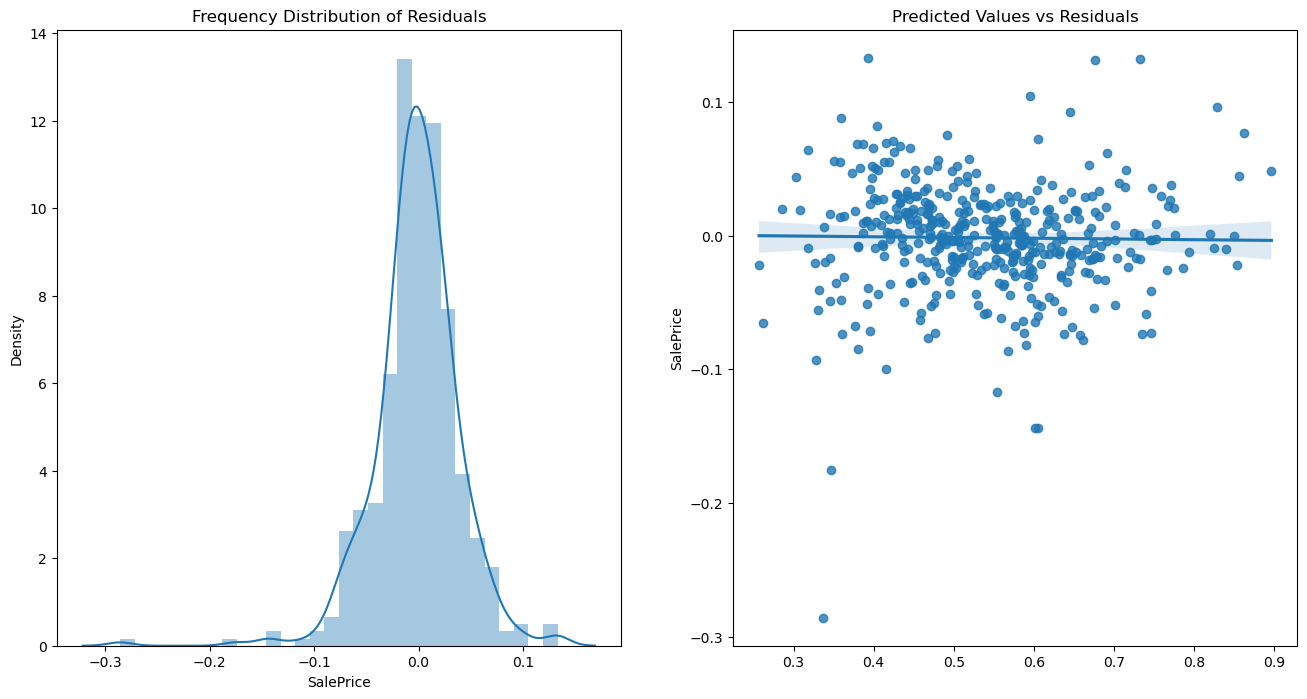

In [102]:

# Plot the histogram of the error terms
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_test-lasso_y_test_predicted, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(x=lasso_y_test_predicted,y=y_test-lasso_y_test_predicted,ax=ax[1])
plt.show()

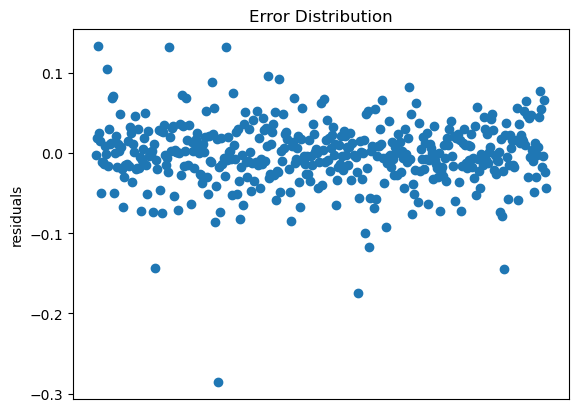

In [103]:
x= [i for i in range (1,y_test.shape[0]+1,1)]
plt.scatter(x,y_test-lasso_y_test_predicted)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

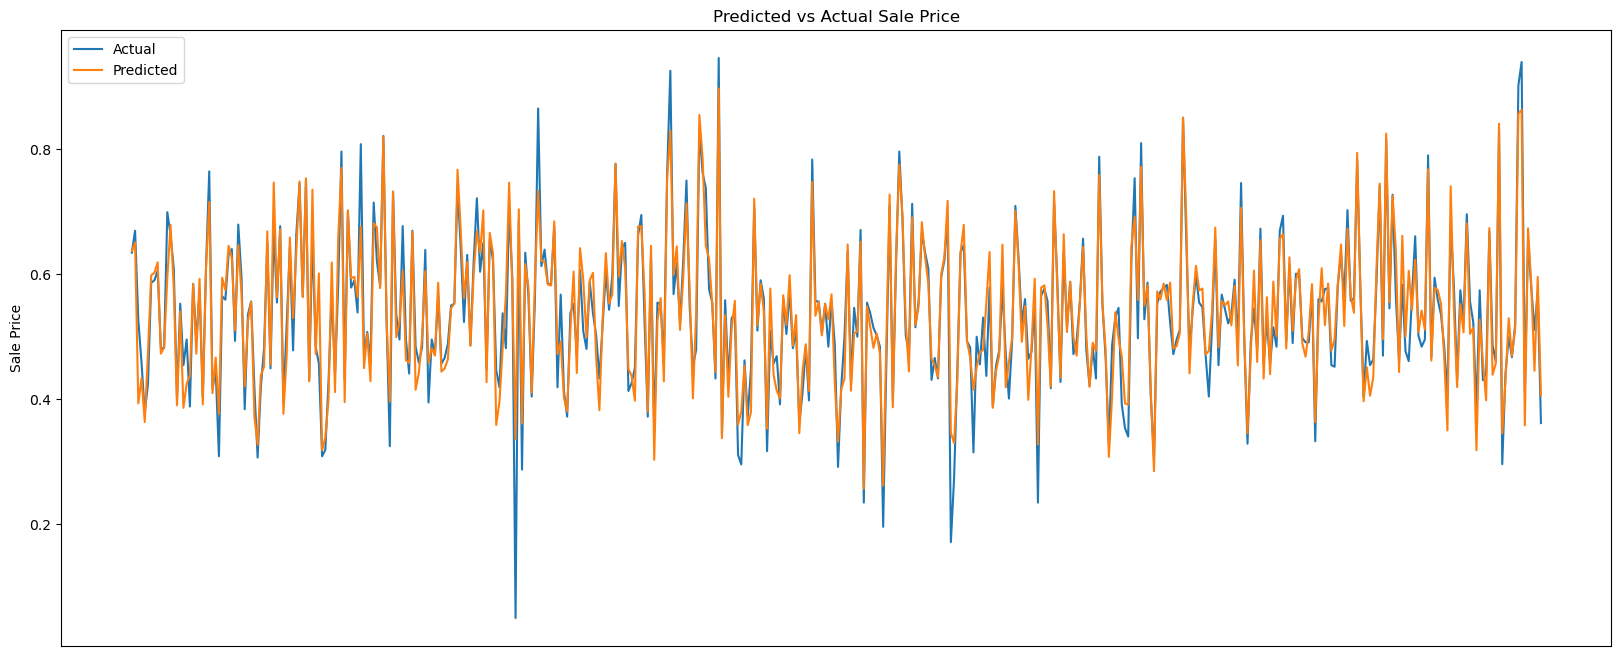

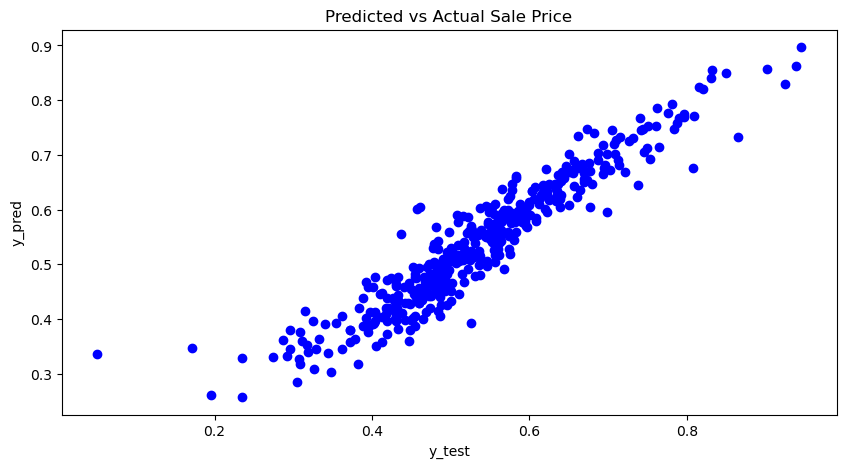

In [104]:
##Residual Analysis on test Data 

# Plotting Actual vs Predicted Sale Price
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(lasso_y_test_predicted)),lasso_y_test_predicted)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual Sale Price');
plt.ylabel('Sale Price')
plt.xticks([])
plt.show()

plt.figure(figsize=[10,5])
plt.scatter(y_test,lasso_y_test_predicted, color='blue');
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)  
plt.title('Predicted vs Actual Sale Price');

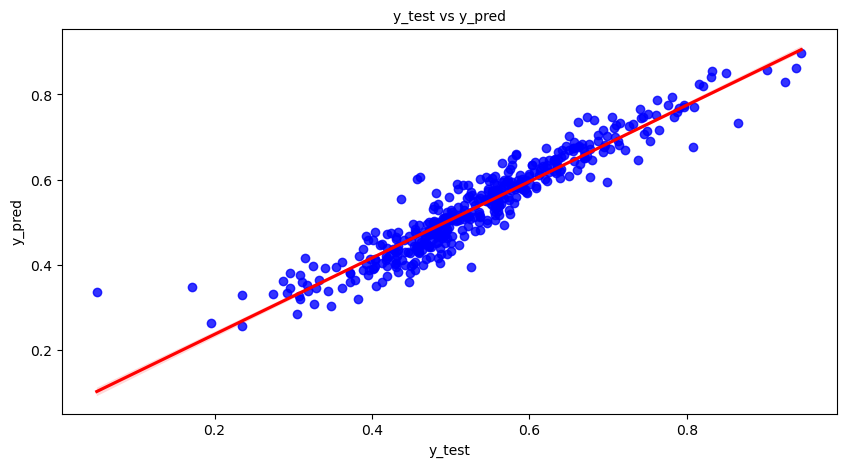

In [105]:
#Linear Regression plot to check the fit on test data 
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=lasso_y_test_predicted, ci=60, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=10)              # Plot heading 
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)                          # Y-label
plt.show()

### Observation : 
The residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.
- Residuals have mean of zero and closely normally distributed.
- Residuals do not have any pattern hence it has homoscedasticity.

### **Hence, assumptions of Linear Regression are satisfied by this model**

**So our final model equation is as under:**

Sales Price = 0.121+ [ 0.173 * OverallQual + 0.17 * GrLivArea + 0.109 * TotalBsmtSF + 0.064 * OverallCond + 0.056 * GarageCars + 0.04 * LotArea + 0.037 * FullBath + 0.031 * Neighborhood_Somerst + 0.03 * SaleCondition_Partial + 0.027 * MSZoning_RL + 0.022 * HalfBath + 0.02 * Foundation_PConc + 0.019 * FireplaceQu + 0.019 * SaleCondition_Normal + 0.017 * HeatingQC + 0.016 * BsmtFinSF1 + 0.014 * Neighborhood_NridgHt + 0.013 * BsmtExposure + 0.013 * KitchenQual + 0.011 * BsmtFinType1 + 0.011 * GarageYrBlt + 0.011 * LotConfig_CulDSac + 0.009 * BsmtFullBath + 0.008 * HouseStyle + 0.008 * GarageFinish + 0.007 * WoodDeckSF + 0.007 * Exterior2nd_Plywood + 0.006 * BldgType_TwnhsE + 0.006 * Foundation_CBlock + 0.004 * GarageType_BuiltIn + 0.004 * Fence_MnPrv + 0.004 * Fence_No Fence + 0.003 * LotFrontage + 0.003 * 2ndFlrSF + 0.003 * Exterior2nd_Wd Sdng + 0.003 * GarageType_Attchd + 0.002 * OpenPorchSF + 0.002 * LotConfig_Inside + 0.002 * Exterior2nd_MetalSd + 0.001 * MoSold + 0.0 * MasVnrType_BrkFace + -0.002 * RoofStyle_Hip + -0.002 * Exterior1st_HdBoard + -0.003 * MasVnrArea + -0.003 * Neighborhood_Gilbert + -0.003 * RoofStyle_Gable + -0.003 * Exterior1st_VinylSd + -0.003 * MasVnrType_None + -0.004 * LotShape + -0.004 * Exterior1st_Plywood + -0.005 * Neighborhood_NAmes + -0.007 * Neighborhood_Sawyer + -0.011 * Exterior1st_Wd Sdng + -0.012 * MSSubClass + -0.013 * GarageType_No Garage + -0.019 * house_age2 + -0.021 * Neighborhood_Edwards + -0.021 * Neighborhood_NWAmes + -0.024 * Neighborhood_OldTown + -0.03 * BsmtUnfSF ]




**Top 5 positive relation variable:** 
- OverallQual
- GrLivArea
- TotalBsmtSF
- OverallCond
- GarageCars

**Top 5 negative relation variable:** 
- BsmtUnfSF
- Neighborhood_OldTown
- Neighborhood_NWAmes
- Neighborhood_Edwards
- house_age2

**Conclusion:**
From the above, we conclude that lasso and ridge regression could boost the feature selection process.

In [106]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas

betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso Regression'] = lasso_final_model.coef_
lasso_coeffs = np.exp(betas['Lasso Regression'])
lasso_coeffs.sort_values(ascending=False)[:10]



OverallQual              1.189273
GrLivArea                1.184823
TotalBsmtSF              1.115505
OverallCond              1.066053
GarageCars               1.057556
LotArea                  1.041317
FullBath                 1.037847
Neighborhood_Somerst     1.031234
SaleCondition_Partial    1.030742
MSZoning_RL              1.027505
Name: Lasso Regression, dtype: float64

#### The variables significant in predicting the price of a house are: -
- GrLivArea: an increase of 1 square foot of house area above ground, the price will increase by 1.18 times
- OverallQual : a 1 unit increase in overall quality and material of house the price increase  by 1.18 times
- Neighborhood_Somerst : If Somerset is the nearest location in neighborhood then house price increase by 1.03 times.
  
In a similar manner, we can understand how each feature impacts the price of a house.

#### **Assignment Subjective Questions**

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- The Optimal Value for alpha for **Ridge Regression is 2.0**
- The Optimal Value for alpha for **Lasso Regression is 0.0001**

In [107]:
#lets make the alpha double and compare the outcome for Ridge
# Model Building
ridge2_model = Ridge(alpha=4)
ridge2_model.fit(X_train, y_train)

# Predicting
y_train_pred_ridge = ridge2_model.predict(X_train)
y_test_pred_ridge = ridge2_model.predict(X_test)

## Check metrics
ridge2_metrics = show_metrics(y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)

R-Squared (Train) = 0.90601
R-Squared (Test) = 0.89036
RSS (Train) = 1.64968
RSS (Test) = 0.73010
MSE (Train) = 0.00162
MSE (Test) = 0.00167
RMSE (Train) = 0.04
RMSE (Test) = 0.04


In [108]:
## Now we will build the lasso model with double value of alpha i.e. 0.0002
lasso2_model = Lasso(alpha=0.0002)

# Fit the model on training data
lasso2_model.fit(X_train, y_train)

# Predicting
y_train_pred_lasso = lasso2_model.predict(X_train)
y_test_pred_lasso = lasso2_model.predict(X_test)

## Check metrics
lasso2_metrics = show_metrics(y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)

R-Squared (Train) = 0.90595
R-Squared (Test) = 0.89364
RSS (Train) = 1.65085
RSS (Test) = 0.70822
MSE (Train) = 0.00162
MSE (Test) = 0.00162
RMSE (Train) = 0.04
RMSE (Test) = 0.04


In [109]:
#Again creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'], 
            'Ridge Regression (alpha = 2)': ridge_metrics,
            'Ridge Regression (alpha = 4)': ridge2_metrics,
            'Lasso Regression (alpha = 0.0001)': lasso_metrics,
            'Lasso Regression (alpha = 0.0002)': lasso2_metrics
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression (alpha = 2)', 'Ridge Regression (alpha = 4)', 'Lasso Regression (alpha = 0.0001)', 'Lasso Regression (alpha = 0.0002)'] )

lr_metric

Metric  Ridge Regression (alpha = 2)  \
0  R2 Score (Train)                      0.908038   
1   R2 Score (Test)                      0.890395   
2       RSS (Train)                      1.614146   
3        RSS (Test)                      0.729841   
4       MSE (Train)                      0.001584   
5        MSE (Test)                      0.001666   
6      RMSE (Train)                      0.039800   
7       RMSE (Test)                      0.040820   

   Ridge Regression (alpha = 4)  Lasso Regression (alpha = 0.0001)  \
0                      0.906014                           0.907843   
1                      0.890355                           0.892617   
2                      1.649677                           1.617582   
3                      0.730103                           0.715043   
4                      0.001619                           0.001587   
5                      0.001667                           0.001633   
6                      0.040236                           0.039842   
7                      0.040828                           0.040404   

   Lasso Regression (alpha = 0.0002)  
0                           0.905947  
1                           0.893642  
2                           1.650854  
3                           0.708221  
4                           0.001620  
5                           0.001617  
6                           0.040250  
7                           0.040211

#### Changes in Metrics after Doubling alpha- 
Changes in Ridge Regression metrics:
- R2 score of train decreased very slightly from 0.9080 to 0.9060 by 0.002
- R2 score of test decreased very slightly from 0.89039 to 0.89035 by 0.00004

Changes in Lasso metrics:
- R2 score of train decreased very slightly from 0.9078 to 0.9059 by 0.0016
- R2 score of test increased very slightly from 0.8926 to 0.8936 by 0.001



In [110]:


## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['Ridge Regression (alpha = 2)'] = ridge_final_model.coef_
betas['Ridge Regression (alpha = 4)'] = ridge2_model.coef_
betas['Lasso Regression (alpha = 0.0001)'] = lasso_final_model.coef_
betas['Lasso Regression (alpha = 0.0002)'] = lasso2_model.coef_
pd.set_option('display.max_rows', None)
betas

Ridge Regression (alpha = 2)  \
MSSubClass                                -0.016874   
LotFrontage                                0.010401   
LotArea                                    0.040036   
LotShape                                  -0.003969   
HouseStyle                                 0.011320   
OverallQual                                0.147544   
OverallCond                                0.061837   
MasVnrArea                                -0.006709   
ExterQual                                  0.001303   
BsmtQual                                   0.000522   
BsmtExposure                               0.013952   
BsmtFinType1                               0.009478   
BsmtFinSF1                                 0.030632   
BsmtUnfSF                                 -0.016001   
TotalBsmtSF                                0.101912   
HeatingQC                                  0.016767   
2ndFlrSF                                   0.022245   
GrLivArea                                  0.134670   
BsmtFullBath                               0.014280   
FullBath                                   0.044939   
HalfBath                                   0.024066   
BedroomAbvGr                               0.009399   
KitchenQual                                0.017274   
Fireplaces                                 0.000710   
FireplaceQu                                0.020563   
GarageYrBlt                                0.011162   
GarageFinish                               0.008685   
GarageCars                                 0.055626   
WoodDeckSF                                 0.008219   
OpenPorchSF                                0.004177   
MoSold                                     0.002580   
house_age2                                -0.020880   
MSZoning_RL                                0.028796   
MSZoning_RM                                0.001032   
LotConfig_CulDSac                          0.013682   
LotConfig_Inside                           0.003224   
Neighborhood_CollgCr                      -0.002272   
Neighborhood_Edwards                      -0.026014   
Neighborhood_Gilbert                      -0.009077   
Neighborhood_NAmes                        -0.009884   
Neighborhood_NWAmes                       -0.024787   
Neighborhood_NridgHt                       0.016239   
Neighborhood_OldTown                      -0.024855   
Neighborhood_Sawyer                       -0.012653   
Neighborhood_Somerst                       0.031291   
BldgType_TwnhsE                            0.012111   
RoofStyle_Gable                           -0.011715   
RoofStyle_Hip                             -0.008937   
Exterior1st_HdBoard                       -0.014090   
Exterior1st_MetalSd                       -0.011208   
Exterior1st_Plywood                       -0.015011   
Exterior1st_VinylSd                       -0.014581   
Exterior1st_Wd Sdng                       -0.021121   
Exterior2nd_HdBoard                        0.008736   
Exterior2nd_MetalSd                        0.013031   
Exterior2nd_Plywood                        0.015780   
Exterior2nd_VinylSd                        0.009108   
Exterior2nd_Wd Sdng                        0.012881   
MasVnrType_BrkFace                         0.003603   
MasVnrType_None                           -0.004284   
MasVnrType_Stone                           0.002944   
Foundation_CBlock                          0.006614   
Foundation_PConc                           0.019536   
GarageType_Attchd                          0.007070   
GarageType_BuiltIn                         0.008249   
GarageType_Detchd                          0.002768   
GarageType_No Garage                      -0.013447   
Fence_MnPrv                                0.006103   
Fence_No Fence                             0.006163   
SaleCondition_Normal                       0.019899   
SaleCondition_Partial                      0.030033   

                       Ridge Regression (alpha = 4)  \
MSSubCl

In [111]:
## View the top 5 coefficients of Ridge regression in descending order
betas['Ridge Regression (alpha = 2)'].sort_values(ascending=False)[:5]

OverallQual    0.147544
GrLivArea      0.134670
TotalBsmtSF    0.101912
OverallCond    0.061837
GarageCars     0.055626
Name: Ridge Regression (alpha = 2), dtype: float64

In [112]:
## View the top 5 coefficients of Ridge regression after doubling alpha in descending order
betas['Ridge Regression (alpha = 4)'].sort_values(ascending=False)[:5]

OverallQual    0.128513
GrLivArea      0.120864
TotalBsmtSF    0.089397
OverallCond    0.059036
GarageCars     0.054422
Name: Ridge Regression (alpha = 4), dtype: float64

In [113]:
## View the top 5 coefficients of Lasso regression in descending order
betas['Lasso Regression (alpha = 0.0001)'].sort_values(ascending=False)[:5]

OverallQual    0.173342
GrLivArea      0.169594
TotalBsmtSF    0.109307
OverallCond    0.063963
GarageCars     0.055960
Name: Lasso Regression (alpha = 0.0001), dtype: float64

In [114]:
## View the top 5 coefficients of Lasso regression after doubling alpha in descending order
betas['Lasso Regression (alpha = 0.0002)'].sort_values(ascending=False)[:5]

GrLivArea      0.173903
OverallQual    0.173767
TotalBsmtSF    0.093064
OverallCond    0.061289
GarageCars     0.056914
Name: Lasso Regression (alpha = 0.0002), dtype: float64

## Observation:
Top 5 Predictors are same but the coefficent of these predictor has changed

#### **Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?


**Answer**
- The model we will choose to apply will depend on the use case.
- If we have too many variables and one of our primary goal is feature selection, then we will use Lasso.
- If we don't want to get too large coefficients and reduction of coefficient magnitude is one of our prime goals, then we will use Ridge Regression.



In [115]:
## Lets observe the Metrics for Ridge and Lasso Metrics 
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.909292          0.908038          0.907843
1   R2 Score (Test)           0.887801          0.890395          0.892617
2       RSS (Train)           1.592144          1.614146          1.617582
3        RSS (Test)           0.747115          0.729841          0.715043
4       MSE (Train)           0.001562          0.001584          0.001587
5        MSE (Test)           0.001706          0.001666          0.001633
6      RMSE (Train)           0.039528          0.039800          0.039842
7       RMSE (Test)           0.041301          0.040820          0.040404

#### Observation 
- Here we observe that Lasso has performed feature selection and only included 60 features from total of 71 features and The r2_score of lasso is slightly higher than ridge for the test dataset so we will choose lasso regression to solve this problem


#### **Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [116]:
X_train2=X_train.drop(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'OverallCond', 'GarageCars'],axis=1)
X_test2=X_test.drop(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'OverallCond', 'GarageCars'],axis=1)

In [117]:
X_train2.shape

(1019, 66)

In [118]:
X_test2.shape

(438, 66)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


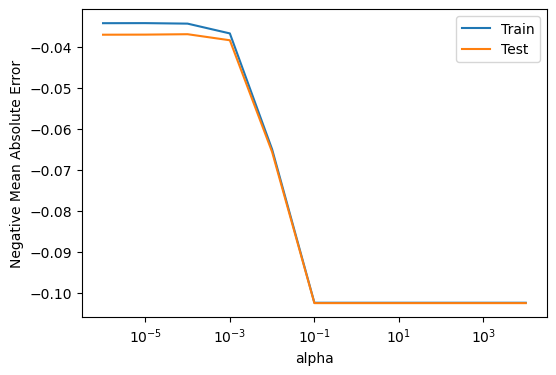

Optimum alpha for lasso is 0.000100
lasso  Regression with  0.0001
R-Squared (Train) = 0.86069
R-Squared (Test) = 0.84716
RSS (Train) = 2.44517
RSS (Test) = 1.01770
MSE (Train) = 0.00240
MSE (Test) = 0.00232
RMSE (Train) = 0.05
RMSE (Test) = 0.05


In [119]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}
lasso_new_model, lasso_new_y_train_predicted, lasso_new_y_test_predicted, lasso_new_metrics = build_model(X_train2, y_train, X_test2, y_test, params, model='lasso')

In [120]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'], 

            'Lasso Regression New': lasso_new_metrics
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Lasso Regression New'] )

lr_metric

Metric  Lasso Regression New
0  R2 Score (Train)              0.860693
1   R2 Score (Test)              0.847165
2       RSS (Train)              2.445171
3        RSS (Test)              1.017703
4       MSE (Train)              0.002400
5        MSE (Test)              0.002324
6      RMSE (Train)              0.048986
7       RMSE (Test)              0.048203

In [121]:
#Lasso model parameters
model_parameters = list(lasso_new_model.coef_)
model_parameters.insert(0, lasso_new_model.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train2.columns
cols = cols.insert(0, "constant")
var_coef = list(zip(cols, model_parameters))
var_coef = [x for x in var_coef if abs(x[-1] != 0)]
df3 = {'Feature':list(list(zip(*var_coef))[0]),'Coeff':list(list(zip(*var_coef))[1])}
params = pd.DataFrame(data = df3)
params.reindex(params.Coeff.abs().sort_values(ascending = False).index)

Feature  Coeff
0                constant  0.207
11             BsmtFinSF1  0.126
14               2ndFlrSF  0.094
16               FullBath  0.086
12              BsmtUnfSF  0.086
3                 LotArea  0.064
57   GarageType_No Garage -0.055
19            KitchenQual  0.048
26             house_age2 -0.047
7               ExterQual  0.042
32   Neighborhood_Edwards -0.040
21            FireplaceQu  0.036
27            MSZoning_RL  0.035
18           BedroomAbvGr  0.030
9            BsmtExposure  0.029
39   Neighborhood_Somerst  0.029
17               HalfBath  0.027
33   Neighborhood_Gilbert -0.026
61  SaleCondition_Partial  0.026
2             LotFrontage  0.026
15           BsmtFullBath  0.025
47    Exterior1st_Wd Sdng -0.024
8                BsmtQual  0.024
13              HeatingQC  0.023
60   SaleCondition_Normal  0.021
37   Neighborhood_OldTown -0.019
22           GarageFinish  0.016
36   Neighborhood_NridgHt  0.016
50    Exterior2nd_Wd Sdng  0.016
38    Neighborhood_Sawyer -0.015
29      LotConfig_CulDSac  0.015
1              MSSubClass -0.015
41        RoofStyle_Gable -0.015
43    Exterior1st_HdBoard -0.013
23             WoodDeckSF  0.012
46    Exterior1st_VinylSd -0.012
35    Neighborhood_NWAmes -0.012
54       Foundation_PConc  0.011
31   Neighborhood_CollgCr -0.011
28            MSZoning_RM  0.010
40        BldgType_TwnhsE  0.010
24            OpenPorchSF  0.009
5              HouseStyle  0.008
10           BsmtFinType1  0.008
34     Neighborhood_NAmes -0.007
53       MasVnrType_Stone  0.006
49    Exterior2nd_Plywood  0.005
25                 MoSold  0.005
20             Fireplaces  0.005
51     MasVnrType_BrkFace  0.005
45    Exterior1st_Plywood -0.005
30       LotConfig_Inside  0.004
56     GarageType_BuiltIn -0.004
6              MasVnrArea  0.003
55      GarageType_Attchd  0.003
58            Fence_MnPrv  0.003
4                LotShape -0.003
48    Exterior2nd_HdBoard  0.002
42          RoofStyle_Hip -0.002
59         Fence_No Fence  0.002
44    Exterior1st_MetalSd -0.002
52        MasVnrType_None -0.001

In [122]:
params.reindex(params.Coeff.abs().sort_values(ascending = False).index).head(6)

Feature  Coeff
0     constant  0.207
11  BsmtFinSF1  0.126
14    2ndFlrSF  0.094
16    FullBath  0.086
12   BsmtUnfSF  0.086
3      LotArea  0.064

### Top 5 Predictor Variables using Lasso after Dropping 5 Important Predictor are -
- BsmtFinSF1
- 2ndFlrSF
- FullBath
- BsmtUnfSF
- LotArea

#### **Question 4**

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?


#### **Answer**
- A generalizable model is able to adapt and learn properly to new and previously unseen data, from the same distribution as the one used to build the model.
- A model is robust when any variation in the data does not impact its performance to great extent.
- To ensure a model is both robust and generalizable, we have to make sure it doesnot overfit. This is because an overfitting model has very high variance and a minor change in data impacts the model prediction heavily. Such a model will identify and memorise all the patterns of a training data, but fail to pick up the patterns in unseen test data. The model should be generalized so that the test accuracy is similar to the training score.
- Outliers should not be given too much significance so that the accuracy predicted by the model is high. To ensure that this is not the case, the outlier analysis needs to be done and only those which are relevant to the dataset need to be retained. Those outliers which it does not make sense to keep must be removed from the dataset. We have done outlier analysis for our use case and treated them so that we do not loose data and at the same time the impact of outliers is reduced.
- In other words, the model should not be too complex in order to be robust and generalizable.
- From Accuracy perspective, a too complex model will have a very high accuracy but if the model is not robust, it cannot be trusted for predictive analysis. So, to make our model more robust and generalizable, we will have to decrease variance which will lead to some bias. Addition of bias means that accuracy will decrease. 
- In general, we have to find strike some balance between model accuracy and complexity. This can be achieved by Regularization techniques like Ridge Regression and Lasso.

Bias- Variance trade-off - 
- Model with high bias pay very little attention to training data on the other hand model with high variance pays lot of attention to training data. Accuracy of simple, robust and generalizable model will not have much difference in Training and Testing Data. So, we need to find the good balance without overfitting or underfitting the dataset to make the model more robust and generalisable.
